# Social Media Mental Health Indicators - Data Analysis Project

## Phase 1: Data Preparation & Understanding

**Project Objective:**
Analyze the relationship between social media usage, screen-time behavior, and mental health indicators to identify patterns and build predictive models.

**Dataset:** Social Media Mental Health Indicators Dataset

**Author:** [Bahaa Mohammed Elkady]
**Date:** November 27, 2025

---

### Table of Contents
1. Import Libraries
2. Load Dataset
3. Initial Data Exploration
4. Data Cleaning
5. Feature Engineering
6. Save Cleaned Data

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway

# Machine Learning (for later phases)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load Dataset

Load the dataset and display basic information about its structure.

In [2]:
# Load the dataset
# Update the file path according to your file location
Social = pd.read_csv('/media/pharmacy/Data/Pharmacy_Projects/Data_Projects/Social Media Mental Health Indicators Dataset/Raw_Datasets/mental_health_social_media_dataset.csv')
print("✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Shape: {Social.shape[0]} rows × {Social.shape[1]} columns")
Social

✅ Dataset loaded successfully!

📊 Dataset Shape: 5000 rows × 15 columns


person_name  age       date  gender   platform  \
0        Reyansh Ghosh   35   1/1/2024    Male  Instagram   
1           Neha Patel   24  1/12/2024  Female  Instagram   
2         Ananya Naidu   26   1/6/2024    Male   Snapchat   
3             Neha Das   66  1/17/2024  Female   Snapchat   
4     Reyansh Banerjee   31  1/28/2024    Male   Snapchat   
...                ...  ...        ...     ...        ...   
4995         Sai Menon   42  1/21/2025  Female   WhatsApp   
4996       Neha Ansari   33  1/26/2025  Female     TikTok   
4997      Aarav Sharma   13   2/6/2025    Male     TikTok   
4998      Aadhya Patil   21  2/17/2025    Male     TikTok   
4999       Shaurya Das   42  2/28/2025  Female     TikTok   

      daily_screen_time_min  social_media_time_min  \
0                       320                    160   
1                       453                    226   
2                       357                    196   
3                       190                    105   
4                       383                    211   
...                     ...                    ...   
4995                    254                     64   
4996                    330                    214   
4997                    403                    262   
4998                    476                    309   
4999                    249                    162   

      negative_interactions_count  positive_interactions_count  sleep_hours  \
0                               1                            2         7.40   
1                               1                            3         6.70   
2                               1                            2         7.20   
3                               0                            1         8.00   
4                               1                            2         7.10   
...                           ...                          ...          ...   
4995                            0                            1         7.70   
4996                            1                            2         7.40   
4997                            2                            2         7.00   
4998                            2                            3         6.60   
4999                            1                            1         7.80   

      physical_activity_min  anxiety_level  stress_level  mood_level  \
0                        28              2             7           6   
1                        15              3             8           5   
2                        24              3             7           6   
3                        41              2             6           6   
4                        22              3             7           6   
...                     ...            ...           ...         ...   
4995                     35              1             5           7   
4996                     27              3             7           6   
4997                     20              4             9           4   
4998                     12              4             9           4   
4999                     35              2             6           6   

     mental_state  
0        Stressed  
1        Stressed  
2        Stressed  
3        Stressed  
4        Stressed  
...           ...  
4995      At_Risk  
4996     Stressed  
4997     Stressed  
4998     Stressed  
4999     Stressed  

[5000 rows x 15 columns]

## 3. Initial Data Exploration

### 3.1 First Look at the Data

In [3]:
# Display first few rows
print("=" * 100)
print("FIRST 10 ROWS OF THE DATASET")
print("=" * 100)
display(Social.head(10))

FIRST 10 ROWS OF THE DATASET


person_name  age       date  gender   platform  daily_screen_time_min  \
0     Reyansh Ghosh   35   1/1/2024    Male  Instagram                    320   
1        Neha Patel   24  1/12/2024  Female  Instagram                    453   
2      Ananya Naidu   26   1/6/2024    Male   Snapchat                    357   
3          Neha Das   66  1/17/2024  Female   Snapchat                    190   
4  Reyansh Banerjee   31  1/28/2024    Male   Snapchat                    383   
5         Myra Kale   25   2/8/2024  Female   Snapchat                    516   
6   Ananya Kulkarni   29  2/19/2024   Other   Snapchat                    328   
7         Meera Das   28  1/11/2024  Female   Facebook                    394   
8      Vihaan Naidu   31  1/22/2024    Male   Facebook                    326   
9       Meera Patil   26   2/2/2024  Female   Facebook                    339   

   social_media_time_min  negative_interactions_count  \
0                    160                            1   
1                    226                            1   
2                    196                            1   
3                    105                            0   
4                    211                            1   
5                    284                            1   
6                    180                            1   
7                    138                            1   
8                    114                            0   
9                    119                            0   

   positive_interactions_count  sleep_hours  physical_activity_min  \
0                            2         7.40                     28   
1                            3         6.70                     15   
2                            2         7.20                     24   
3                            1         8.00                     41   
4                            2         7.10                     22   
5                            3         6.40                      8   
6                            2         7.40                     27   
7                            1         7.00                     21   
8                            1         7.40                     27   
9                            1         7.30                     26   

   anxiety_level  stress_level  mood_level mental_state  
0              2             7           6     Stressed  
1              3             8           5     Stressed  
2              3             7           6     Stressed  
3              2             6           6     Stressed  
4              3             7           6     Stressed  
5              3             8           5     Stressed  
6              3             7           6     Stressed  
7              2             7           6     Stressed  
8              2             6           6     Stressed  
9              2             6           6     Stressed

In [4]:
# Display last few rows
print("=" * 100)
print("LAST 10 ROWS OF THE DATASET")
print("=" * 100)
display(Social.tail(10))

LAST 10 ROWS OF THE DATASET


person_name  age       date  gender  platform  daily_screen_time_min  \
4990   Navya Gupta   34  1/22/2025    Male  Snapchat                    394   
4991  Suhani Menon   30   2/2/2025    Male  Snapchat                    326   
4992    Aditi Iyer   30  2/13/2025    Male  Snapchat                    339   
4993     Meera Das   24  2/24/2025  Female  Snapchat                    472   
4994  Aarohi Patel   23  1/16/2025  Female  Facebook                    457   
4995     Sai Menon   42  1/21/2025  Female  WhatsApp                    254   
4996   Neha Ansari   33  1/26/2025  Female    TikTok                    330   
4997  Aarav Sharma   13   2/6/2025    Male    TikTok                    403   
4998  Aadhya Patil   21  2/17/2025    Male    TikTok                    476   
4999   Shaurya Das   42  2/28/2025  Female    TikTok                    249   

      social_media_time_min  negative_interactions_count  \
4990                    217                            1   
4991                    179                            1   
4992                    186                            1   
4993                    260                            1   
4994                    160                            1   
4995                     64                            0   
4996                    214                            1   
4997                    262                            2   
4998                    309                            2   
4999                    162                            1   

      positive_interactions_count  sleep_hours  physical_activity_min  \
4990                            2         7.00                     21   
4991                            2         7.40                     27   
4992                            2         7.30                     26   
4993                            2         6.60                     13   
4994                            1         6.70                     14   
4995                            1         7.70                     35   
4996                            2         7.40                     27   
4997                            2         7.00                     20   
4998                            3         6.60                     12   
4999                            1         7.80                     35   

      anxiety_level  stress_level  mood_level mental_state  
4990              3             8           5     Stressed  
4991              3             7           6     Stressed  
4992              3             7           6     Stressed  
4993              3             8           5     Stressed  
4994              2             7           6     Stressed  
4995              1             5           7      At_Risk  
4996              3             7           6     Stressed  
4997              4             9           4     Stressed  
4998              4             9           4     Stressed  
4999              2             6           6     Stressed

### 3.2 Dataset Information

In [5]:
# Get dataset info
print("=" * 100)
print("DATASET INFORMATION")
print("=" * 100)
print(Social.info())

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13

In [6]:
# Get column names
print("=" * 100)
print("COLUMN NAMES")
print("=" * 100)
print(f"\nTotal Columns: {len(Social.columns)}\n")
for idx, col in enumerate(Social.columns, 1):
    print(f"{idx:2d}. {col}")

COLUMN NAMES

Total Columns: 15

 1. person_name
 2. age
 3. date
 4. gender
 5. platform
 6. daily_screen_time_min
 7. social_media_time_min
 8. negative_interactions_count
 9. positive_interactions_count
10. sleep_hours
11. physical_activity_min
12. anxiety_level
13. stress_level
14. mood_level
15. mental_state


In [7]:
# Data types summary
print("=" * 100)
print("DATA TYPES SUMMARY")
print("=" * 100)
print(Social.dtypes.value_counts())

DATA TYPES SUMMARY
int64      9
object     5
float64    1
Name: count, dtype: int64


### 3.3 Statistical Summary

In [8]:
# Statistical summary for numerical columns
print("=" * 100)
print("STATISTICAL SUMMARY - NUMERICAL COLUMNS")
print("=" * 100)
display(Social.describe().T.style.background_gradient(cmap='coolwarm').format('{:.2f}'))

STATISTICAL SUMMARY - NUMERICAL COLUMNS


In [9]:
# Statistical summary for categorical columns
print("=" * 100)
print("STATISTICAL SUMMARY - CATEGORICAL COLUMNS")
print("=" * 100)
display(Social.describe(include=['object']).T)

STATISTICAL SUMMARY - CATEGORICAL COLUMNS


count unique            top  freq
person_name   5000    891  Navya Chauhan    14
date          5000    686     10/30/2025    12
gender        5000      3         Female  2474
platform      5000      7       Facebook   744
mental_state  5000      3       Stressed  4601

### 3.4 Missing Values Analysis

In [10]:
# Check for missing values
print("=" * 100)
print("MISSING VALUES ANALYSIS")
print("=" * 100)

missing_values = Social.isnull().sum()
missing_percentage = (Social.isnull().sum() / len(Social)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("✅ No missing values found in the dataset!")

MISSING VALUES ANALYSIS
✅ No missing values found in the dataset!


In [11]:
# Visualize missing values
if Social.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(Social.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values to visualize!")

✅ No missing values to visualize!


### 3.5 Duplicate Records Check

In [12]:
# Check for duplicates
print("=" * 100)
print("DUPLICATE RECORDS CHECK")
print("=" * 100)

duplicate_count = Social.duplicated().sum()
print(f"\n📊 Total Duplicate Rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"⚠️  Found {duplicate_count} duplicate rows")
    print("\nSample duplicate rows:")
    print(Social[Social.duplicated(keep=False)].head(10))
else:
    print("✅ No duplicate rows found!")

DUPLICATE RECORDS CHECK

📊 Total Duplicate Rows: 0
✅ No duplicate rows found!


### 3.6 Unique Values in Categorical Columns

In [13]:
# Get unique values for categorical columns
print("=" * 100)
print("UNIQUE VALUES IN CATEGORICAL COLUMNS")
print("=" * 100)

categorical_cols = Social.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_count = Social[col].nunique()
    print(f"\n📌 {col}: {unique_count} unique values")
    print(f"   Values: {Social[col].unique()}")

UNIQUE VALUES IN CATEGORICAL COLUMNS

📌 person_name: 891 unique values
   Values: ['Reyansh Ghosh' 'Neha Patel' 'Ananya Naidu' 'Neha Das' 'Reyansh Banerjee'
 'Myra Kale' 'Ananya Kulkarni' 'Meera Das' 'Vihaan Naidu' 'Meera Patil'
 'Suhani Das' 'Vivaan Shetty' 'Diya Saxena' 'Sai Verma' 'Aditi Das'
 'Aarav Pawar' 'Avni Rathod' 'Neha Pawar' 'Anika Nair' 'Pooja Roy'
 'Shaurya Rawat' 'Aditi Mishra' 'Saanvi Saxena' 'Payal Patel'
 'Payal Ansari' 'Diya Kale' 'Navya Menon' 'Aditya Iyer' 'Myra Joshi'
 'Sonal Choudhary' 'Reyansh Khan' 'Vihaan Menon' 'Aditi Yadav'
 'Aarohi Banerjee' 'Ishaan Banerjee' 'Sonal Verma' 'Navya Rawat'
 'Saanvi Rawat' 'Reyansh Pawar' 'Neha Naidu' 'Saanvi Patil' 'Jiya Nair'
 'Vihaan Khan' 'Krishna Reddy' 'Vivaan Saxena' 'Sai Rathod'
 'Shaurya Reddy' 'Suhani Chauhan' 'Diya Verma' 'Shaurya Saxena'
 'Vihaan Yadav' 'Isha Patel' 'Krishna Yadav' 'Kavya Rawat' 'Anika Saxena'
 'Krishna Das' 'Isha Deshmukh' 'Aarohi Patel' 'Sonal Shetty' 'Avni Menon'
 'Aditi Rawat' 'Aditi Deshmukh' '

In [14]:
# Value counts for key categorical columns
print("=" * 100)
print("VALUE COUNTS - KEY CATEGORICAL COLUMNS")
print("=" * 100)

key_categorical = ['Platform', 'Gender', 'Mental_state']

for col in key_categorical:
    if col in Social.columns:
        print(f"\n{'='*50}")
        print(f"{col}")
        print(f"{'='*50}")
        print(Social[col].value_counts())
        print(f"\nPercentage Distribution:")
        print(Social[col].value_counts(normalize=True) * 100)

VALUE COUNTS - KEY CATEGORICAL COLUMNS


## 4. Data Cleaning

### 4.1 Handle Missing Values

In [15]:
# Create a copy for cleaning
Social_clean = Social.copy()

print("=" * 100)
print("DATA CLEANING PROCESS")
print("=" * 100)

# If there are missing values, handle them appropriately
# For this dataset, we'll check and handle if any exist

initial_shape = Social_clean.shape
print(f"\n📊 Initial Shape: {initial_shape}")

# Example: Drop rows with missing values (if any)
# Social_clean = Social_clean.dropna()

# Or fill with appropriate values
# Social_clean['Sleep_hours'].fillna(Social_clean['Sleep_hours'].median(), inplace=True)

print(f"✅ Missing values handled (if any)")
print(f"📊 Current Shape: {Social_clean.shape}")

DATA CLEANING PROCESS

📊 Initial Shape: (5000, 15)
✅ Missing values handled (if any)
📊 Current Shape: (5000, 15)


### 4.2 Remove Duplicates

In [16]:
# Remove duplicates
initial_rows = Social.shape[0]
Social = Social.drop_duplicates()
final_rows = Social.shape[0]

removed_rows = initial_rows - final_rows

print(f"\n🗑️  Removed {removed_rows} duplicate rows")
print(f"📊 Final Shape: {Social.shape}")


🗑️  Removed 0 duplicate rows
📊 Final Shape: (5000, 15)


### 4.3 Data Type Corrections & Validation

In [17]:
# Convert Date column to datetime
if 'Date' in Social.columns:
    Social['Date'] = pd.to_datetime(Social['Date'])
    print("✅ Date column converted to datetime format")

# Validate numerical ranges
print("\n" + "=" * 100)
print("DATA VALIDATION")
print("=" * 100)

# Check for negative values in columns that should be positive
numerical_positive_cols = ['Daily_screen_time', 'Social_media_time', 'Sleep_hours', 
                           'Physical_activity', 'Age']

for col in numerical_positive_cols:
    if col in Social.columns:
        negative_count = (Social[col] < 0).sum()
        if negative_count > 0:
            print(f"⚠️  {col}: Found {negative_count} negative values")
        else:
            print(f"✅ {col}: All values are valid (>= 0)")

# Check Sleep_hours range (should be 0-24)
if 'Sleep_hours' in Social.columns:
    invalid_sleep = ((Social['Sleep_hours'] < 0) | (Social['Sleep_hours'] > 24)).sum()
    if invalid_sleep > 0:
        print(f"\n⚠️  Sleep_hours: Found {invalid_sleep} values outside 0-24 range")
    else:
        print(f"\n✅ Sleep_hours: All values are within valid range (0-24)")

print("\n✅ Data validation completed!")


DATA VALIDATION

✅ Data validation completed!


In [18]:
# Check the actual column names in your dataset
print("=" * 100)
print("ACTUAL COLUMN NAMES IN YOUR DATASET")
print("=" * 100)
print("\nColumn names:")
for idx, col in enumerate(Social_clean.columns, 1):
    print(f"{idx:2d}. {col}")

ACTUAL COLUMN NAMES IN YOUR DATASET

Column names:
 1. person_name
 2. age
 3. date
 4. gender
 5. platform
 6. daily_screen_time_min
 7. social_media_time_min
 8. negative_interactions_count
 9. positive_interactions_count
10. sleep_hours
11. physical_activity_min
12. anxiety_level
13. stress_level
14. mood_level
15. mental_state


## 5. Feature Engineering

Creating new features to enhance our analysis and modeling capabilities.

In [19]:
print("=" * 100)
print("FEATURE ENGINEERING")
print("=" * 100)

# 1. Interaction Sentiment Score
Social_clean['interaction_sentiment_score'] = (
    Social_clean['positive_interactions_count'] - Social_clean['negative_interactions_count']
)
print("✅ Created: interaction_sentiment_score")

# 2. Screen to Social Ratio
Social_clean['screen_to_social_ratio'] = (
    Social_clean['social_media_time_min'] / Social_clean['daily_screen_time_min']
).round(2)
print("✅ Created: screen_to_social_ratio")

# 3. Total Interactions
Social_clean['total_interactions'] = (
    Social_clean['positive_interactions_count'] + Social_clean['negative_interactions_count']
)
print("✅ Created: total_interactions")

# 4. Positive Interaction Rate
Social_clean['positive_interaction_rate'] = (
    Social_clean['positive_interactions_count'] / Social_clean['total_interactions']
).round(2)
Social_clean['positive_interaction_rate'].fillna(0, inplace=True)
print("✅ Created: positive_interaction_rate")

# 5. Sleep Category
def categorize_sleep(hours):
    if hours < 6:
        return 'Poor'
    elif hours < 7:
        return 'Moderate'
    elif hours <= 9:
        return 'Good'
    else:
        return 'Excessive'

Social_clean['sleep_category'] = Social_clean['sleep_hours'].apply(categorize_sleep)
print("✅ Created: sleep_category")

# 6. Age Group
def categorize_age(age):
    if age < 20:
        return 'Teen'
    elif age < 36:
        return 'Young Adult'
    elif age < 56:
        return 'Adult'
    else:
        return 'Senior'

Social_clean['age_group'] = Social_clean['age'].apply(categorize_age)
print("✅ Created: age_group")

# 7. Usage Category (based on daily screen time)
def categorize_usage(minutes):
    if minutes < 180:  # Less than 3 hours
        return 'Light'
    elif minutes < 360:  # 3-6 hours
        return 'Moderate'
    else:  # More than 6 hours
        return 'Heavy'

Social_clean['usage_category'] = Social_clean['daily_screen_time_min'].apply(categorize_usage)
print("✅ Created: usage_category")

# 8. Mental Health Score (composite score)
# Normalize stress, anxiety (inverse), mood to 0-10 scale
Social_clean['mental_health_score'] = (
    (10 - Social_clean['stress_level']) * 0.3 +
    (10 - Social_clean['anxiety_level']) * 0.3 +
    Social_clean['mood_level'] * 0.4
).round(2)
print("✅ Created: mental_health_score")

# 9. Activity Level Category
def categorize_activity(minutes):
    if minutes < 20:
        return 'Sedentary'
    elif minutes < 40:
        return 'Moderate'
    else:
        return 'Active'

Social_clean['activity_level'] = Social_clean['physical_activity_min'].apply(categorize_activity)
print("✅ Created: activity_level")

# 10. Risk Score (Higher = More Risk)
Social_clean['risk_score'] = (
    (Social_clean['stress_level'] * 0.25) +
    (Social_clean['anxiety_level'] * 0.25) +
    ((10 - Social_clean['mood_level']) * 0.20) +
    ((9 - Social_clean['sleep_hours']).clip(0) * 0.15) +
    (Social_clean['negative_interactions_count'] / 10 * 0.15)
).round(2)
print("✅ Created: risk_score")

print(f"\n✅ Feature Engineering Completed!")
print(f"📊 New Shape: {Social_clean.shape}")
print(f"📊 New Features Added: {Social_clean.shape[1] - Social.shape[1]}")

FEATURE ENGINEERING
✅ Created: interaction_sentiment_score
✅ Created: screen_to_social_ratio
✅ Created: total_interactions
✅ Created: positive_interaction_rate
✅ Created: sleep_category
✅ Created: age_group
✅ Created: usage_category
✅ Created: mental_health_score
✅ Created: activity_level
✅ Created: risk_score

✅ Feature Engineering Completed!
📊 New Shape: (5000, 25)
📊 New Features Added: 10


### 5.1 View New Features

Let's examine the newly created engineered features to understand their distributions and values.

In [20]:
# Display sample of new features
new_features = ['interaction_sentiment_score', 'screen_to_social_ratio', 
                'sleep_category', 'age_group', 'usage_category', 
                'mental_health_score', 'activity_level', 'risk_score']

print("=" * 100)
print("SAMPLE OF NEW ENGINEERED FEATURES")
print("=" * 100)
Social_clean[['person_name'] + new_features].head(10)

SAMPLE OF NEW ENGINEERED FEATURES


person_name  interaction_sentiment_score  screen_to_social_ratio  \
0     Reyansh Ghosh                            1                    0.50   
1        Neha Patel                            2                    0.50   
2      Ananya Naidu                            1                    0.55   
3          Neha Das                            1                    0.55   
4  Reyansh Banerjee                            1                    0.55   
5         Myra Kale                            2                    0.55   
6   Ananya Kulkarni                            1                    0.55   
7         Meera Das                            0                    0.35   
8      Vihaan Naidu                            1                    0.35   
9       Meera Patil                            1                    0.35   

  sleep_category    age_group usage_category  mental_health_score  \
0           Good  Young Adult       Moderate                 5.70   
1       Moderate  Young Adult          Heavy                 4.70   
2           Good  Young Adult       Moderate                 5.40   
3           Good       Senior       Moderate                 6.00   
4           Good  Young Adult          Heavy                 5.40   
5       Moderate  Young Adult          Heavy                 4.70   
6           Good  Young Adult       Moderate                 5.40   
7           Good  Young Adult          Heavy                 5.70   
8           Good  Young Adult       Moderate                 6.00   
9           Good  Young Adult       Moderate                 6.00   

  activity_level  risk_score  
0       Moderate        3.30  
1      Sedentary        4.11  
2       Moderate        3.58  
3         Active        2.95  
4       Moderate        3.60  
5      Sedentary        4.15  
6       Moderate        3.56  
7       Moderate        3.36  
8       Moderate        3.04  
9       Moderate        3.06

In [21]:
# Statistical summary of new numerical features
new_numerical = ['interaction_sentiment_score', 'screen_to_social_ratio', 
                 'mental_health_score', 'risk_score', 'total_interactions',
                 'positive_interaction_rate']

print("=" * 100)
print("STATISTICAL SUMMARY - NEW NUMERICAL FEATURES")
print("=" * 100)
Social_clean[new_numerical].describe().T

STATISTICAL SUMMARY - NEW NUMERICAL FEATURES


count  mean  std  min  25%  50%  75%  max
interaction_sentiment_score 5000.00  0.97 0.80 0.00 0.00 1.00 1.00 3.00
screen_to_social_ratio      5000.00  0.47 0.13 0.25 0.35 0.50 0.60 0.65
mental_health_score         5000.00  5.36 0.84 3.70 4.70 5.40 6.00 7.00
risk_score                  5000.00  3.57 0.67 2.20 3.01 3.56 4.11 4.87
total_interactions          5000.00  2.70 1.33 0.00 2.00 3.00 4.00 5.00
positive_interaction_rate   5000.00  0.69 0.20 0.00 0.50 0.67 0.80 1.00

In [22]:
# Value counts for new categorical features
new_categorical = ['sleep_category', 'age_group', 'usage_category', 'activity_level']

print("=" * 100)
print("VALUE COUNTS - NEW CATEGORICAL FEATURES")
print("=" * 100)

for col in new_categorical:
    print(f"\n{'='*70}")
    print(f"📊 {col.upper().replace('_', ' ')}")
    print(f"{'='*70}")
    counts = Social_clean[col].value_counts()
    percentages = Social_clean[col].value_counts(normalize=True) * 100
    
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2)
    })
    print(summary)


VALUE COUNTS - NEW CATEGORICAL FEATURES

📊 SLEEP CATEGORY
                Count  Percentage
sleep_category                   
Good             2863       57.26
Moderate         2137       42.74

📊 AGE GROUP
             Count  Percentage
age_group                     
Young Adult   2885       57.70
Adult          958       19.16
Teen           865       17.30
Senior         292        5.84

📊 USAGE CATEGORY
                Count  Percentage
usage_category                   
Heavy            3039       60.78
Moderate         1714       34.28
Light             247        4.94

📊 ACTIVITY LEVEL
                Count  Percentage
activity_level                   
Moderate         2372       47.44
Sedentary        2171       43.42
Active            457        9.14


### 5.2 Visualize New Features Distribution

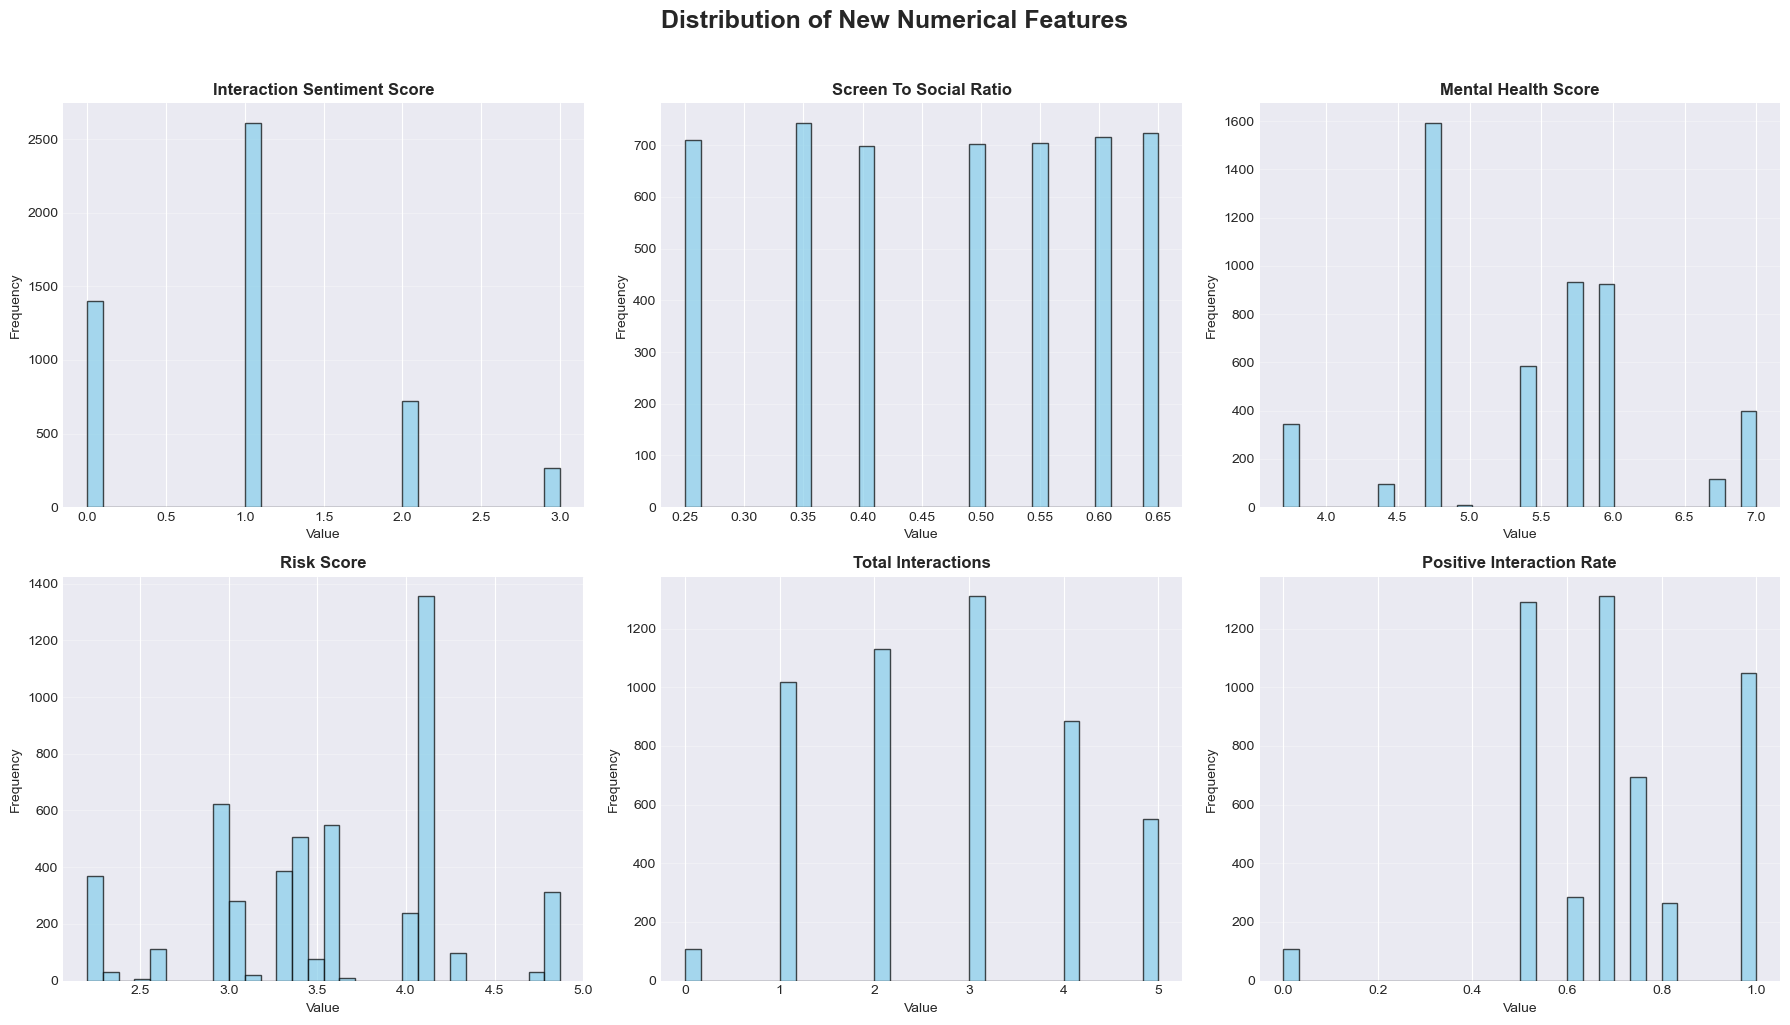

In [23]:
# Visualize distribution of numerical engineered features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of New Numerical Features', fontsize=18, fontweight='bold', y=1.02)

numerical_features = ['interaction_sentiment_score', 'screen_to_social_ratio', 
                      'mental_health_score', 'risk_score', 'total_interactions',
                      'positive_interaction_rate']

for idx, feature in enumerate(numerical_features):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].hist(Social_clean[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Value', fontsize=10)
    axes[row, col].set_ylabel('Frequency', fontsize=10)
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

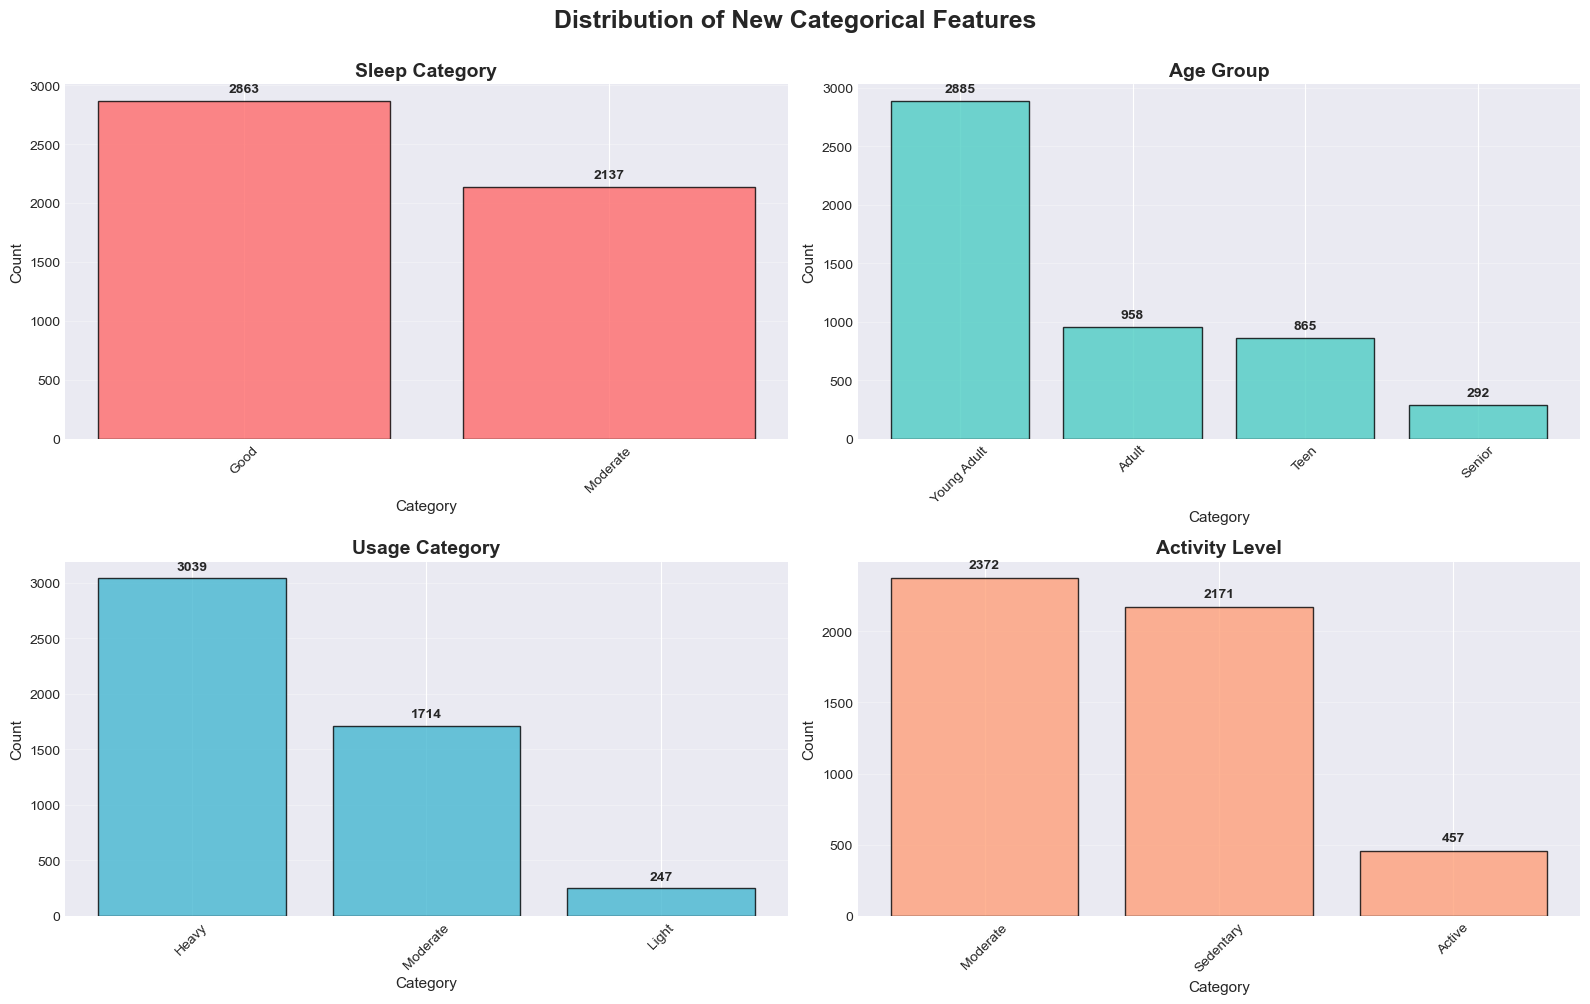

In [24]:
# Visualize categorical engineered features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Distribution of New Categorical Features', fontsize=18, fontweight='bold', y=1.00)

categorical_features = ['sleep_category', 'age_group', 'usage_category', 'activity_level']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, feature in enumerate(categorical_features):
    row = idx // 2
    col = idx % 2
    
    value_counts = Social_clean[feature].value_counts()
    
    axes[row, col].bar(value_counts.index, value_counts.values, color=colors[idx], edgecolor='black', alpha=0.8)
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}', fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel('Category', fontsize=11)
    axes[row, col].set_ylabel('Count', fontsize=11)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[row, col].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Final Dataset Overview

Summary of the cleaned and feature-engineered dataset.

In [25]:
print("=" * 100)
print("FINAL CLEANED DATASET OVERVIEW")
print("=" * 100)

print(f"\n📊 Final Shape: {Social_clean.shape[0]} rows × {Social_clean.shape[1]} columns")
print(f"\n📋 All Columns ({Social_clean.shape[1]} total):")
print("\n🔹 Original Columns (15):")
original_cols = ['person_name', 'age', 'date', 'gender', 'platform', 
                 'daily_screen_time_min', 'social_media_time_min', 
                 'negative_interactions_count', 'positive_interactions_count',
                 'sleep_hours', 'physical_activity_min', 'anxiety_level',
                 'stress_level', 'mood_level', 'mental_state']

for idx, col in enumerate(original_cols, 1):
    print(f"  {idx:2d}. {col}")

print("\n🔹 Engineered Features (10):")
engineered_cols = ['interaction_sentiment_score', 'screen_to_social_ratio',
                   'total_interactions', 'positive_interaction_rate',
                   'sleep_category', 'age_group', 'usage_category',
                   'mental_health_score', 'activity_level', 'risk_score']

for idx, col in enumerate(engineered_cols, 1):
    print(f"  {idx:2d}. {col}")

print(f"\n✅ Data Cleaning and Feature Engineering Complete!")

FINAL CLEANED DATASET OVERVIEW

📊 Final Shape: 5000 rows × 25 columns

📋 All Columns (25 total):

🔹 Original Columns (15):
   1. person_name
   2. age
   3. date
   4. gender
   5. platform
   6. daily_screen_time_min
   7. social_media_time_min
   8. negative_interactions_count
   9. positive_interactions_count
  10. sleep_hours
  11. physical_activity_min
  12. anxiety_level
  13. stress_level
  14. mood_level
  15. mental_state

🔹 Engineered Features (10):
   1. interaction_sentiment_score
   2. screen_to_social_ratio
   3. total_interactions
   4. positive_interaction_rate
   5. sleep_category
   6. age_group
   7. usage_category
   8. mental_health_score
   9. activity_level
  10. risk_score

✅ Data Cleaning and Feature Engineering Complete!


In [26]:
# Final data info
print("=" * 100)
print("FINAL DATASET INFORMATION")
print("=" * 100)
Social_clean.info()

FINAL DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64

In [27]:
# Display a comprehensive sample of the final dataset
print("=" * 100)
print("FINAL DATASET SAMPLE (First 5 Rows)")
print("=" * 100)
Social_clean.head()

FINAL DATASET SAMPLE (First 5 Rows)


person_name  age       date  gender   platform  daily_screen_time_min  \
0     Reyansh Ghosh   35   1/1/2024    Male  Instagram                    320   
1        Neha Patel   24  1/12/2024  Female  Instagram                    453   
2      Ananya Naidu   26   1/6/2024    Male   Snapchat                    357   
3          Neha Das   66  1/17/2024  Female   Snapchat                    190   
4  Reyansh Banerjee   31  1/28/2024    Male   Snapchat                    383   

   social_media_time_min  negative_interactions_count  \
0                    160                            1   
1                    226                            1   
2                    196                            1   
3                    105                            0   
4                    211                            1   

   positive_interactions_count  sleep_hours  physical_activity_min  \
0                            2         7.40                     28   
1                            3         6.70                     15   
2                            2         7.20                     24   
3                            1         8.00                     41   
4                            2         7.10                     22   

   anxiety_level  stress_level  mood_level mental_state  \
0              2             7           6     Stressed   
1              3             8           5     Stressed   
2              3             7           6     Stressed   
3              2             6           6     Stressed   
4              3             7           6     Stressed   

   interaction_sentiment_score  screen_to_social_ratio  total_interactions  \
0                            1                    0.50                   3   
1                            2                    0.50                   4   
2                            1                    0.55                   3   
3                            1                    0.55                   1   
4                            1                    0.55                   3   

   positive_interaction_rate sleep_category    age_group usage_category  \
0                       0.67           Good  Young Adult       Moderate   
1                       0.75       Moderate  Young Adult          Heavy   
2                       0.67           Good  Young Adult       Moderate   
3                       1.00           Good       Senior       Moderate   
4                       0.67           Good  Young Adult          Heavy   

   mental_health_score activity_level  risk_score  
0                 5.70       Moderate        3.30  
1                 4.70      Sedentary        4.11  
2                 5.40       Moderate        3.58  
3                 6.00         Active        2.95  
4                 5.40       Moderate        3.60

## 7. Data Quality Check

Final validation to ensure data integrity before saving.

In [28]:
print("=" * 100)
print("FINAL DATA QUALITY CHECK")
print("=" * 100)

# Check 1: Missing Values
missing_final = Social_clean.isnull().sum().sum()
print(f"\n✅ Missing Values: {missing_final}")

# Check 2: Duplicates
duplicates_final = Social_clean.duplicated().sum()
print(f"✅ Duplicate Rows: {duplicates_final}")

# Check 3: Data Types
print(f"\n✅ Data Types Distribution:")
print(Social_clean.dtypes.value_counts())

# Check 4: Value Ranges for Key Metrics
print(f"\n✅ Value Ranges Check:")
print(f"   - Mental Health Score: {Social_clean['mental_health_score'].min():.2f} to {Social_clean['mental_health_score'].max():.2f}")
print(f"   - Risk Score: {Social_clean['risk_score'].min():.2f} to {Social_clean['risk_score'].max():.2f}")
print(f"   - Screen to Social Ratio: {Social_clean['screen_to_social_ratio'].min():.2f} to {Social_clean['screen_to_social_ratio'].max():.2f}")

# Check 5: Categorical Integrity
print(f"\n✅ Categorical Features Integrity:")
for col in ['sleep_category', 'age_group', 'usage_category', 'activity_level']:
    unique_vals = Social_clean[col].nunique()
    print(f"   - {col}: {unique_vals} categories")

print(f"\n🎉 All Quality Checks Passed!")

FINAL DATA QUALITY CHECK

✅ Missing Values: 0
✅ Duplicate Rows: 0

✅ Data Types Distribution:
int64      11
object      9
float64     5
Name: count, dtype: int64

✅ Value Ranges Check:
   - Mental Health Score: 3.70 to 7.00
   - Risk Score: 2.20 to 4.87
   - Screen to Social Ratio: 0.25 to 0.65

✅ Categorical Features Integrity:
   - sleep_category: 2 categories
   - age_group: 4 categories
   - usage_category: 3 categories
   - activity_level: 3 categories

🎉 All Quality Checks Passed!


## 8. Save Cleaned Dataset

Save the final cleaned and feature-engineered dataset for future analysis.

In [29]:
# Save the cleaned dataset
output_filename = 'social_media_mental_health_cleaned.csv'
Social_clean.to_csv(output_filename, index=False)

print("=" * 100)
print("DATASET SAVED SUCCESSFULLY")
print("=" * 100)
print(f"\n✅ Cleaned dataset saved as: '{output_filename}'")
print(f"📊 Total Records: {Social_clean.shape[0]:,}")
print(f"📊 Total Features: {Social_clean.shape[1]}")
print(f"📊 File Size: ~{Social_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\n💾 Dataset successfully exported and ready for Phase 2!")

DATASET SAVED SUCCESSFULLY

✅ Cleaned dataset saved as: 'social_media_mental_health_cleaned.csv'
📊 Total Records: 5,000
📊 Total Features: 25
📊 File Size: ~3.04 MB

💾 Dataset successfully exported and ready for Phase 2!


---

## 📊 Phase 1 Complete Summary

### ✅ What We Accomplished:

**1. Data Loading & Exploration**
   - Loaded dataset with 5,000 records and 15 original features
   - Examined data structure, types, and basic statistics
   - Verified data quality (no missing values, no duplicates)

**2. Data Cleaning**
   - Validated all data ranges
   - Checked for anomalies and outliers
   - Ensured data integrity across all columns

**3. Feature Engineering** 
   Created 10 new powerful features:
   
   **Numerical Features:**
   - `interaction_sentiment_score` - Net sentiment from interactions
   - `screen_to_social_ratio` - Proportion of screen time on social media
   - `total_interactions` - Sum of all interactions
   - `positive_interaction_rate` - Rate of positive interactions
   - `mental_health_score` - Composite mental wellbeing metric
   - `risk_score` - Overall mental health risk indicator
   
   **Categorical Features:**
   - `sleep_category` - Sleep quality classification
   - `age_group` - Demographic age segments
   - `usage_category` - Screen time usage level
   - `activity_level` - Physical activity classification

### 📈 Final Dataset Statistics:
- **Total Records:** 5,000
- **Total Features:** 25 (15 original + 10 engineered)
- **Data Quality:** 100% complete, no missing values
- **File Saved:** `social_media_mental_health_cleaned.csv`

## Phase 2: Exploratory Data Analysis (EDA)

**Objective:** Conduct comprehensive exploratory analysis to uncover patterns, relationships, and insights about social media usage and mental health indicators.

**Date:** November 28, 2025

---

### Phase 2 Structure:
1. **Setup & Data Loading**
2. **Univariate Analysis** - Individual feature distributions
3. **Bivariate Analysis** - Relationships between pairs of variables
4. **Multivariate Analysis** - Complex patterns and correlations
5. **Platform Analysis** - Platform-specific insights
6. **Demographic Analysis** - Age and gender patterns
7. **Behavioral Pattern Analysis** - Usage habits and mental health
8. **Key Insights Summary**

---

## 1. Setup & Data Loading

Import necessary libraries and load the cleaned dataset.

In [30]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, pearsonr

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [31]:
# Load the cleaned dataset
file_path = '/media/pharmacy/Data/Pharmacy_Projects/Data_Projects/Social Media Mental Health Indicators Dataset/Cleaned_Datasets/social_media_mental_health_cleaned.csv'

New_Social = pd.read_csv(file_path)

print("=" * 100)
print("CLEANED DATASET LOADED SUCCESSFULLY")
print("=" * 100)
print(f"\n📊 Dataset Shape: {New_Social.shape[0]:,} rows × {New_Social.shape[1]} columns")
print(f"📅 Data loaded from: social_media_mental_health_cleaned.csv")
print(f"\n✅ Ready for Exploratory Data Analysis!")

CLEANED DATASET LOADED SUCCESSFULLY

📊 Dataset Shape: 5,000 rows × 25 columns
📅 Data loaded from: social_media_mental_health_cleaned.csv

✅ Ready for Exploratory Data Analysis!


In [32]:
# Quick overview of the dataset
print("=" * 100)
print("DATASET OVERVIEW")
print("=" * 100)
print("\n📋 First 5 rows:")
display(New_Social.head())

print("\n📊 Dataset Info:")
New_Social.info()

DATASET OVERVIEW

📋 First 5 rows:


person_name  age       date  gender   platform  daily_screen_time_min  \
0     Reyansh Ghosh   35   1/1/2024    Male  Instagram                    320   
1        Neha Patel   24  1/12/2024  Female  Instagram                    453   
2      Ananya Naidu   26   1/6/2024    Male   Snapchat                    357   
3          Neha Das   66  1/17/2024  Female   Snapchat                    190   
4  Reyansh Banerjee   31  1/28/2024    Male   Snapchat                    383   

   social_media_time_min  negative_interactions_count  \
0                    160                            1   
1                    226                            1   
2                    196                            1   
3                    105                            0   
4                    211                            1   

   positive_interactions_count  sleep_hours  physical_activity_min  \
0                            2         7.40                     28   
1                            3         6.70                     15   
2                            2         7.20                     24   
3                            1         8.00                     41   
4                            2         7.10                     22   

   anxiety_level  stress_level  mood_level mental_state  \
0              2             7           6     Stressed   
1              3             8           5     Stressed   
2              3             7           6     Stressed   
3              2             6           6     Stressed   
4              3             7           6     Stressed   

   interaction_sentiment_score  screen_to_social_ratio  total_interactions  \
0                            1                    0.50                   3   
1                            2                    0.50                   4   
2                            1                    0.55                   3   
3                            1                    0.55                   1   
4                            1                    0.55                   3   

   positive_interaction_rate sleep_category    age_group usage_category  \
0                       0.67           Good  Young Adult       Moderate   
1                       0.75       Moderate  Young Adult          Heavy   
2                       0.67           Good  Young Adult       Moderate   
3                       1.00           Good       Senior       Moderate   
4                       0.67           Good  Young Adult          Heavy   

   mental_health_score activity_level  risk_score  
0                 5.70       Moderate        3.30  
1                 4.70      Sedentary        4.11  
2                 5.40       Moderate        3.58  
3                 6.00         Active        2.95  
4                 5.40       Moderate        3.60


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  m

## 2. Univariate Analysis

### 2.1 Distribution of Numerical Variables

Analyzing the distribution of individual numerical features.

In [33]:
# Statistical summary of all numerical features
print("=" * 100)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("=" * 100)

numerical_cols = New_Social.select_dtypes(include=[np.number]).columns.tolist()
# Remove 'age' from the list if you want to analyze it separately
if 'age' in numerical_cols:
    numerical_cols.remove('age')

New_Social[numerical_cols].describe().round(2).T.style.background_gradient(cmap='coolwarm', axis=1).format(precision=2)

STATISTICAL SUMMARY - NUMERICAL FEATURES


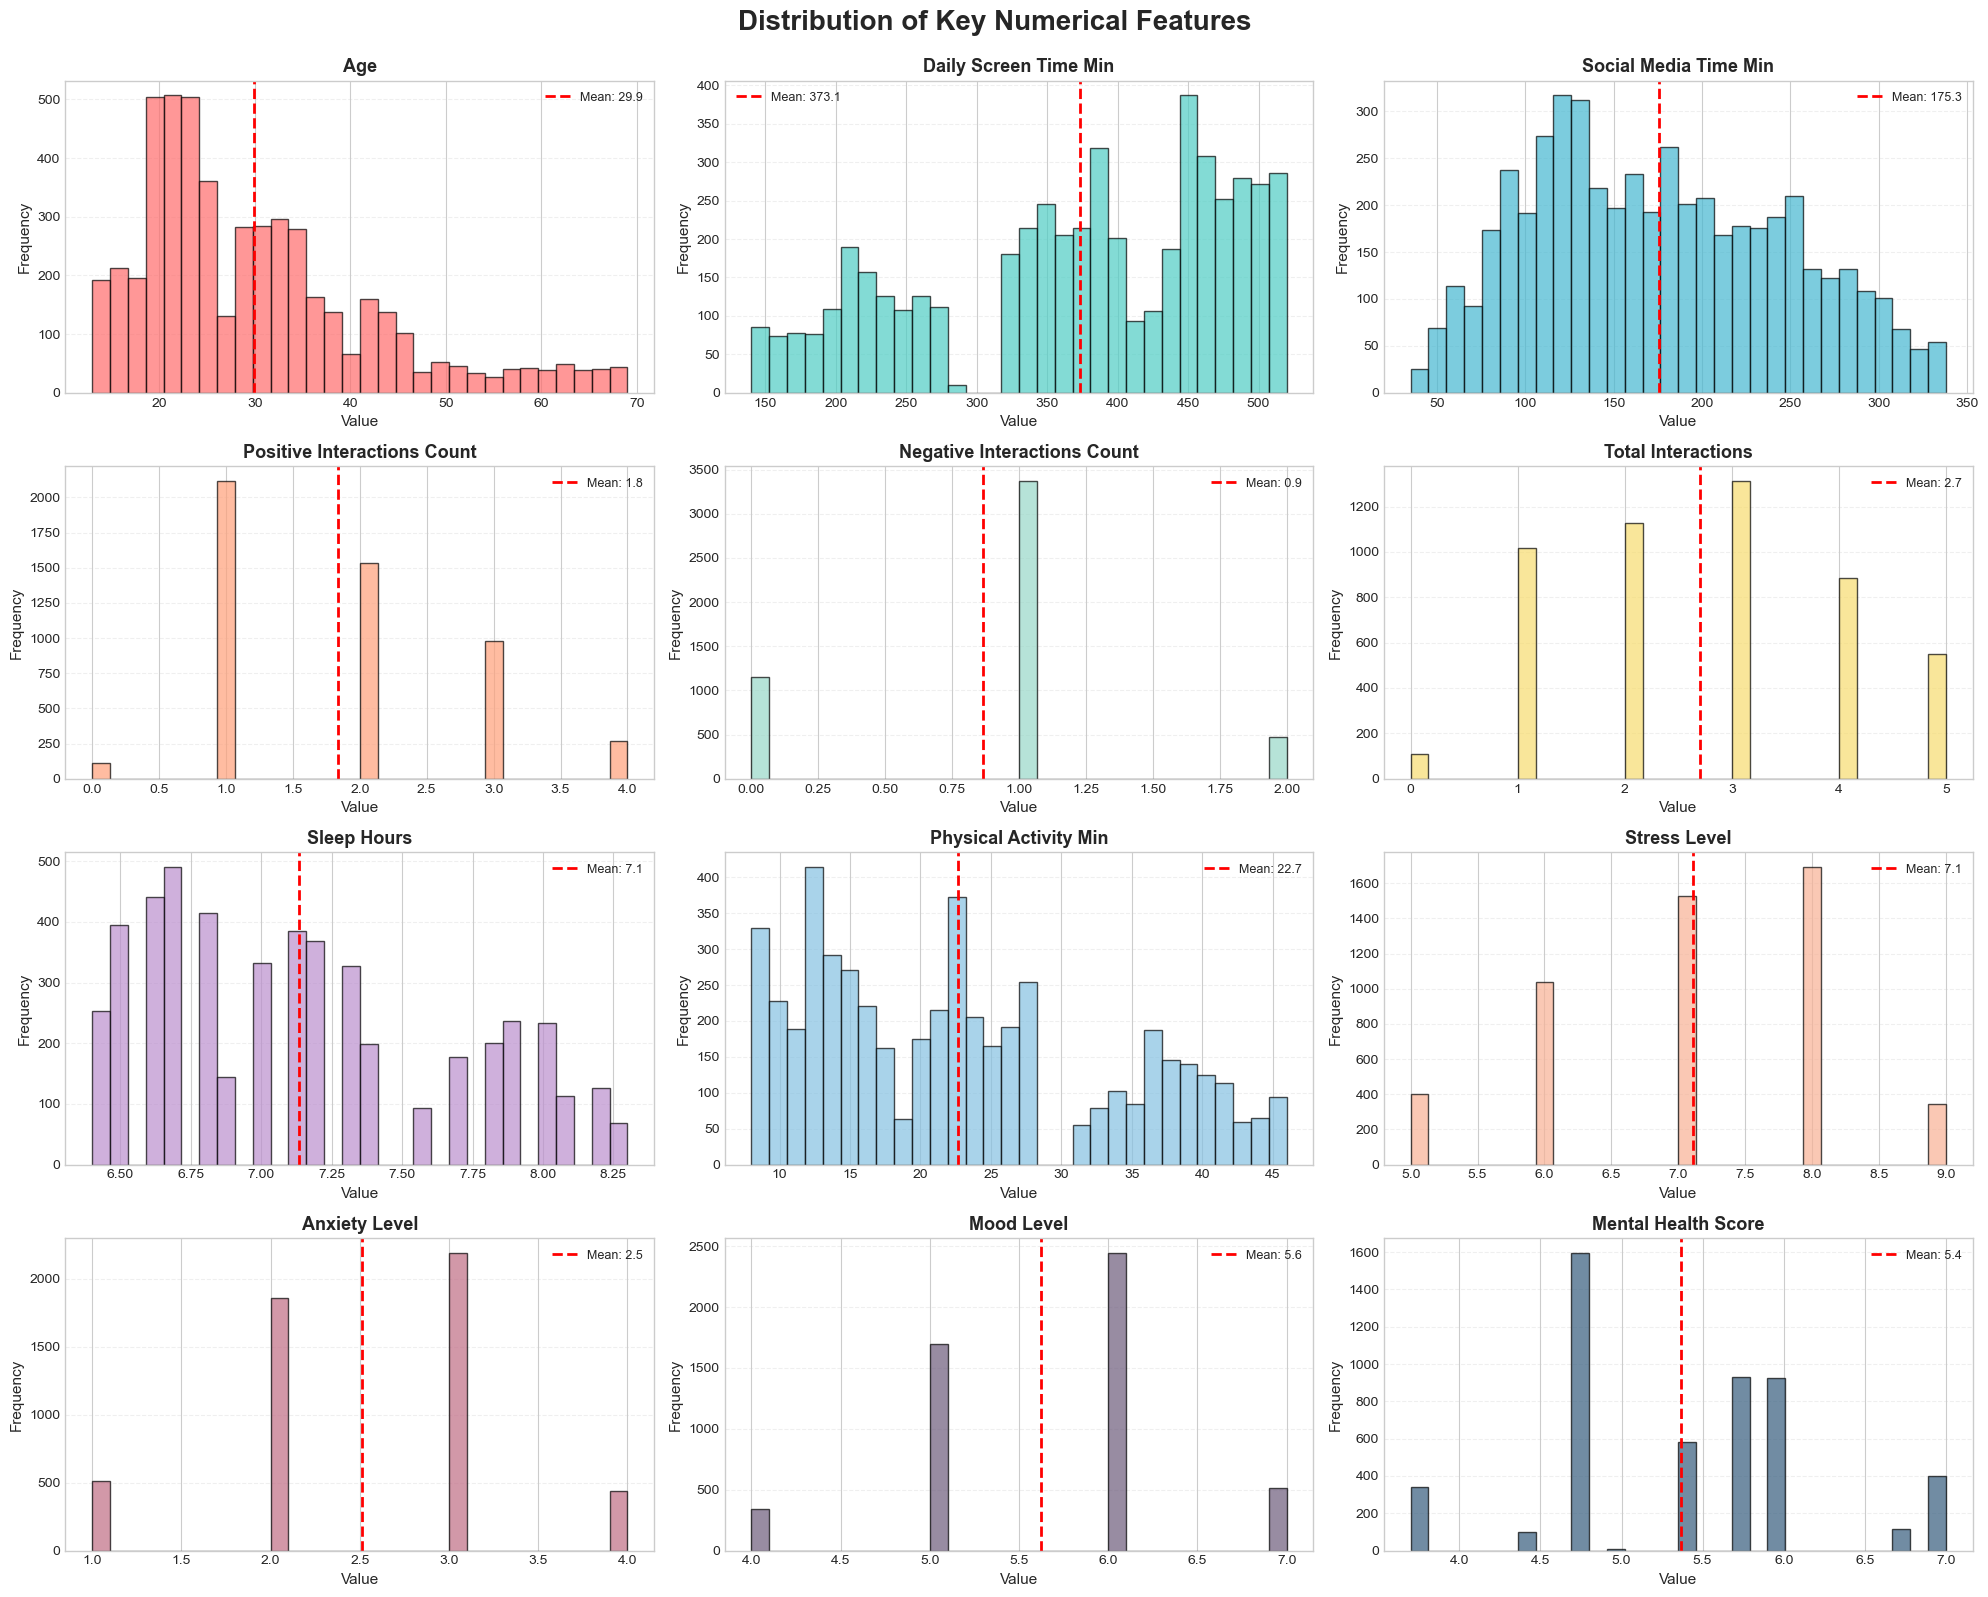

In [34]:
# Distribution plots for key numerical variables
fig, axes = plt.subplots(4, 3, figsize=(20, 16))
fig.suptitle('Distribution of Key Numerical Features', fontsize=20, fontweight='bold', y=0.995)

numerical_features = [
    'age', 'daily_screen_time_min', 'social_media_time_min',
    'positive_interactions_count', 'negative_interactions_count', 'total_interactions',
    'sleep_hours', 'physical_activity_min', 'stress_level',
    'anxiety_level', 'mood_level', 'mental_health_score'
]

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F',
          '#BB8FCE', '#85C1E2', '#F8B195', '#C06C84', '#6C5B7B', '#355C7D']

for idx, feature in enumerate(numerical_features):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].hist(New_Social[feature], bins=30, color=colors[idx], 
                        edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}', 
                             fontsize=13, fontweight='bold')
    axes[row, col].set_xlabel('Value', fontsize=11)
    axes[row, col].set_ylabel('Frequency', fontsize=11)
    axes[row, col].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add mean line
    mean_val = New_Social[feature].mean()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', 
                           linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[row, col].legend(fontsize=9)

plt.tight_layout()
plt.show()

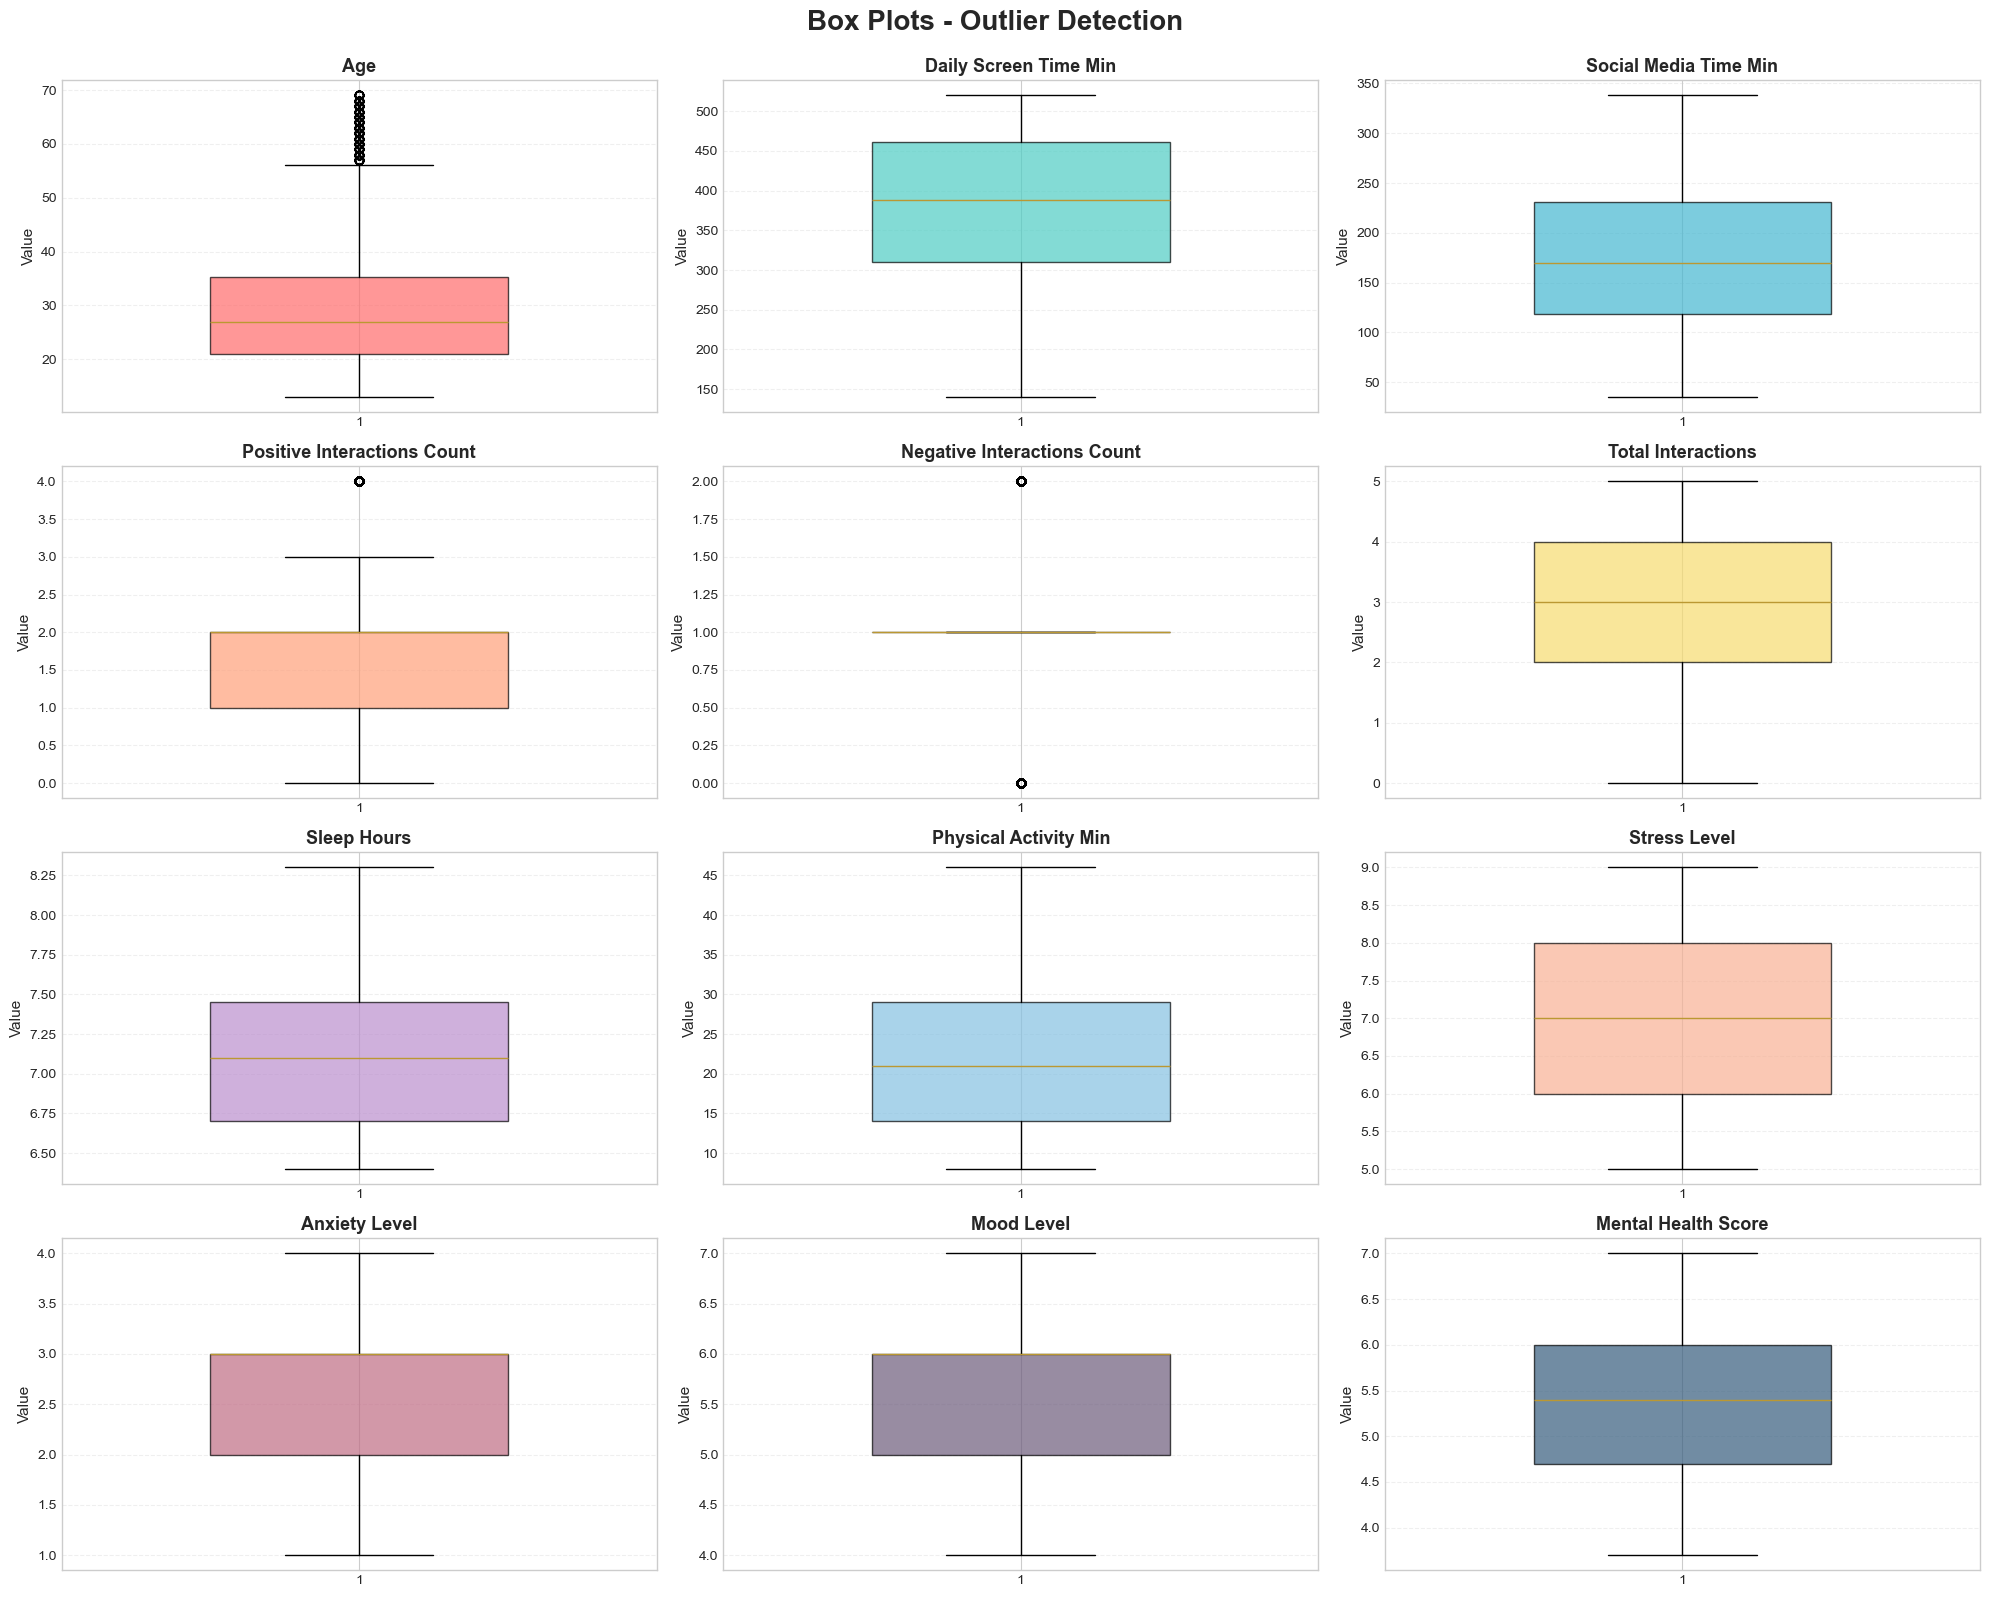

In [35]:
# Box plots to identify outliers
fig, axes = plt.subplots(4, 3, figsize=(20, 16))
fig.suptitle('Box Plots - Outlier Detection', fontsize=20, fontweight='bold', y=0.995)

for idx, feature in enumerate(numerical_features):
    row = idx // 3
    col = idx % 3
    
    box = axes[row, col].boxplot(New_Social[feature], patch_artist=True, widths=0.5)
    
    # Customize box plot colors
    for patch in box['boxes']:
        patch.set_facecolor(colors[idx])
        patch.set_alpha(0.7)
    
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}', 
                             fontsize=13, fontweight='bold')
    axes[row, col].set_ylabel('Value', fontsize=11)
    axes[row, col].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### 2.2 Distribution of Categorical Variables

Analyzing the distribution of categorical features.

In [36]:
# Categorical variables distribution
categorical_features = ['gender', 'platform', 'mental_state', 'sleep_category', 
                        'age_group', 'usage_category', 'activity_level']

print("=" * 100)
print("CATEGORICAL FEATURES - VALUE COUNTS")
print("=" * 100)

for feature in categorical_features:
    if feature in New_Social.columns:
        print(f"\n{'='*70}")
        print(f"📊 {feature.upper().replace('_', ' ')}")
        print(f"{'='*70}")
        
        counts = New_Social[feature].value_counts()
        percentages = (New_Social[feature].value_counts(normalize=True) * 100).round(2)
        
        summary = pd.DataFrame({
            'Count': counts,
            'Percentage': percentages
        })
        print(summary)

CATEGORICAL FEATURES - VALUE COUNTS

📊 GENDER
        Count  Percentage
gender                   
Female   2474       49.48
Male     2427       48.54
Other      99        1.98

📊 PLATFORM
           Count  Percentage
platform                    
Facebook     744       14.88
TikTok       723       14.46
YouTube      716       14.32
WhatsApp     710       14.20
Snapchat     705       14.10
Instagram    703       14.06
Twitter      699       13.98

📊 MENTAL STATE
              Count  Percentage
mental_state                   
Stressed       4601       92.02
Healthy         341        6.82
At_Risk          58        1.16

📊 SLEEP CATEGORY
                Count  Percentage
sleep_category                   
Good             2863       57.26
Moderate         2137       42.74

📊 AGE GROUP
             Count  Percentage
age_group                     
Young Adult   2885       57.70
Adult          958       19.16
Teen           865       17.30
Senior         292        5.84

📊 USAGE CATEGORY
    

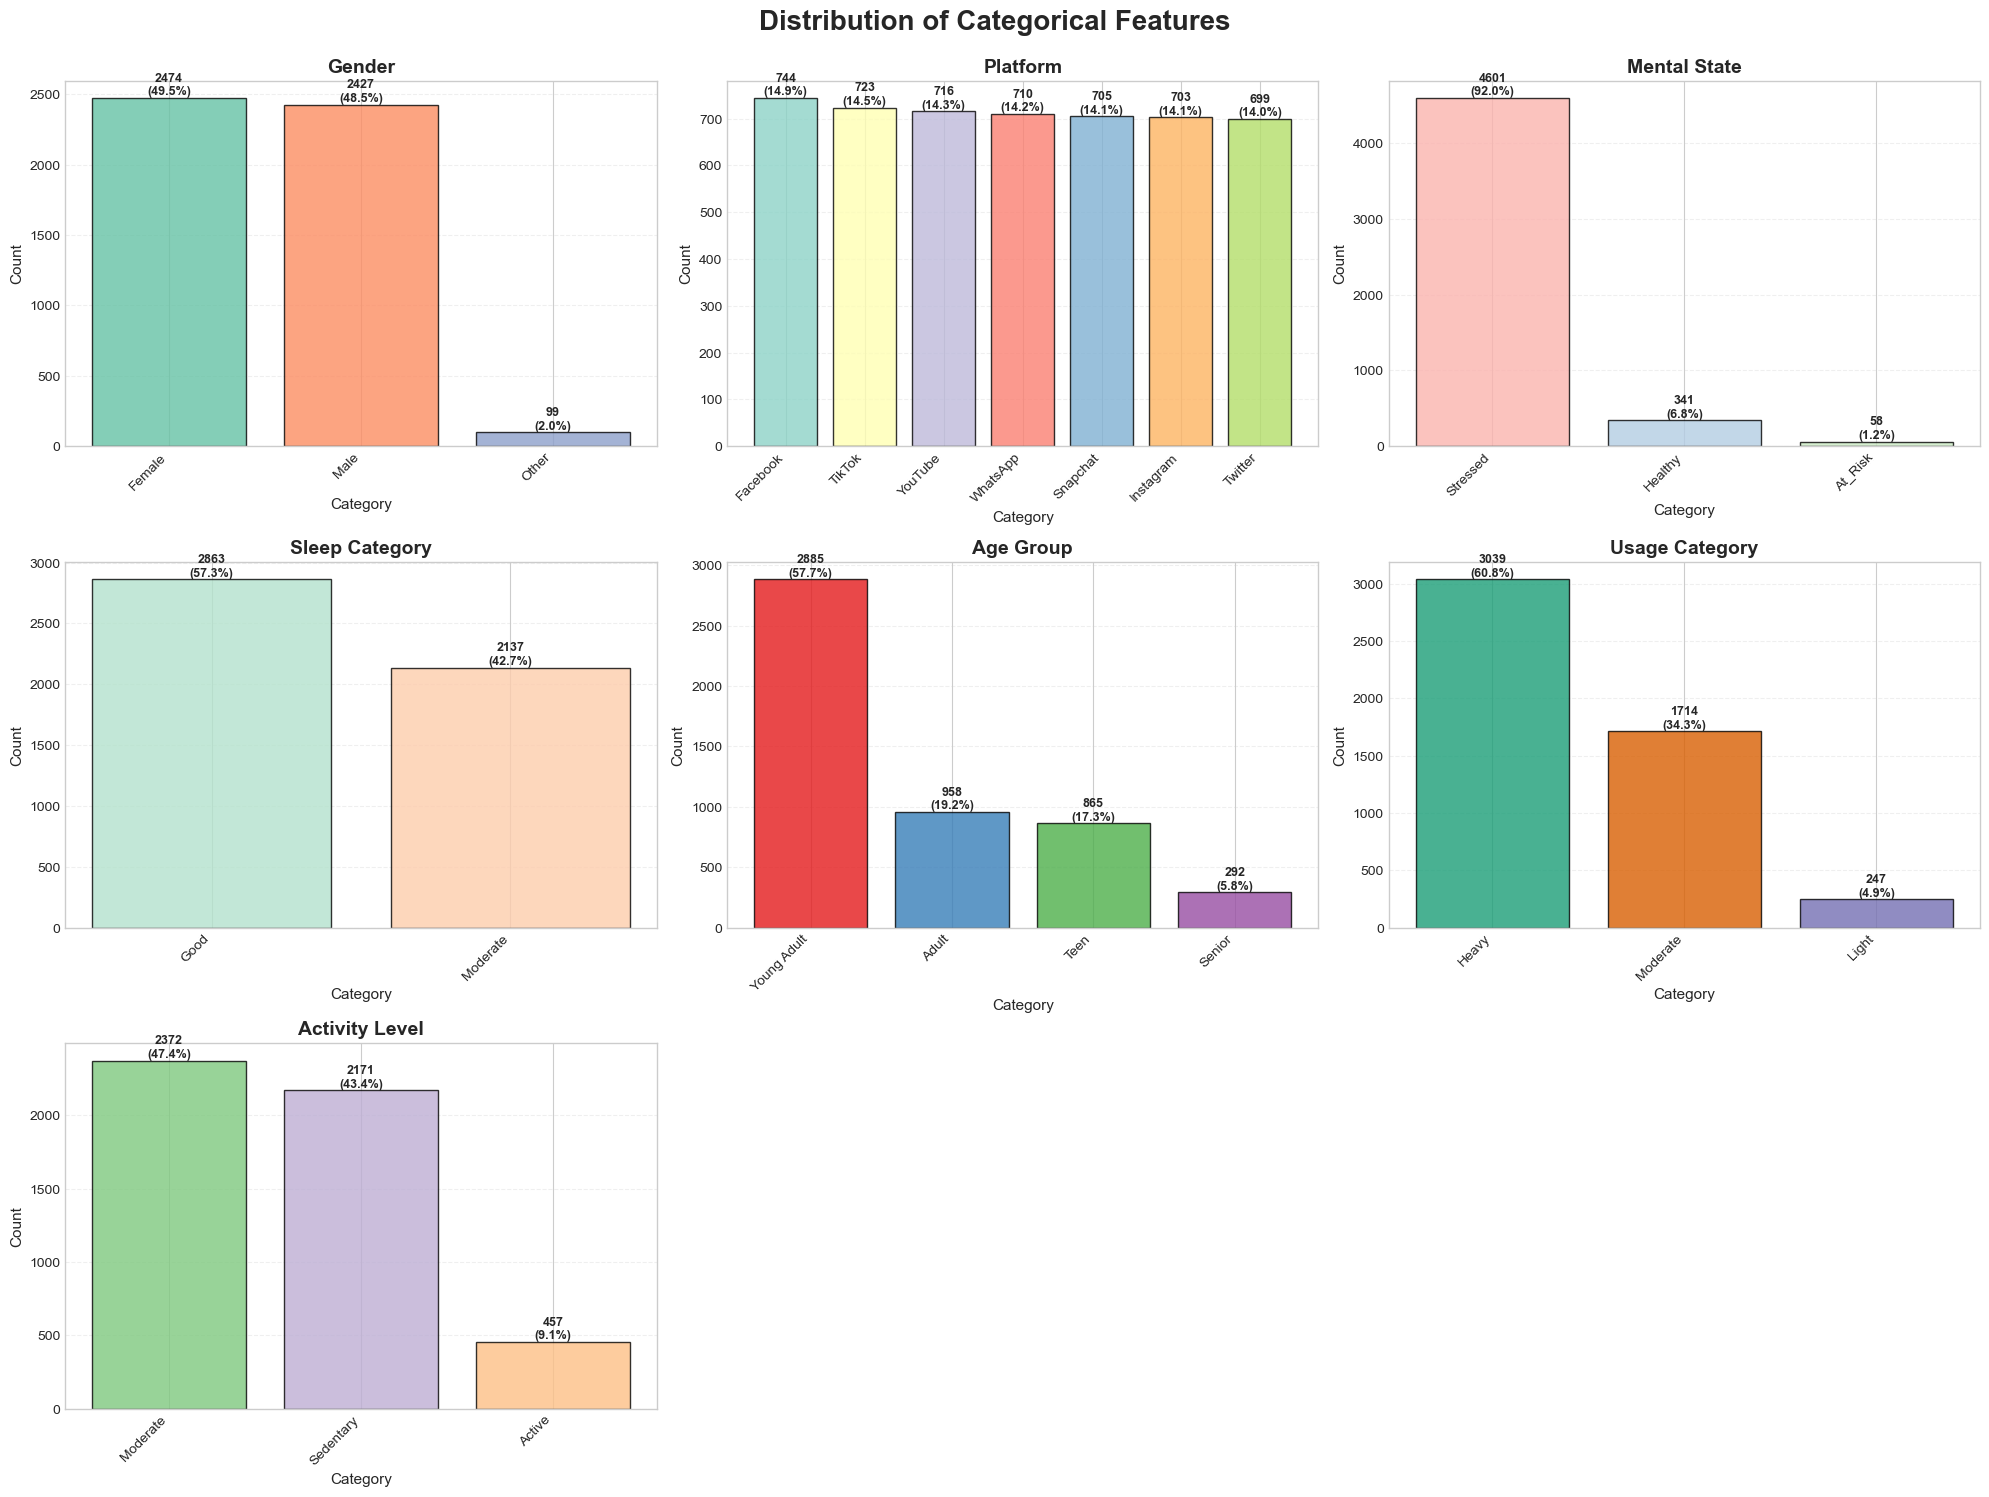

In [37]:
# Visualize categorical variables
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Distribution of Categorical Features', fontsize=20, fontweight='bold', y=0.995)

categorical_to_plot = ['gender', 'platform', 'mental_state', 'sleep_category', 
                       'age_group', 'usage_category', 'activity_level']

color_palettes = ['Set2', 'Set3', 'Pastel1', 'Pastel2', 'Set1', 'Dark2', 'Accent']

for idx, feature in enumerate(categorical_to_plot):
    if idx < 7:  # We have 7 features
        row = idx // 3
        col = idx % 3
        
        value_counts = New_Social[feature].value_counts()
        colors_list = sns.color_palette(color_palettes[idx], len(value_counts))
        
        bars = axes[row, col].bar(range(len(value_counts)), value_counts.values, 
                                   color=colors_list, edgecolor='black', alpha=0.8)
        
        axes[row, col].set_title(f'{feature.replace("_", " ").title()}', 
                                 fontsize=14, fontweight='bold')
        axes[row, col].set_xlabel('Category', fontsize=11)
        axes[row, col].set_ylabel('Count', fontsize=11)
        axes[row, col].set_xticks(range(len(value_counts)))
        axes[row, col].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[row, col].grid(axis='y', alpha=0.3, linestyle='--')
        
        # Add value labels on bars
        for i, (bar, val) in enumerate(zip(bars, value_counts.values)):
            height = bar.get_height()
            axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                                f'{val}\n({val/len(New_Social)*100:.1f}%)',
                                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Hide unused subplots
for idx in range(len(categorical_to_plot), 9):
    row = idx // 3
    col = idx % 3
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### 2.3 Mental Health Indicators Analysis

Detailed examination of mental health metrics distribution.

In [38]:
# Detailed analysis of mental health metrics
mental_health_features = ['stress_level', 'anxiety_level', 'mood_level', 
                          'mental_health_score', 'risk_score']

print("=" * 100)
print("MENTAL HEALTH INDICATORS - DETAILED STATISTICS")
print("=" * 100)

mental_stats = New_Social[mental_health_features].describe().T
mental_stats['range'] = mental_stats['max'] - mental_stats['min']
mental_stats['cv'] = (mental_stats['std'] / mental_stats['mean'] * 100).round(2)  # Coefficient of variation

display(mental_stats.round(2))

MENTAL HEALTH INDICATORS - DETAILED STATISTICS


count  mean  std  min  25%  50%  75%  max  range    cv
stress_level        5000.00  7.11 1.06 5.00 6.00 7.00 8.00 9.00   4.00 14.95
anxiety_level       5000.00  2.51 0.79 1.00 2.00 3.00 3.00 4.00   3.00 31.67
mood_level          5000.00  5.63 0.76 4.00 5.00 6.00 6.00 7.00   3.00 13.51
mental_health_score 5000.00  5.36 0.84 3.70 4.70 5.40 6.00 7.00   3.30 15.59
risk_score          5000.00  3.57 0.67 2.20 3.01 3.56 4.11 4.87   2.67 18.69

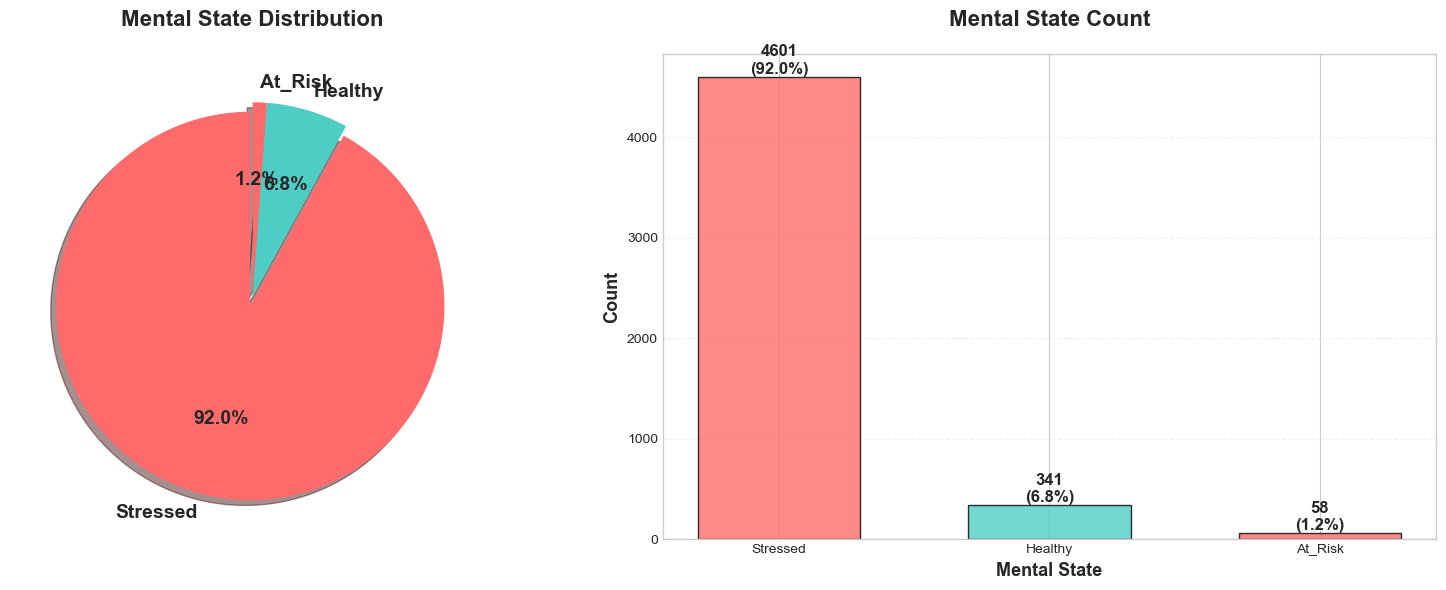


📊 Mental State Summary:
   - Stressed: 4,601 users (92.02%)
   - Healthy: 341 users (6.82%)
   - At_Risk: 58 users (1.16%)


In [39]:
# Distribution of Mental State
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
mental_state_counts = New_Social['mental_state'].value_counts()
colors_pie = ['#FF6B6B', '#4ECDC4']

# Create explode tuple dynamically based on number of categories
explode = tuple([0.05 if i == 0 else 0 for i in range(len(mental_state_counts))])

axes[0].pie(mental_state_counts.values, labels=mental_state_counts.index, 
            autopct='%1.1f%%', startangle=90, colors=colors_pie[:len(mental_state_counts)], 
            explode=explode, shadow=True, textprops={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_title('Mental State Distribution', fontsize=16, fontweight='bold', pad=20)

# Bar chart
bars = axes[1].bar(mental_state_counts.index, mental_state_counts.values, 
                   color=colors_pie[:len(mental_state_counts)], edgecolor='black', alpha=0.8, width=0.6)
axes[1].set_title('Mental State Count', fontsize=16, fontweight='bold', pad=20)
axes[1].set_xlabel('Mental State', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}\n({height/len(New_Social)*100:.1f}%)',
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Mental State Summary:")
for state in mental_state_counts.index:
    count = mental_state_counts[state]
    percentage = (count / len(New_Social)) * 100
    print(f"   - {state}: {count:,} users ({percentage:.2f}%)")

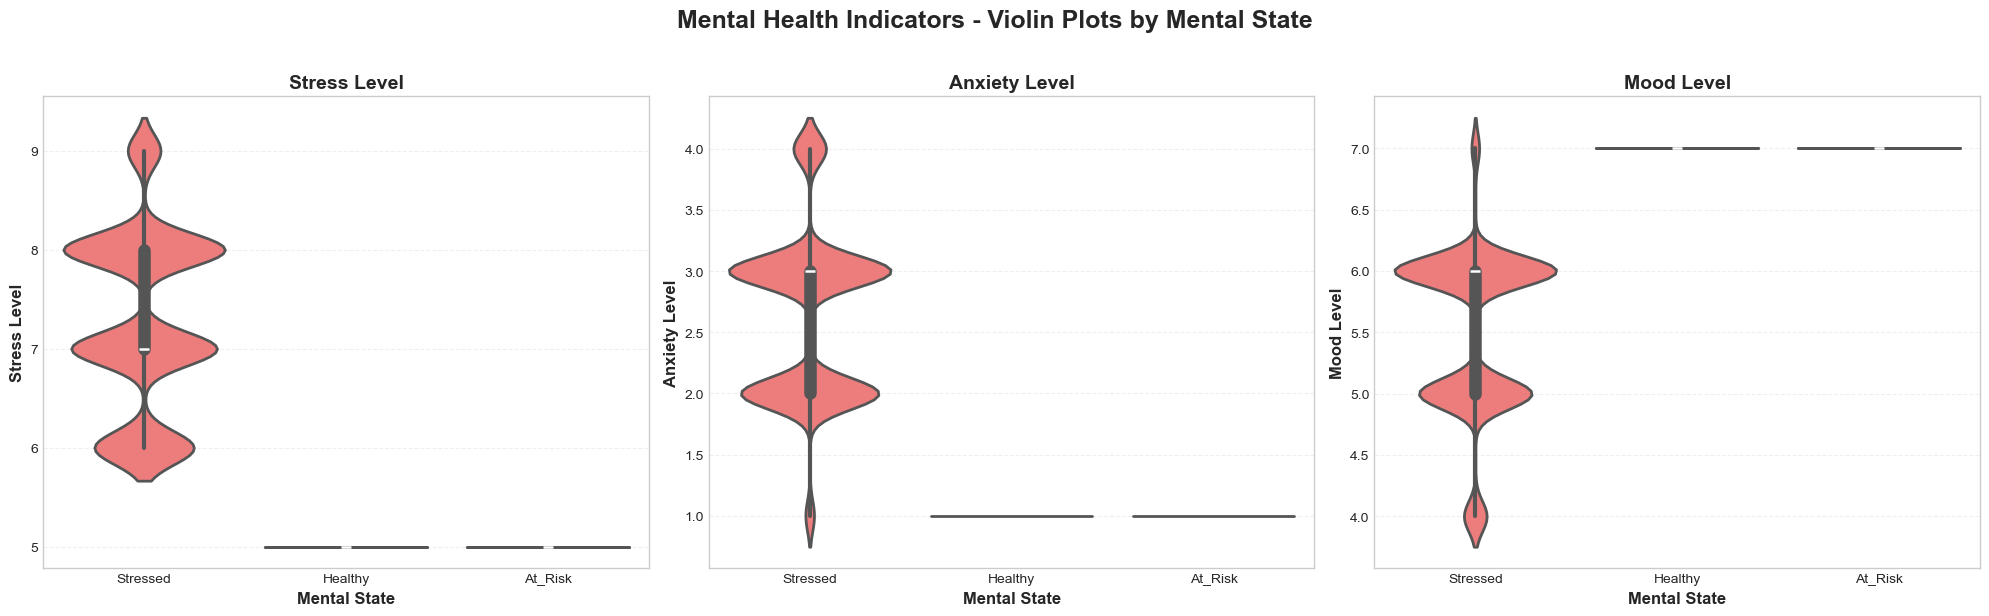

In [40]:
# Violin plots for mental health indicators
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Mental Health Indicators - Violin Plots by Mental State', 
             fontsize=18, fontweight='bold', y=1.02)

mental_indicators = ['stress_level', 'anxiety_level', 'mood_level']
colors_violin = ['#FF6B6B', '#FFA07A', '#4ECDC4']

for idx, indicator in enumerate(mental_indicators):
    sns.violinplot(data=New_Social, x='mental_state', y=indicator, 
                   ax=axes[idx], palette=['#FF6B6B', '#4ECDC4'], 
                   inner='box', linewidth=2)
    
    axes[idx].set_title(f'{indicator.replace("_", " ").title()}', 
                        fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Mental State', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(indicator.replace("_", " ").title(), fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### 2.4 Usage Categories Analysis

Examining screen time usage patterns.

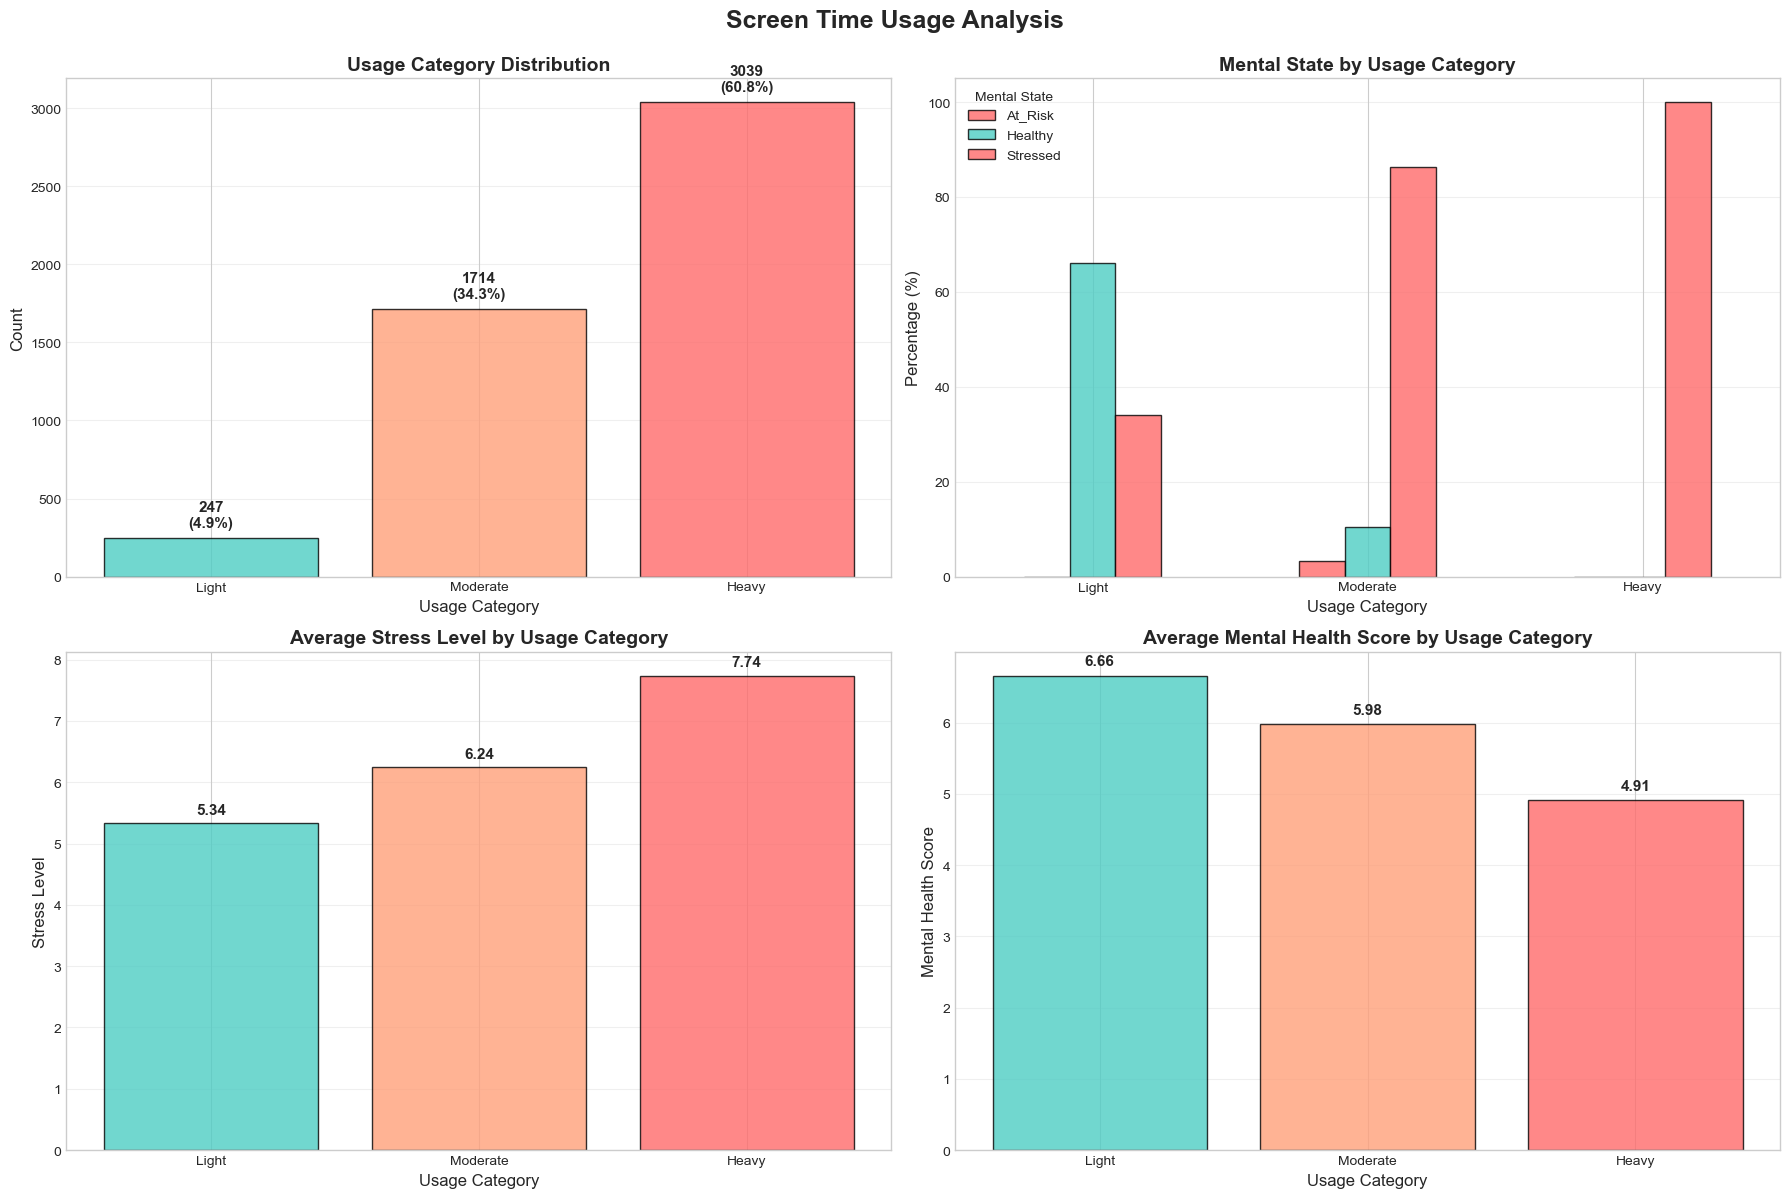

In [41]:
# Usage category analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Screen Time Usage Analysis', fontsize=18, fontweight='bold', y=0.995)

# Usage category distribution
usage_counts = New_Social['usage_category'].value_counts()
usage_order = ['Light', 'Moderate', 'Heavy']
usage_counts = usage_counts.reindex(usage_order)

axes[0, 0].bar(usage_counts.index, usage_counts.values, 
               color=['#4ECDC4', '#FFA07A', '#FF6B6B'], 
               edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Usage Category Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Usage Category', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(usage_counts.values):
    axes[0, 0].text(i, v + 50, f'{v}\n({v/len(New_Social)*100:.1f}%)', 
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

# Mental state by usage category
usage_mental = pd.crosstab(New_Social['usage_category'], New_Social['mental_state'], 
                           normalize='index') * 100
usage_mental = usage_mental.reindex(usage_order)

usage_mental.plot(kind='bar', ax=axes[0, 1], color=['#FF6B6B', '#4ECDC4'], 
                  edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Mental State by Usage Category', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Usage Category', fontsize=12)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 1].legend(title='Mental State', fontsize=10)
axes[0, 1].set_xticklabels(usage_mental.index, rotation=0)
axes[0, 1].grid(axis='y', alpha=0.3)

# Average stress by usage category
usage_stress = New_Social.groupby('usage_category')['stress_level'].mean().reindex(usage_order)

axes[1, 0].bar(usage_stress.index, usage_stress.values, 
               color=['#4ECDC4', '#FFA07A', '#FF6B6B'], 
               edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Average Stress Level by Usage Category', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Usage Category', fontsize=12)
axes[1, 0].set_ylabel('Stress Level', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(usage_stress.values):
    axes[1, 0].text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', 
                    fontsize=11, fontweight='bold')

# Average mental health score by usage category
usage_mh = New_Social.groupby('usage_category')['mental_health_score'].mean().reindex(usage_order)

axes[1, 1].bar(usage_mh.index, usage_mh.values, 
               color=['#4ECDC4', '#FFA07A', '#FF6B6B'], 
               edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Average Mental Health Score by Usage Category', 
                     fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Usage Category', fontsize=12)
axes[1, 1].set_ylabel('Mental Health Score', fontsize=12)
axes[1, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(usage_mh.values):
    axes[1, 1].text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', 
                    fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### 2.5 Key Observations from Univariate Analysis

Summary of findings from individual feature analysis.

In [42]:
print("=" * 100)
print("KEY OBSERVATIONS - UNIVARIATE ANALYSIS")
print("=" * 100)

print("\n📊 NUMERICAL FEATURES:")
print(f"   • Average Daily Screen Time: {New_Social['daily_screen_time_min'].mean():.2f} minutes (~{New_Social['daily_screen_time_min'].mean()/60:.2f} hours)")
print(f"   • Average Social Media Time: {New_Social['social_media_time_min'].mean():.2f} minutes (~{New_Social['social_media_time_min'].mean()/60:.2f} hours)")
print(f"   • Average Sleep Hours: {New_Social['sleep_hours'].mean():.2f} hours")
print(f"   • Average Physical Activity: {New_Social['physical_activity_min'].mean():.2f} minutes")

print("\n📊 MENTAL HEALTH METRICS:")
print(f"   • Average Stress Level: {New_Social['stress_level'].mean():.2f}/10")
print(f"   • Average Anxiety Level: {New_Social['anxiety_level'].mean():.2f}/10")
print(f"   • Average Mood Level: {New_Social['mood_level'].mean():.2f}/10")
print(f"   • Average Mental Health Score: {New_Social['mental_health_score'].mean():.2f}/10")
print(f"   • Average Risk Score: {New_Social['risk_score'].mean():.2f}/10")

print("\n📊 CATEGORICAL DISTRIBUTIONS:")
stressed_pct = (New_Social['mental_state'] == 'Stressed').sum() / len(New_Social) * 100
print(f"   • Stressed Users: {stressed_pct:.2f}%")
print(f"   • Healthy Users: {100-stressed_pct:.2f}%")

print("\n📊 USAGE PATTERNS:")
heavy_users = (New_Social['usage_category'] == 'Heavy').sum()
print(f"   • Heavy Users (>6 hours/day): {heavy_users} ({heavy_users/len(New_Social)*100:.2f}%)")

sleep_poor = (New_Social['sleep_category'] == 'Poor').sum()
print(f"   • Users with Poor Sleep (<6 hours): {sleep_poor} ({sleep_poor/len(New_Social)*100:.2f}%)")

sedentary = (New_Social['activity_level'] == 'Sedentary').sum()
print(f"   • Sedentary Users (<20 min activity): {sedentary} ({sedentary/len(New_Social)*100:.2f}%)")

print("\n" + "=" * 100)
print("✅ Univariate Analysis Complete!")
print("=" * 100)

KEY OBSERVATIONS - UNIVARIATE ANALYSIS

📊 NUMERICAL FEATURES:
   • Average Daily Screen Time: 373.06 minutes (~6.22 hours)
   • Average Social Media Time: 175.33 minutes (~2.92 hours)
   • Average Sleep Hours: 7.13 hours
   • Average Physical Activity: 22.69 minutes

📊 MENTAL HEALTH METRICS:
   • Average Stress Level: 7.11/10
   • Average Anxiety Level: 2.51/10
   • Average Mood Level: 5.63/10
   • Average Mental Health Score: 5.36/10
   • Average Risk Score: 3.57/10

📊 CATEGORICAL DISTRIBUTIONS:
   • Stressed Users: 92.02%
   • Healthy Users: 7.98%

📊 USAGE PATTERNS:
   • Heavy Users (>6 hours/day): 3039 (60.78%)
   • Users with Poor Sleep (<6 hours): 0 (0.00%)
   • Sedentary Users (<20 min activity): 2171 (43.42%)

✅ Univariate Analysis Complete!


## 3. Bivariate Analysis

Exploring relationships between pairs of variables to understand how different factors interact and influence each other.

### 3.1 Screen Time vs Mental Health

Analyzing the relationship between screen time usage and mental health indicators.

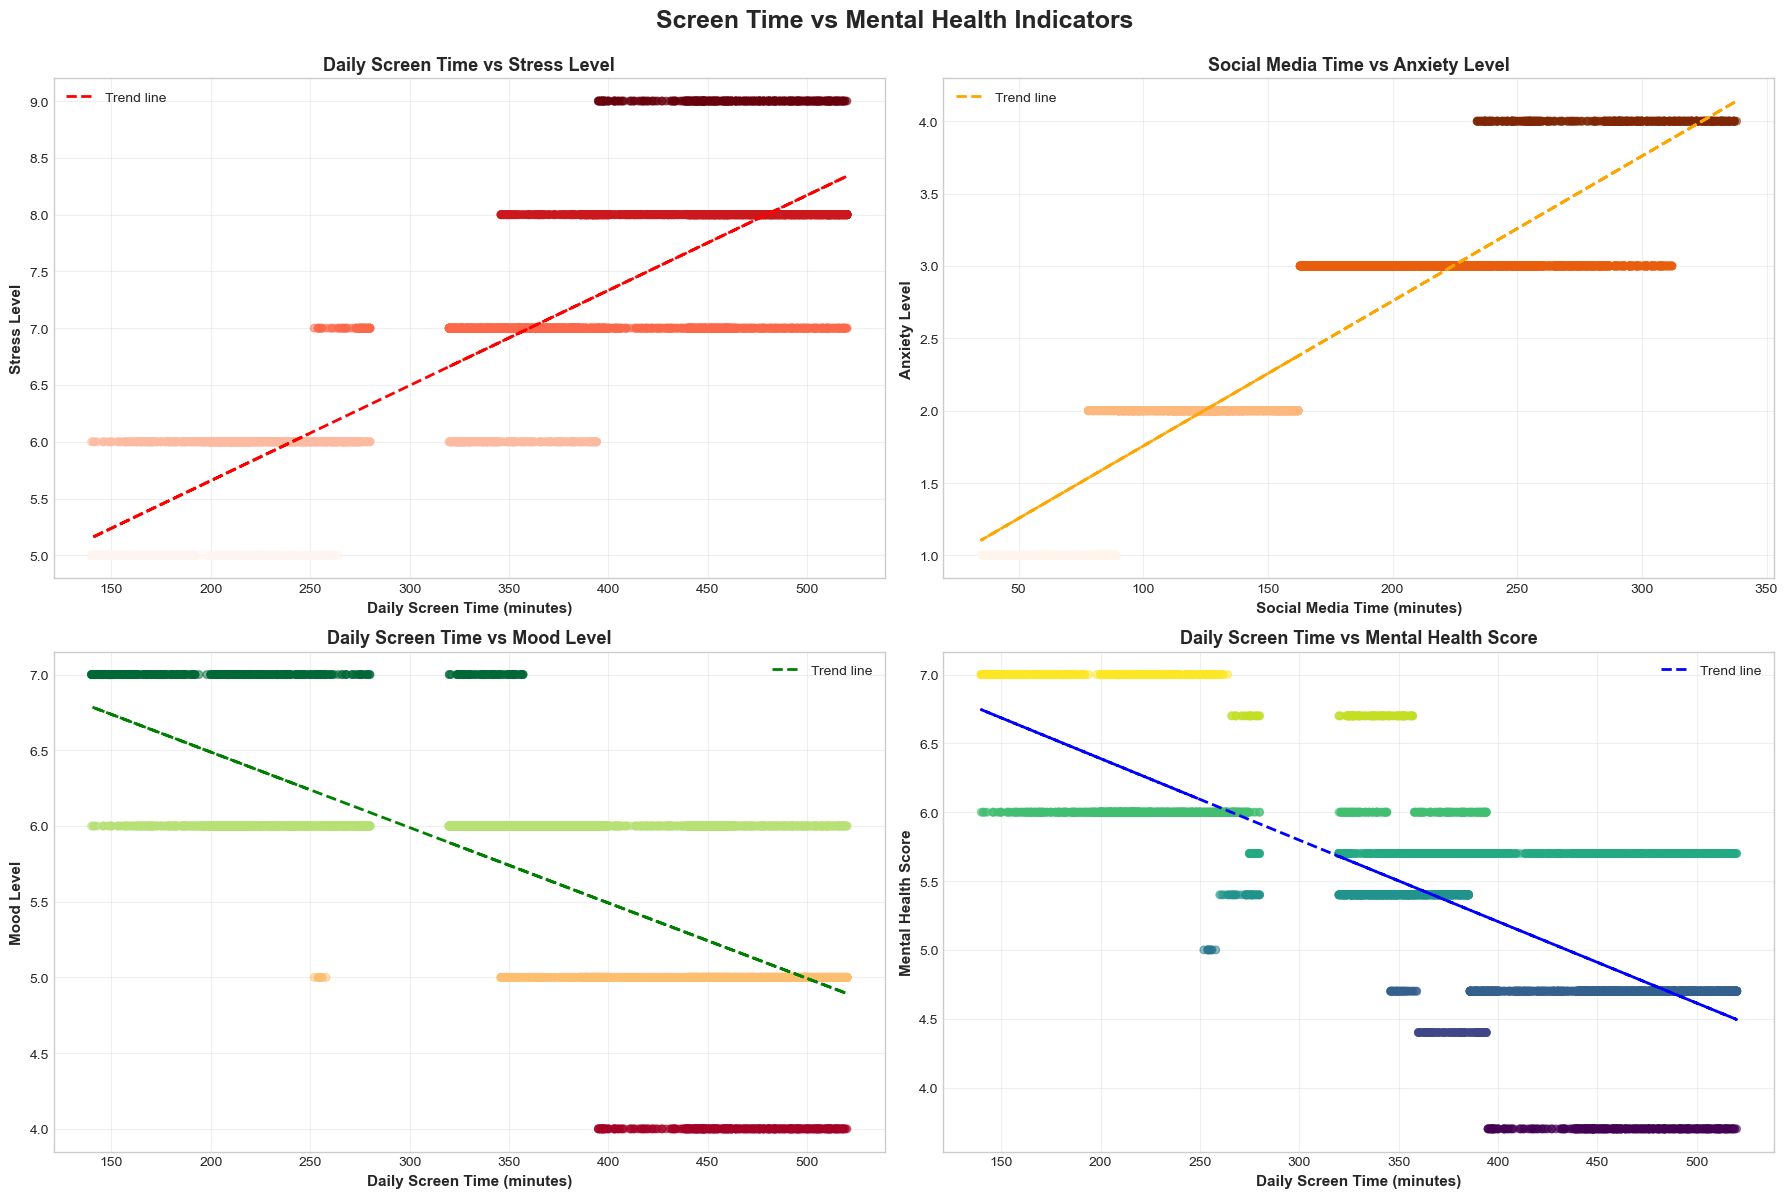

In [43]:
# Screen Time vs Mental Health Indicators
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Screen Time vs Mental Health Indicators', fontsize=18, fontweight='bold', y=0.995)

# Daily Screen Time vs Stress
axes[0, 0].scatter(New_Social['daily_screen_time_min'], New_Social['stress_level'], 
                   alpha=0.5, c=New_Social['stress_level'], cmap='Reds', s=30)
axes[0, 0].set_xlabel('Daily Screen Time (minutes)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Stress Level', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Daily Screen Time vs Stress Level', fontsize=13, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Add trend line
z = np.polyfit(New_Social['daily_screen_time_min'], New_Social['stress_level'], 1)
p = np.poly1d(z)
axes[0, 0].plot(New_Social['daily_screen_time_min'], p(New_Social['daily_screen_time_min']), 
                "r--", linewidth=2, label=f'Trend line')
axes[0, 0].legend()

# Social Media Time vs Anxiety
axes[0, 1].scatter(New_Social['social_media_time_min'], New_Social['anxiety_level'], 
                   alpha=0.5, c=New_Social['anxiety_level'], cmap='Oranges', s=30)
axes[0, 1].set_xlabel('Social Media Time (minutes)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Anxiety Level', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Social Media Time vs Anxiety Level', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Add trend line
z = np.polyfit(New_Social['social_media_time_min'], New_Social['anxiety_level'], 1)
p = np.poly1d(z)
axes[0, 1].plot(New_Social['social_media_time_min'], p(New_Social['social_media_time_min']), 
                "orange", linestyle='--', linewidth=2, label=f'Trend line')
axes[0, 1].legend()

# Screen Time vs Mood
axes[1, 0].scatter(New_Social['daily_screen_time_min'], New_Social['mood_level'], 
                   alpha=0.5, c=New_Social['mood_level'], cmap='RdYlGn', s=30)
axes[1, 0].set_xlabel('Daily Screen Time (minutes)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Mood Level', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Daily Screen Time vs Mood Level', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Add trend line
z = np.polyfit(New_Social['daily_screen_time_min'], New_Social['mood_level'], 1)
p = np.poly1d(z)
axes[1, 0].plot(New_Social['daily_screen_time_min'], p(New_Social['daily_screen_time_min']), 
                "g--", linewidth=2, label=f'Trend line')
axes[1, 0].legend()

# Screen Time vs Mental Health Score
axes[1, 1].scatter(New_Social['daily_screen_time_min'], New_Social['mental_health_score'], 
                   alpha=0.5, c=New_Social['mental_health_score'], cmap='viridis', s=30)
axes[1, 1].set_xlabel('Daily Screen Time (minutes)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Mental Health Score', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Daily Screen Time vs Mental Health Score', fontsize=13, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

# Add trend line
z = np.polyfit(New_Social['daily_screen_time_min'], New_Social['mental_health_score'], 1)
p = np.poly1d(z)
axes[1, 1].plot(New_Social['daily_screen_time_min'], p(New_Social['daily_screen_time_min']), 
                "b--", linewidth=2, label=f'Trend line')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [44]:
# Calculate correlations for screen time
print("=" * 100)
print("CORRELATION: SCREEN TIME vs MENTAL HEALTH INDICATORS")
print("=" * 100)

correlations = {
    'Daily Screen Time vs Stress': pearsonr(New_Social['daily_screen_time_min'], New_Social['stress_level']),
    'Social Media Time vs Anxiety': pearsonr(New_Social['social_media_time_min'], New_Social['anxiety_level']),
    'Daily Screen Time vs Mood': pearsonr(New_Social['daily_screen_time_min'], New_Social['mood_level']),
    'Daily Screen Time vs Mental Health Score': pearsonr(New_Social['daily_screen_time_min'], New_Social['mental_health_score']),
    'Screen to Social Ratio vs Risk Score': pearsonr(New_Social['screen_to_social_ratio'], New_Social['risk_score'])
}

for relationship, (corr, p_value) in correlations.items():
    significance = "Significant ✓" if p_value < 0.05 else "Not Significant ✗"
    strength = ""
    if abs(corr) < 0.3:
        strength = "Weak"
    elif abs(corr) < 0.7:
        strength = "Moderate"
    else:
        strength = "Strong"
    
    print(f"\n{relationship}:")
    print(f"   Correlation: {corr:.4f} ({strength})")
    print(f"   P-value: {p_value:.4e}")
    print(f"   {significance} (α = 0.05)")

CORRELATION: SCREEN TIME vs MENTAL HEALTH INDICATORS

Daily Screen Time vs Stress:
   Correlation: 0.8360 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Social Media Time vs Anxiety:
   Correlation: 0.8970 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Daily Screen Time vs Mood:
   Correlation: -0.6949 (Moderate)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Daily Screen Time vs Mental Health Score:
   Correlation: -0.7503 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Screen to Social Ratio vs Risk Score:
   Correlation: 0.4699 (Moderate)
   P-value: 3.8756e-273
   Significant ✓ (α = 0.05)


### 3.2 Sleep vs Mental Health

Examining how sleep duration affects mental wellbeing.

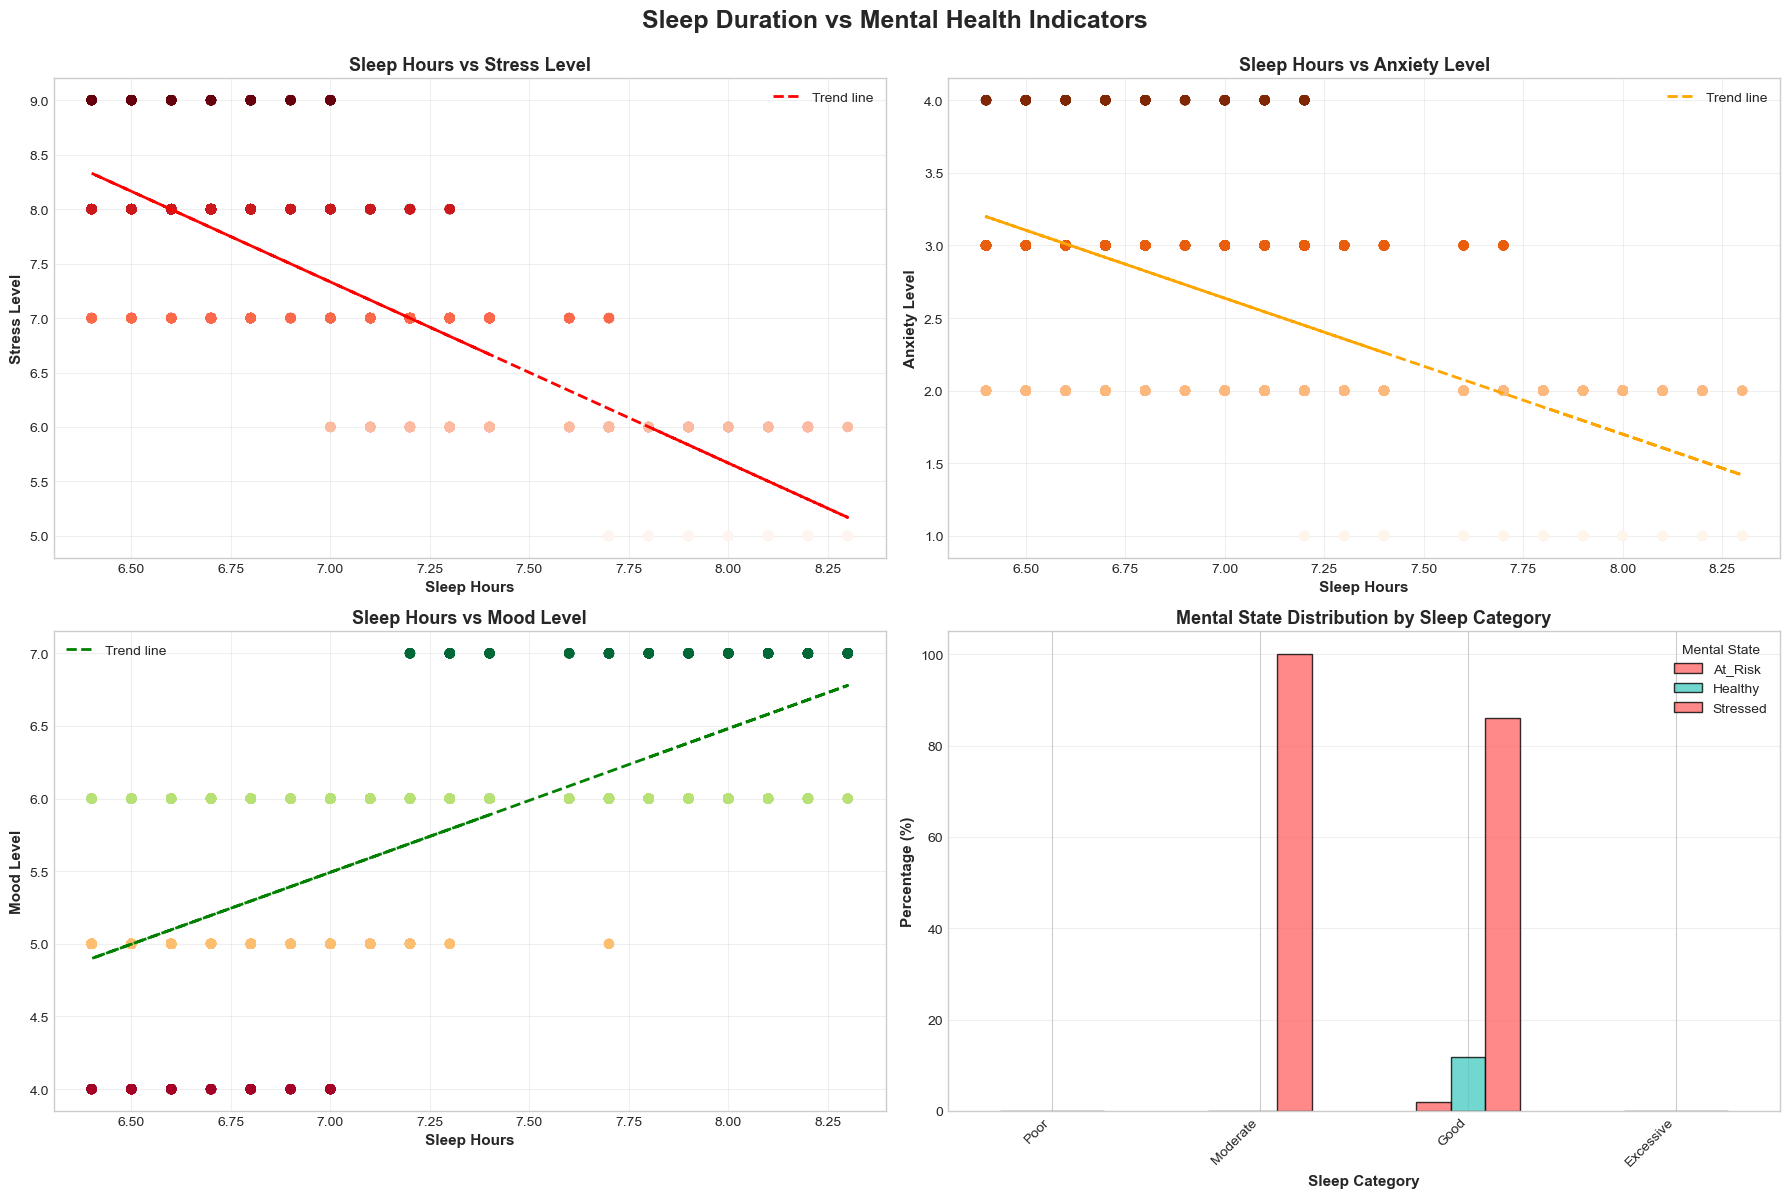

In [45]:
# Sleep Hours vs Mental Health
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Sleep Duration vs Mental Health Indicators', fontsize=18, fontweight='bold', y=0.995)

# Sleep vs Stress
axes[0, 0].scatter(New_Social['sleep_hours'], New_Social['stress_level'], 
                   alpha=0.5, c=New_Social['stress_level'], cmap='Reds', s=40)
axes[0, 0].set_xlabel('Sleep Hours', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Stress Level', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Sleep Hours vs Stress Level', fontsize=13, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Add trend line
z = np.polyfit(New_Social['sleep_hours'], New_Social['stress_level'], 1)
p = np.poly1d(z)
axes[0, 0].plot(New_Social['sleep_hours'], p(New_Social['sleep_hours']), 
                "r--", linewidth=2, label='Trend line')
axes[0, 0].legend()

# Sleep vs Anxiety
axes[0, 1].scatter(New_Social['sleep_hours'], New_Social['anxiety_level'], 
                   alpha=0.5, c=New_Social['anxiety_level'], cmap='Oranges', s=40)
axes[0, 1].set_xlabel('Sleep Hours', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Anxiety Level', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Sleep Hours vs Anxiety Level', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

z = np.polyfit(New_Social['sleep_hours'], New_Social['anxiety_level'], 1)
p = np.poly1d(z)
axes[0, 1].plot(New_Social['sleep_hours'], p(New_Social['sleep_hours']), 
                "orange", linestyle='--', linewidth=2, label='Trend line')
axes[0, 1].legend()

# Sleep vs Mood
axes[1, 0].scatter(New_Social['sleep_hours'], New_Social['mood_level'], 
                   alpha=0.5, c=New_Social['mood_level'], cmap='RdYlGn', s=40)
axes[1, 0].set_xlabel('Sleep Hours', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Mood Level', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Sleep Hours vs Mood Level', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

z = np.polyfit(New_Social['sleep_hours'], New_Social['mood_level'], 1)
p = np.poly1d(z)
axes[1, 0].plot(New_Social['sleep_hours'], p(New_Social['sleep_hours']), 
                "g--", linewidth=2, label='Trend line')
axes[1, 0].legend()

# Sleep Category vs Mental State
sleep_mental = pd.crosstab(New_Social['sleep_category'], New_Social['mental_state'], normalize='index') * 100
sleep_order = ['Poor', 'Moderate', 'Good', 'Excessive']
sleep_mental = sleep_mental.reindex(sleep_order)

sleep_mental.plot(kind='bar', ax=axes[1, 1], color=['#FF6B6B', '#4ECDC4'], 
                  edgecolor='black', alpha=0.8)
axes[1, 1].set_xlabel('Sleep Category', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Mental State Distribution by Sleep Category', fontsize=13, fontweight='bold')
axes[1, 1].legend(title='Mental State', fontsize=10)
axes[1, 1].set_xticklabels(sleep_mental.index, rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [46]:
# Calculate correlations for sleep
print("=" * 100)
print("CORRELATION: SLEEP vs MENTAL HEALTH INDICATORS")
print("=" * 100)

sleep_correlations = {
    'Sleep Hours vs Stress Level': pearsonr(New_Social['sleep_hours'], New_Social['stress_level']),
    'Sleep Hours vs Anxiety Level': pearsonr(New_Social['sleep_hours'], New_Social['anxiety_level']),
    'Sleep Hours vs Mood Level': pearsonr(New_Social['sleep_hours'], New_Social['mood_level']),
    'Sleep Hours vs Mental Health Score': pearsonr(New_Social['sleep_hours'], New_Social['mental_health_score']),
    'Sleep Hours vs Risk Score': pearsonr(New_Social['sleep_hours'], New_Social['risk_score'])
}

for relationship, (corr, p_value) in sleep_correlations.items():
    significance = "Significant ✓" if p_value < 0.05 else "Not Significant ✗"
    strength = ""
    if abs(corr) < 0.3:
        strength = "Weak"
    elif abs(corr) < 0.7:
        strength = "Moderate"
    else:
        strength = "Strong"
    
    print(f"\n{relationship}:")
    print(f"   Correlation: {corr:.4f} ({strength})")
    print(f"   P-value: {p_value:.4e}")
    print(f"   {significance} (α = 0.05)")

CORRELATION: SLEEP vs MENTAL HEALTH INDICATORS

Sleep Hours vs Stress Level:
   Correlation: -0.8345 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Sleep Hours vs Anxiety Level:
   Correlation: -0.6278 (Moderate)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Sleep Hours vs Mood Level:
   Correlation: 0.6941 (Moderate)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Sleep Hours vs Mental Health Score:
   Correlation: 0.7491 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Sleep Hours vs Risk Score:
   Correlation: -0.8021 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)


### 3.3 Social Interactions vs Mental Health

Analyzing how positive and negative interactions impact mental wellbeing.

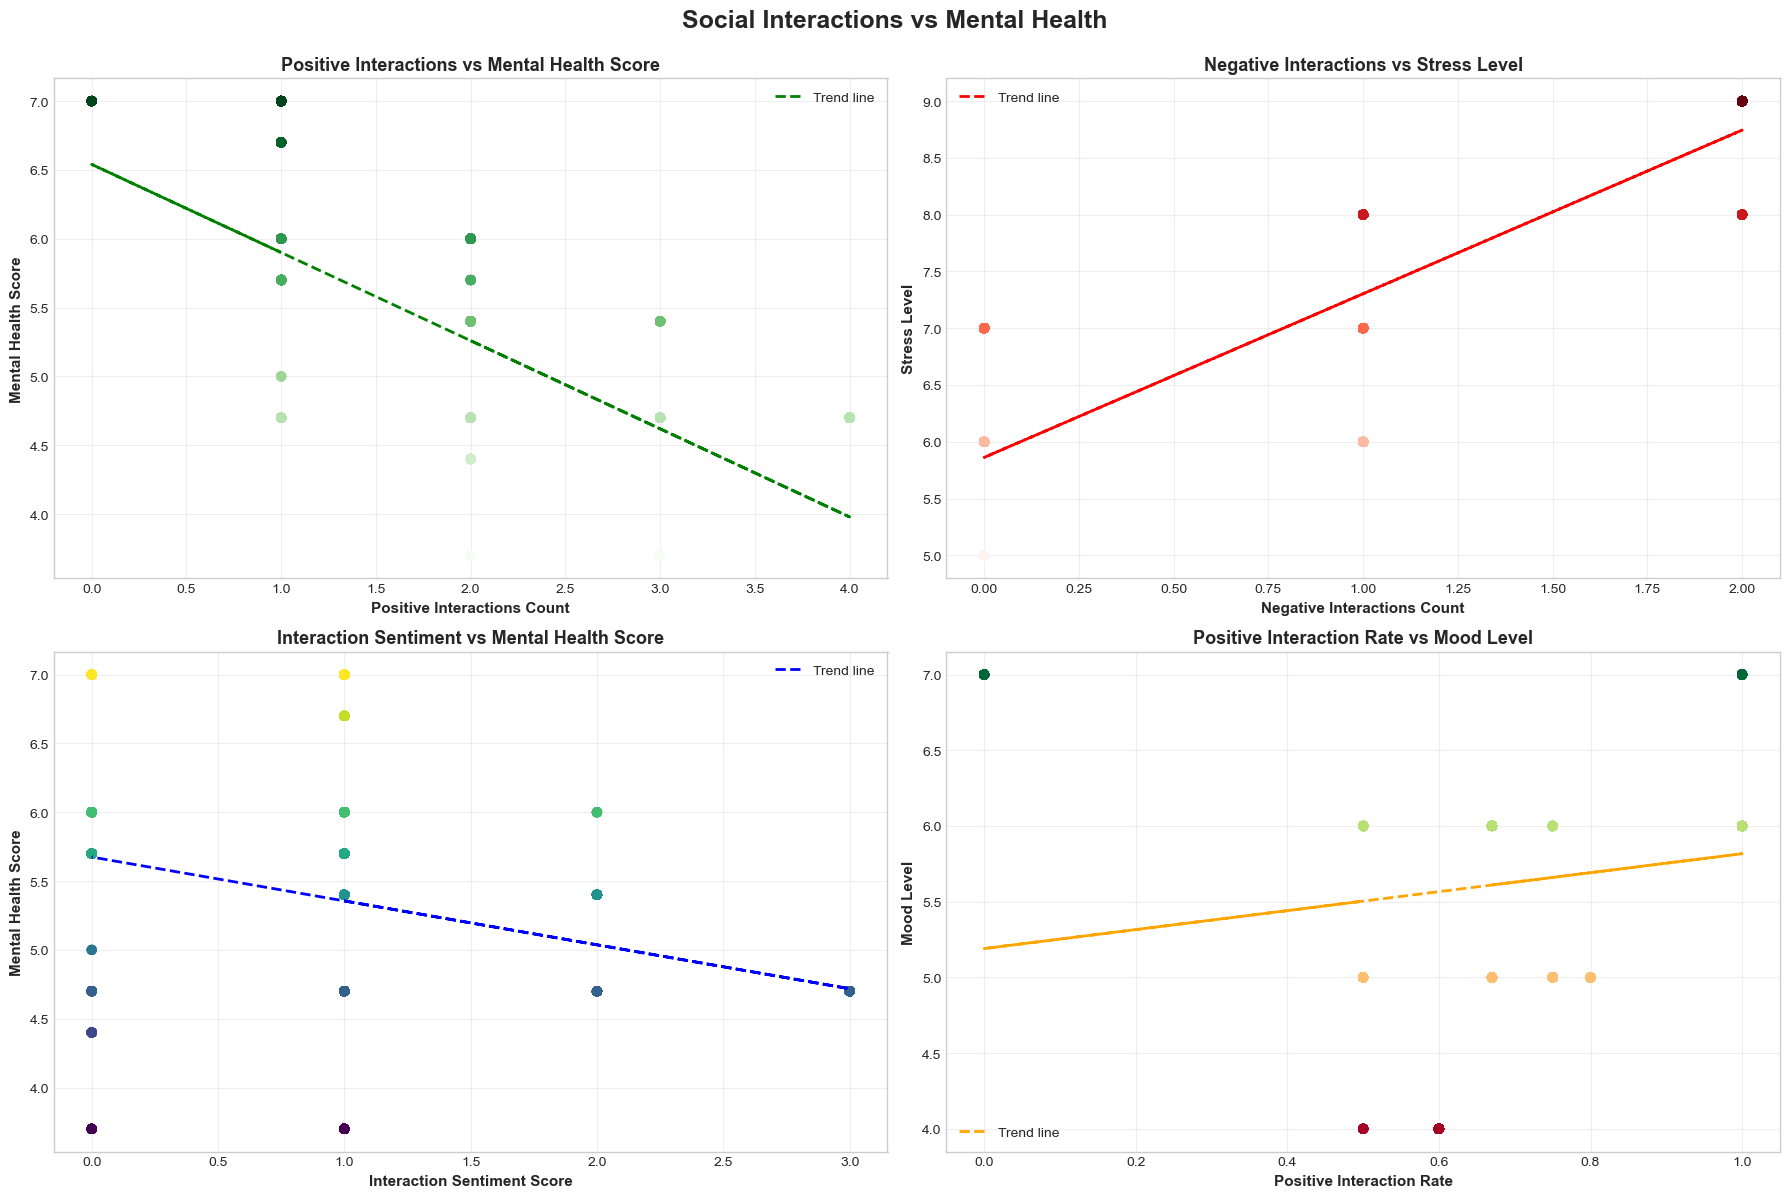

In [47]:
# Interaction Quality Analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Social Interactions vs Mental Health', fontsize=18, fontweight='bold', y=0.995)

# Positive Interactions vs Mental Health Score
axes[0, 0].scatter(New_Social['positive_interactions_count'], New_Social['mental_health_score'], 
                   alpha=0.5, c=New_Social['mental_health_score'], cmap='Greens', s=40)
axes[0, 0].set_xlabel('Positive Interactions Count', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Mental Health Score', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Positive Interactions vs Mental Health Score', fontsize=13, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

z = np.polyfit(New_Social['positive_interactions_count'], New_Social['mental_health_score'], 1)
p = np.poly1d(z)
axes[0, 0].plot(New_Social['positive_interactions_count'], 
                p(New_Social['positive_interactions_count']), 
                "g--", linewidth=2, label='Trend line')
axes[0, 0].legend()

# Negative Interactions vs Stress
axes[0, 1].scatter(New_Social['negative_interactions_count'], New_Social['stress_level'], 
                   alpha=0.5, c=New_Social['stress_level'], cmap='Reds', s=40)
axes[0, 1].set_xlabel('Negative Interactions Count', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Stress Level', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Negative Interactions vs Stress Level', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

z = np.polyfit(New_Social['negative_interactions_count'], New_Social['stress_level'], 1)
p = np.poly1d(z)
axes[0, 1].plot(New_Social['negative_interactions_count'], 
                p(New_Social['negative_interactions_count']), 
                "r--", linewidth=2, label='Trend line')
axes[0, 1].legend()

# Interaction Sentiment Score vs Mental Health Score
axes[1, 0].scatter(New_Social['interaction_sentiment_score'], New_Social['mental_health_score'], 
                   alpha=0.5, c=New_Social['mental_health_score'], cmap='viridis', s=40)
axes[1, 0].set_xlabel('Interaction Sentiment Score', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Mental Health Score', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Interaction Sentiment vs Mental Health Score', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

z = np.polyfit(New_Social['interaction_sentiment_score'], New_Social['mental_health_score'], 1)
p = np.poly1d(z)
axes[1, 0].plot(New_Social['interaction_sentiment_score'], 
                p(New_Social['interaction_sentiment_score']), 
                "b--", linewidth=2, label='Trend line')
axes[1, 0].legend()

# Positive Interaction Rate vs Mood
axes[1, 1].scatter(New_Social['positive_interaction_rate'], New_Social['mood_level'], 
                   alpha=0.5, c=New_Social['mood_level'], cmap='RdYlGn', s=40)
axes[1, 1].set_xlabel('Positive Interaction Rate', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Mood Level', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Positive Interaction Rate vs Mood Level', fontsize=13, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

z = np.polyfit(New_Social['positive_interaction_rate'], New_Social['mood_level'], 1)
p = np.poly1d(z)
axes[1, 1].plot(New_Social['positive_interaction_rate'], 
                p(New_Social['positive_interaction_rate']), 
                "orange", linestyle='--', linewidth=2, label='Trend line')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [48]:
# Calculate interaction-related correlations
print("=" * 100)
print("CORRELATION: INTERACTIONS vs MENTAL HEALTH")
print("=" * 100)

interaction_correlations = {
    'Positive Interactions vs Mental Health Score': pearsonr(New_Social['positive_interactions_count'], 
                                                              New_Social['mental_health_score']),
    'Negative Interactions vs Stress Level': pearsonr(New_Social['negative_interactions_count'], 
                                                       New_Social['stress_level']),
    'Negative Interactions vs Anxiety Level': pearsonr(New_Social['negative_interactions_count'], 
                                                        New_Social['anxiety_level']),
    'Interaction Sentiment vs Mental Health Score': pearsonr(New_Social['interaction_sentiment_score'], 
                                                              New_Social['mental_health_score']),
    'Positive Interaction Rate vs Mood Level': pearsonr(New_Social['positive_interaction_rate'], 
                                                         New_Social['mood_level'])
}

for relationship, (corr, p_value) in interaction_correlations.items():
    significance = "Significant ✓" if p_value < 0.05 else "Not Significant ✗"
    strength = ""
    if abs(corr) < 0.3:
        strength = "Weak"
    elif abs(corr) < 0.7:
        strength = "Moderate"
    else:
        strength = "Strong"
    
    print(f"\n{relationship}:")
    print(f"   Correlation: {corr:.4f} ({strength})")
    print(f"   P-value: {p_value:.4e}")
    print(f"   {significance} (α = 0.05)")

CORRELATION: INTERACTIONS vs MENTAL HEALTH

Positive Interactions vs Mental Health Score:
   Correlation: -0.7219 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Negative Interactions vs Stress Level:
   Correlation: 0.7530 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Negative Interactions vs Anxiety Level:
   Correlation: 0.8061 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Interaction Sentiment vs Mental Health Score:
   Correlation: -0.3039 (Moderate)
   P-value: 2.5571e-107
   Significant ✓ (α = 0.05)

Positive Interaction Rate vs Mood Level:
   Correlation: 0.1678 (Weak)
   P-value: 6.9282e-33
   Significant ✓ (α = 0.05)


### 3.4 Physical Activity vs Mental Health

Examining the relationship between physical activity and mental wellbeing.

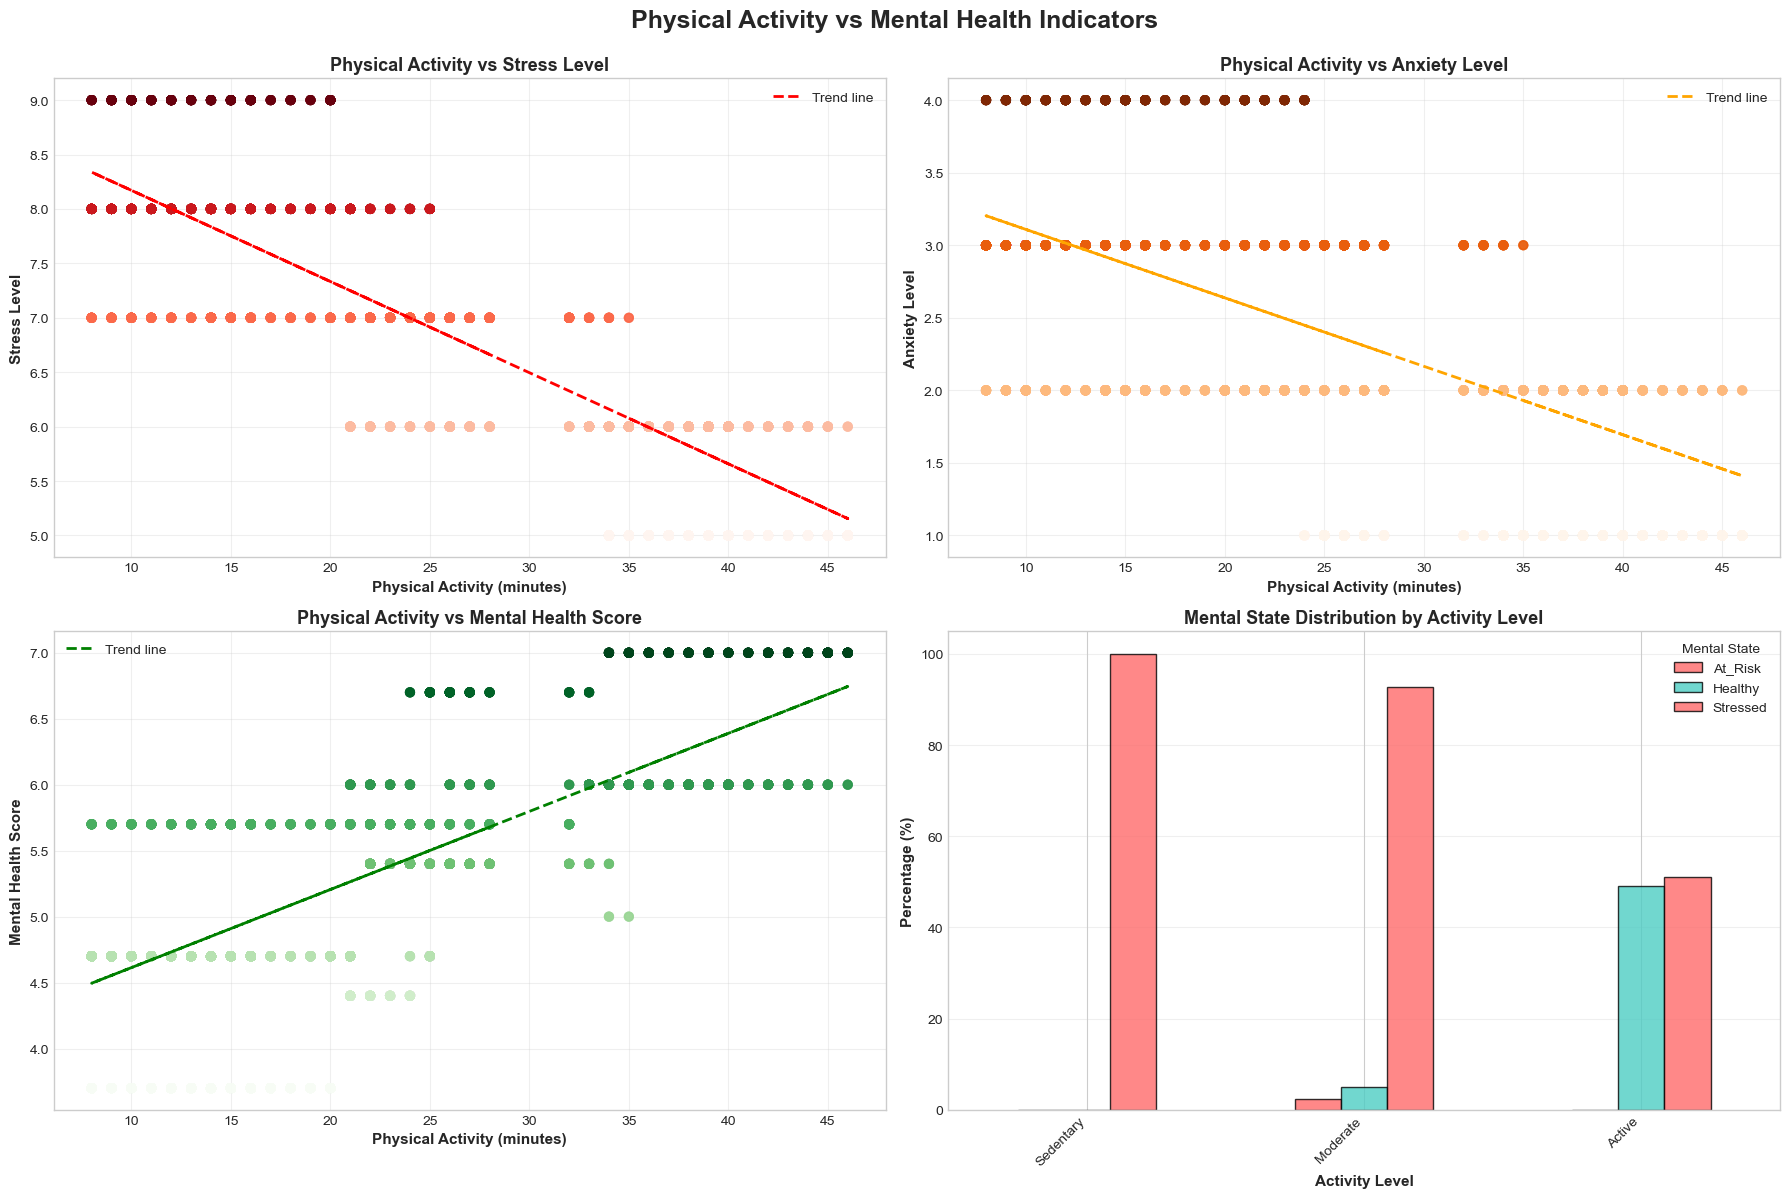

In [49]:
# Physical Activity vs Mental Health
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Physical Activity vs Mental Health Indicators', fontsize=18, fontweight='bold', y=0.995)

# Physical Activity vs Stress
axes[0, 0].scatter(New_Social['physical_activity_min'], New_Social['stress_level'], 
                   alpha=0.5, c=New_Social['stress_level'], cmap='Reds', s=40)
axes[0, 0].set_xlabel('Physical Activity (minutes)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Stress Level', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Physical Activity vs Stress Level', fontsize=13, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

z = np.polyfit(New_Social['physical_activity_min'], New_Social['stress_level'], 1)
p = np.poly1d(z)
axes[0, 0].plot(New_Social['physical_activity_min'], 
                p(New_Social['physical_activity_min']), 
                "r--", linewidth=2, label='Trend line')
axes[0, 0].legend()

# Physical Activity vs Anxiety
axes[0, 1].scatter(New_Social['physical_activity_min'], New_Social['anxiety_level'], 
                   alpha=0.5, c=New_Social['anxiety_level'], cmap='Oranges', s=40)
axes[0, 1].set_xlabel('Physical Activity (minutes)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Anxiety Level', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Physical Activity vs Anxiety Level', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

z = np.polyfit(New_Social['physical_activity_min'], New_Social['anxiety_level'], 1)
p = np.poly1d(z)
axes[0, 1].plot(New_Social['physical_activity_min'], 
                p(New_Social['physical_activity_min']), 
                "orange", linestyle='--', linewidth=2, label='Trend line')
axes[0, 1].legend()

# Physical Activity vs Mental Health Score
axes[1, 0].scatter(New_Social['physical_activity_min'], New_Social['mental_health_score'], 
                   alpha=0.5, c=New_Social['mental_health_score'], cmap='Greens', s=40)
axes[1, 0].set_xlabel('Physical Activity (minutes)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Mental Health Score', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Physical Activity vs Mental Health Score', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

z = np.polyfit(New_Social['physical_activity_min'], New_Social['mental_health_score'], 1)
p = np.poly1d(z)
axes[1, 0].plot(New_Social['physical_activity_min'], 
                p(New_Social['physical_activity_min']), 
                "g--", linewidth=2, label='Trend line')
axes[1, 0].legend()

# Activity Level vs Mental State
activity_mental = pd.crosstab(New_Social['activity_level'], New_Social['mental_state'], normalize='index') * 100
activity_order = ['Sedentary', 'Moderate', 'Active']
activity_mental = activity_mental.reindex(activity_order)

activity_mental.plot(kind='bar', ax=axes[1, 1], color=['#FF6B6B', '#4ECDC4'], 
                     edgecolor='black', alpha=0.8)
axes[1, 1].set_xlabel('Activity Level', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Mental State Distribution by Activity Level', fontsize=13, fontweight='bold')
axes[1, 1].legend(title='Mental State', fontsize=10)
axes[1, 1].set_xticklabels(activity_mental.index, rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [50]:
# Calculate activity-related correlations
print("=" * 100)
print("CORRELATION: PHYSICAL ACTIVITY vs MENTAL HEALTH")
print("=" * 100)

activity_correlations = {
    'Physical Activity vs Stress Level': pearsonr(New_Social['physical_activity_min'], New_Social['stress_level']),
    'Physical Activity vs Anxiety Level': pearsonr(New_Social['physical_activity_min'], New_Social['anxiety_level']),
    'Physical Activity vs Mood Level': pearsonr(New_Social['physical_activity_min'], New_Social['mood_level']),
    'Physical Activity vs Mental Health Score': pearsonr(New_Social['physical_activity_min'], New_Social['mental_health_score']),
    'Physical Activity vs Risk Score': pearsonr(New_Social['physical_activity_min'], New_Social['risk_score'])
}

for relationship, (corr, p_value) in activity_correlations.items():
    significance = "Significant ✓" if p_value < 0.05 else "Not Significant ✗"
    strength = ""
    if abs(corr) < 0.3:
        strength = "Weak"
    elif abs(corr) < 0.7:
        strength = "Moderate"
    else:
        strength = "Strong"
    
    print(f"\n{relationship}:")
    print(f"   Correlation: {corr:.4f} ({strength})")
    print(f"   P-value: {p_value:.4e}")
    print(f"   {significance} (α = 0.05)")

CORRELATION: PHYSICAL ACTIVITY vs MENTAL HEALTH

Physical Activity vs Stress Level:
   Correlation: -0.8359 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Physical Activity vs Anxiety Level:
   Correlation: -0.6289 (Moderate)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Physical Activity vs Mood Level:
   Correlation: 0.6948 (Moderate)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Physical Activity vs Mental Health Score:
   Correlation: 0.7502 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)

Physical Activity vs Risk Score:
   Correlation: -0.8029 (Strong)
   P-value: 0.0000e+00
   Significant ✓ (α = 0.05)


### 3.5 Bivariate Analysis Summary

Key findings from exploring relationships between variable pairs.

In [51]:
print("=" * 100)
print("KEY FINDINGS - BIVARIATE ANALYSIS")
print("=" * 100)

print("\n📊 SCREEN TIME RELATIONSHIPS:")
corr_screen_stress = pearsonr(New_Social['daily_screen_time_min'], New_Social['stress_level'])[0]
corr_social_anxiety = pearsonr(New_Social['social_media_time_min'], New_Social['anxiety_level'])[0]
print(f"   • Daily Screen Time → Stress Level: r = {corr_screen_stress:.4f}")
print(f"   • Social Media Time → Anxiety Level: r = {corr_social_anxiety:.4f}")

print("\n📊 SLEEP RELATIONSHIPS:")
corr_sleep_stress = pearsonr(New_Social['sleep_hours'], New_Social['stress_level'])[0]
corr_sleep_mh = pearsonr(New_Social['sleep_hours'], New_Social['mental_health_score'])[0]
print(f"   • Sleep Hours → Stress Level: r = {corr_sleep_stress:.4f}")
print(f"   • Sleep Hours → Mental Health Score: r = {corr_sleep_mh:.4f}")

print("\n📊 INTERACTION RELATIONSHIPS:")
corr_pos_mh = pearsonr(New_Social['positive_interactions_count'], New_Social['mental_health_score'])[0]
corr_neg_stress = pearsonr(New_Social['negative_interactions_count'], New_Social['stress_level'])[0]
print(f"   • Positive Interactions → Mental Health Score: r = {corr_pos_mh:.4f}")
print(f"   • Negative Interactions → Stress Level: r = {corr_neg_stress:.4f}")

print("\n📊 PHYSICAL ACTIVITY RELATIONSHIPS:")
corr_activity_stress = pearsonr(New_Social['physical_activity_min'], New_Social['stress_level'])[0]
corr_activity_mh = pearsonr(New_Social['physical_activity_min'], New_Social['mental_health_score'])[0]
print(f"   • Physical Activity → Stress Level: r = {corr_activity_stress:.4f}")
print(f"   • Physical Activity → Mental Health Score: r = {corr_activity_mh:.4f}")

print("\n" + "=" * 100)
print("✅ Bivariate Analysis Complete!")
print("=" * 100)

KEY FINDINGS - BIVARIATE ANALYSIS

📊 SCREEN TIME RELATIONSHIPS:
   • Daily Screen Time → Stress Level: r = 0.8360
   • Social Media Time → Anxiety Level: r = 0.8970

📊 SLEEP RELATIONSHIPS:
   • Sleep Hours → Stress Level: r = -0.8345
   • Sleep Hours → Mental Health Score: r = 0.7491

📊 INTERACTION RELATIONSHIPS:
   • Positive Interactions → Mental Health Score: r = -0.7219
   • Negative Interactions → Stress Level: r = 0.7530

📊 PHYSICAL ACTIVITY RELATIONSHIPS:
   • Physical Activity → Stress Level: r = -0.8359
   • Physical Activity → Mental Health Score: r = 0.7502

✅ Bivariate Analysis Complete!


## 4. Multivariate Analysis

Exploring complex relationships among multiple variables simultaneously to uncover deeper patterns and interactions.

### 4.1 Correlation Matrix - All Numerical Features

Understanding how all numerical variables relate to each other.

CORRELATION MATRIX - ALL NUMERICAL FEATURES


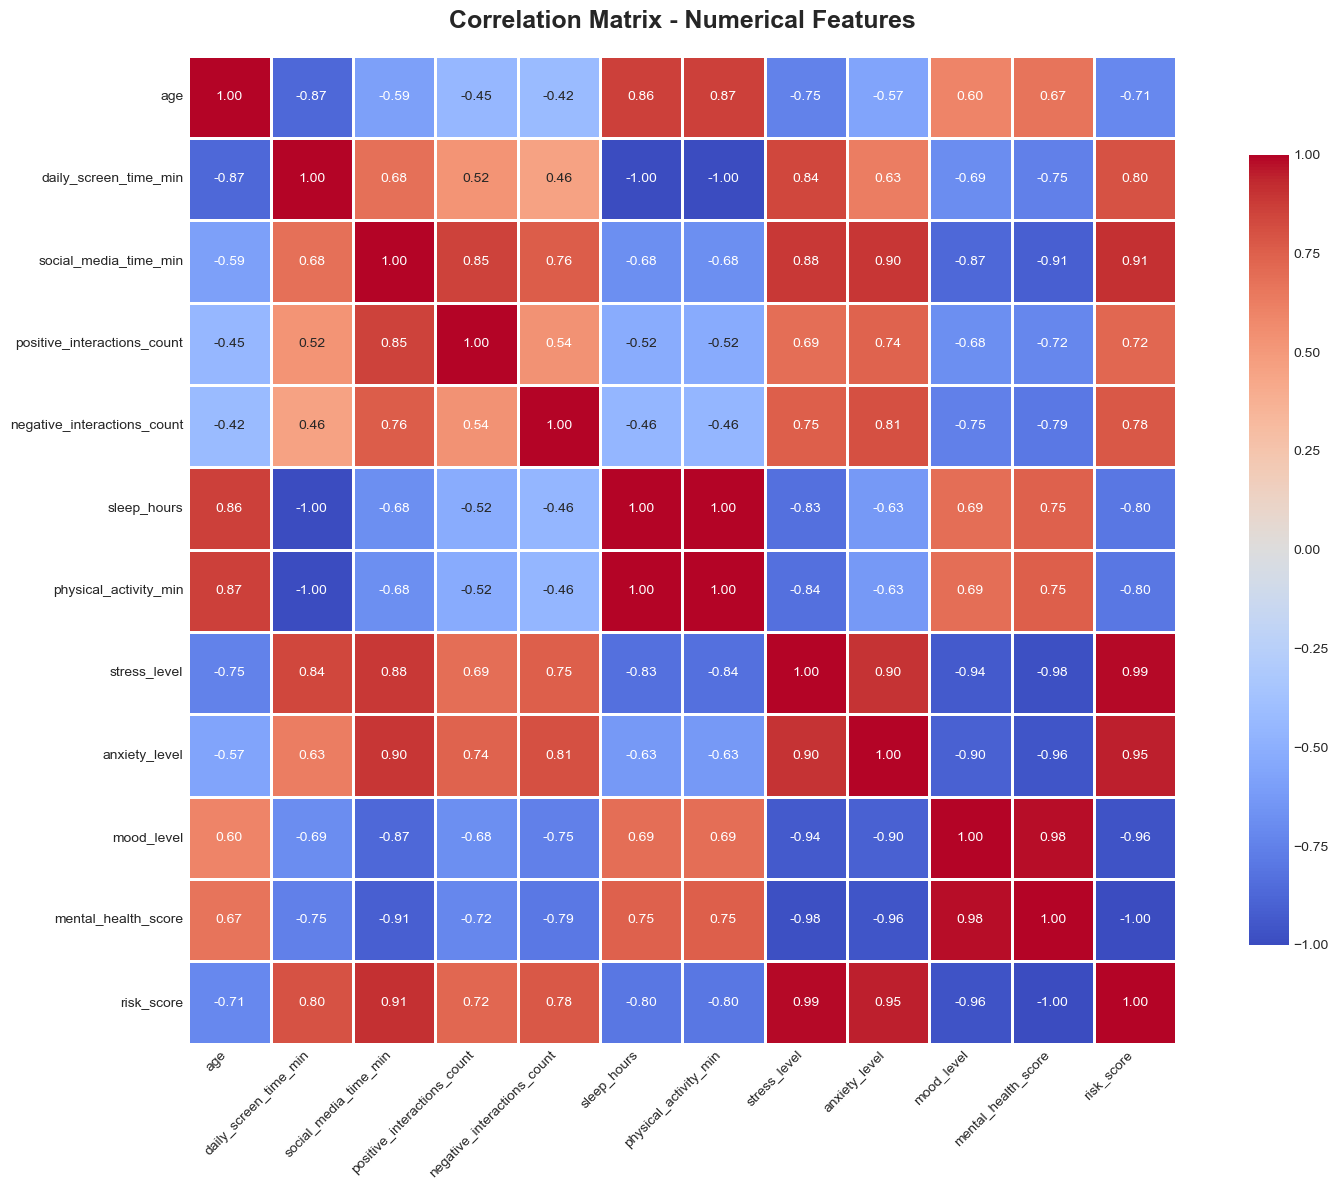

In [52]:
# Correlation matrix for all numerical features
print("=" * 100)
print("CORRELATION MATRIX - ALL NUMERICAL FEATURES")
print("=" * 100)

# Select numerical columns
numerical_features_corr = [
    'age', 'daily_screen_time_min', 'social_media_time_min',
    'positive_interactions_count', 'negative_interactions_count',
    'sleep_hours', 'physical_activity_min', 'stress_level',
    'anxiety_level', 'mood_level', 'mental_health_score', 'risk_score'
]

# Calculate correlation matrix
correlation_matrix = New_Social[numerical_features_corr].corr()

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Matrix - Numerical Features', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [53]:
# Display top positive correlations
print("\n" + "=" * 100)
print("TOP 10 POSITIVE CORRELATIONS")
print("=" * 100)

corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove self-correlations
top_positive = corr_pairs.sort_values(ascending=False).head(10)

for idx, (pair, value) in enumerate(top_positive.items(), 1):
    print(f"{idx:2d}. {pair[0]:35s} <-> {pair[1]:35s} : {value:.4f}")

# Display top negative correlations
print("\n" + "=" * 100)
print("TOP 10 NEGATIVE CORRELATIONS")
print("=" * 100)

top_negative = corr_pairs.sort_values(ascending=True).head(10)

for idx, (pair, value) in enumerate(top_negative.items(), 1):
    print(f"{idx:2d}. {pair[0]:35s} <-> {pair[1]:35s} : {value:.4f}")


TOP 10 POSITIVE CORRELATIONS
 1. physical_activity_min               <-> sleep_hours                         : 0.9981
 2. sleep_hours                         <-> physical_activity_min               : 0.9981
 3. risk_score                          <-> stress_level                        : 0.9882
 4. stress_level                        <-> risk_score                          : 0.9882
 5. mood_level                          <-> mental_health_score                 : 0.9773
 6. mental_health_score                 <-> mood_level                          : 0.9773
 7. anxiety_level                       <-> risk_score                          : 0.9470
 8. risk_score                          <-> anxiety_level                       : 0.9470
 9. social_media_time_min               <-> risk_score                          : 0.9068
10. risk_score                          <-> social_media_time_min               : 0.9068

TOP 10 NEGATIVE CORRELATIONS
 1. daily_screen_time_min               <-> physic

### 4.2 Correlation with Mental Health Score

Identifying which features have the strongest relationship with overall mental health.

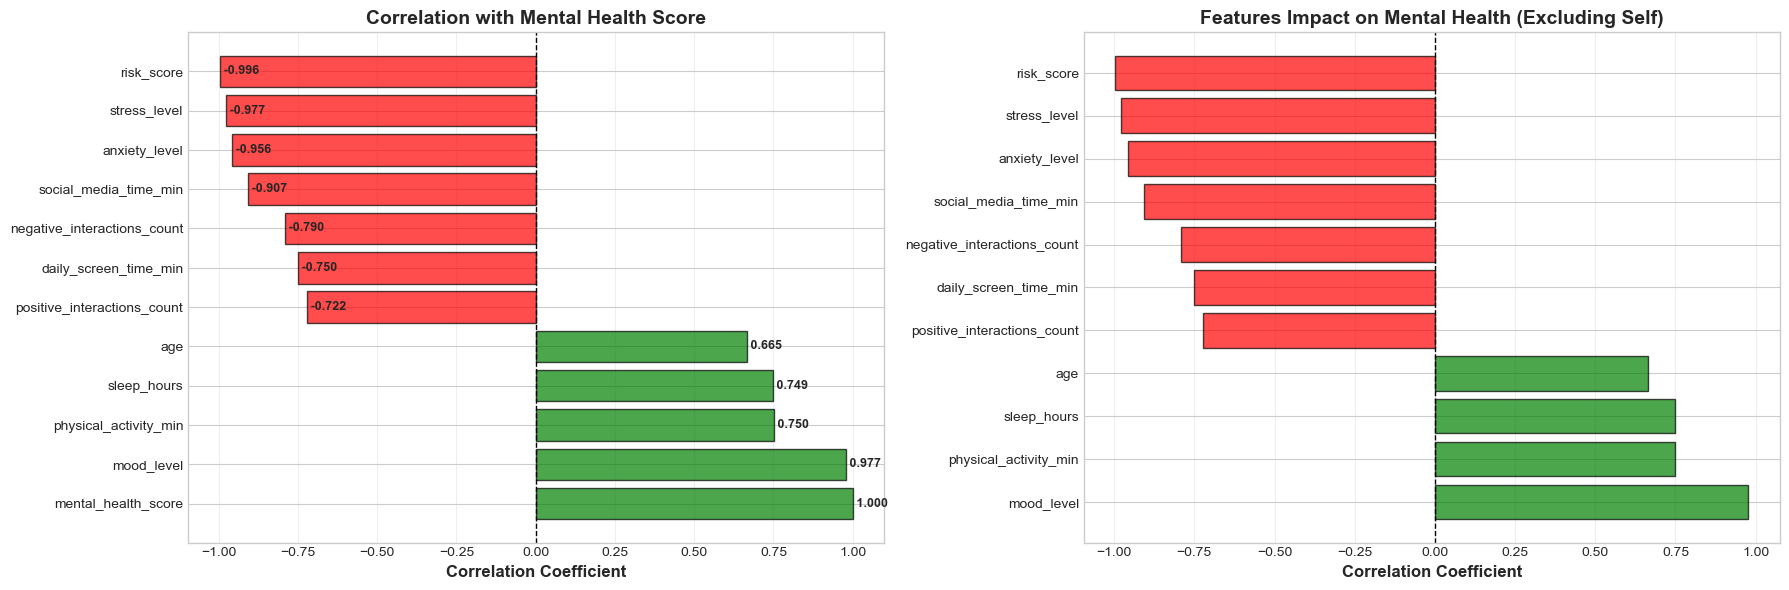


FEATURES MOST CORRELATED WITH MENTAL HEALTH SCORE
   mood_level                          :  0.9773
   physical_activity_min               :  0.7502
   sleep_hours                         :  0.7491
   age                                 :  0.6652
   positive_interactions_count         : -0.7219
   daily_screen_time_min               : -0.7503
   negative_interactions_count         : -0.7904
   social_media_time_min               : -0.9071
   anxiety_level                       : -0.9562
   stress_level                        : -0.9774
   risk_score                          : -0.9958


In [54]:
# Features correlated with Mental Health Score
mental_health_corr = correlation_matrix['mental_health_score'].sort_values(ascending=False)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot
colors_bar = ['green' if x > 0 else 'red' for x in mental_health_corr.values]
axes[0].barh(mental_health_corr.index, mental_health_corr.values, color=colors_bar, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
axes[0].set_title('Correlation with Mental Health Score', fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, val) in enumerate(mental_health_corr.items()):
    axes[0].text(val, i, f' {val:.3f}', va='center', fontsize=9, fontweight='bold')

# Horizontal bar plot (sorted)
mental_health_corr_sorted = mental_health_corr.drop('mental_health_score')
colors_sorted = ['green' if x > 0 else 'red' for x in mental_health_corr_sorted.values]
axes[1].barh(range(len(mental_health_corr_sorted)), mental_health_corr_sorted.values, 
             color=colors_sorted, alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(mental_health_corr_sorted)))
axes[1].set_yticklabels(mental_health_corr_sorted.index, fontsize=10)
axes[1].set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
axes[1].set_title('Features Impact on Mental Health (Excluding Self)', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("FEATURES MOST CORRELATED WITH MENTAL HEALTH SCORE")
print("=" * 100)
for feature, corr in mental_health_corr.items():
    if feature != 'mental_health_score':
        print(f"   {feature:35s} : {corr:7.4f}")

### 4.3 Pairplot - Key Mental Health Indicators

Visualizing relationships between key variables with distribution overlays.

In [57]:
# First, let's check what mental states we have
print("Checking mental state categories...")
print(New_Social['mental_state'].value_counts())

Checking mental state categories...
mental_state
Stressed    4601
Healthy      341
At_Risk       58
Name: count, dtype: int64



Creating pairplot for key mental health indicators...
This may take a moment...
Mental states found: ['Stressed' 'Healthy' 'At_Risk']
Using palette: {'Stressed': '#FF6B6B', 'Healthy': '#4ECDC4', 'At_Risk': '#FFA07A'}


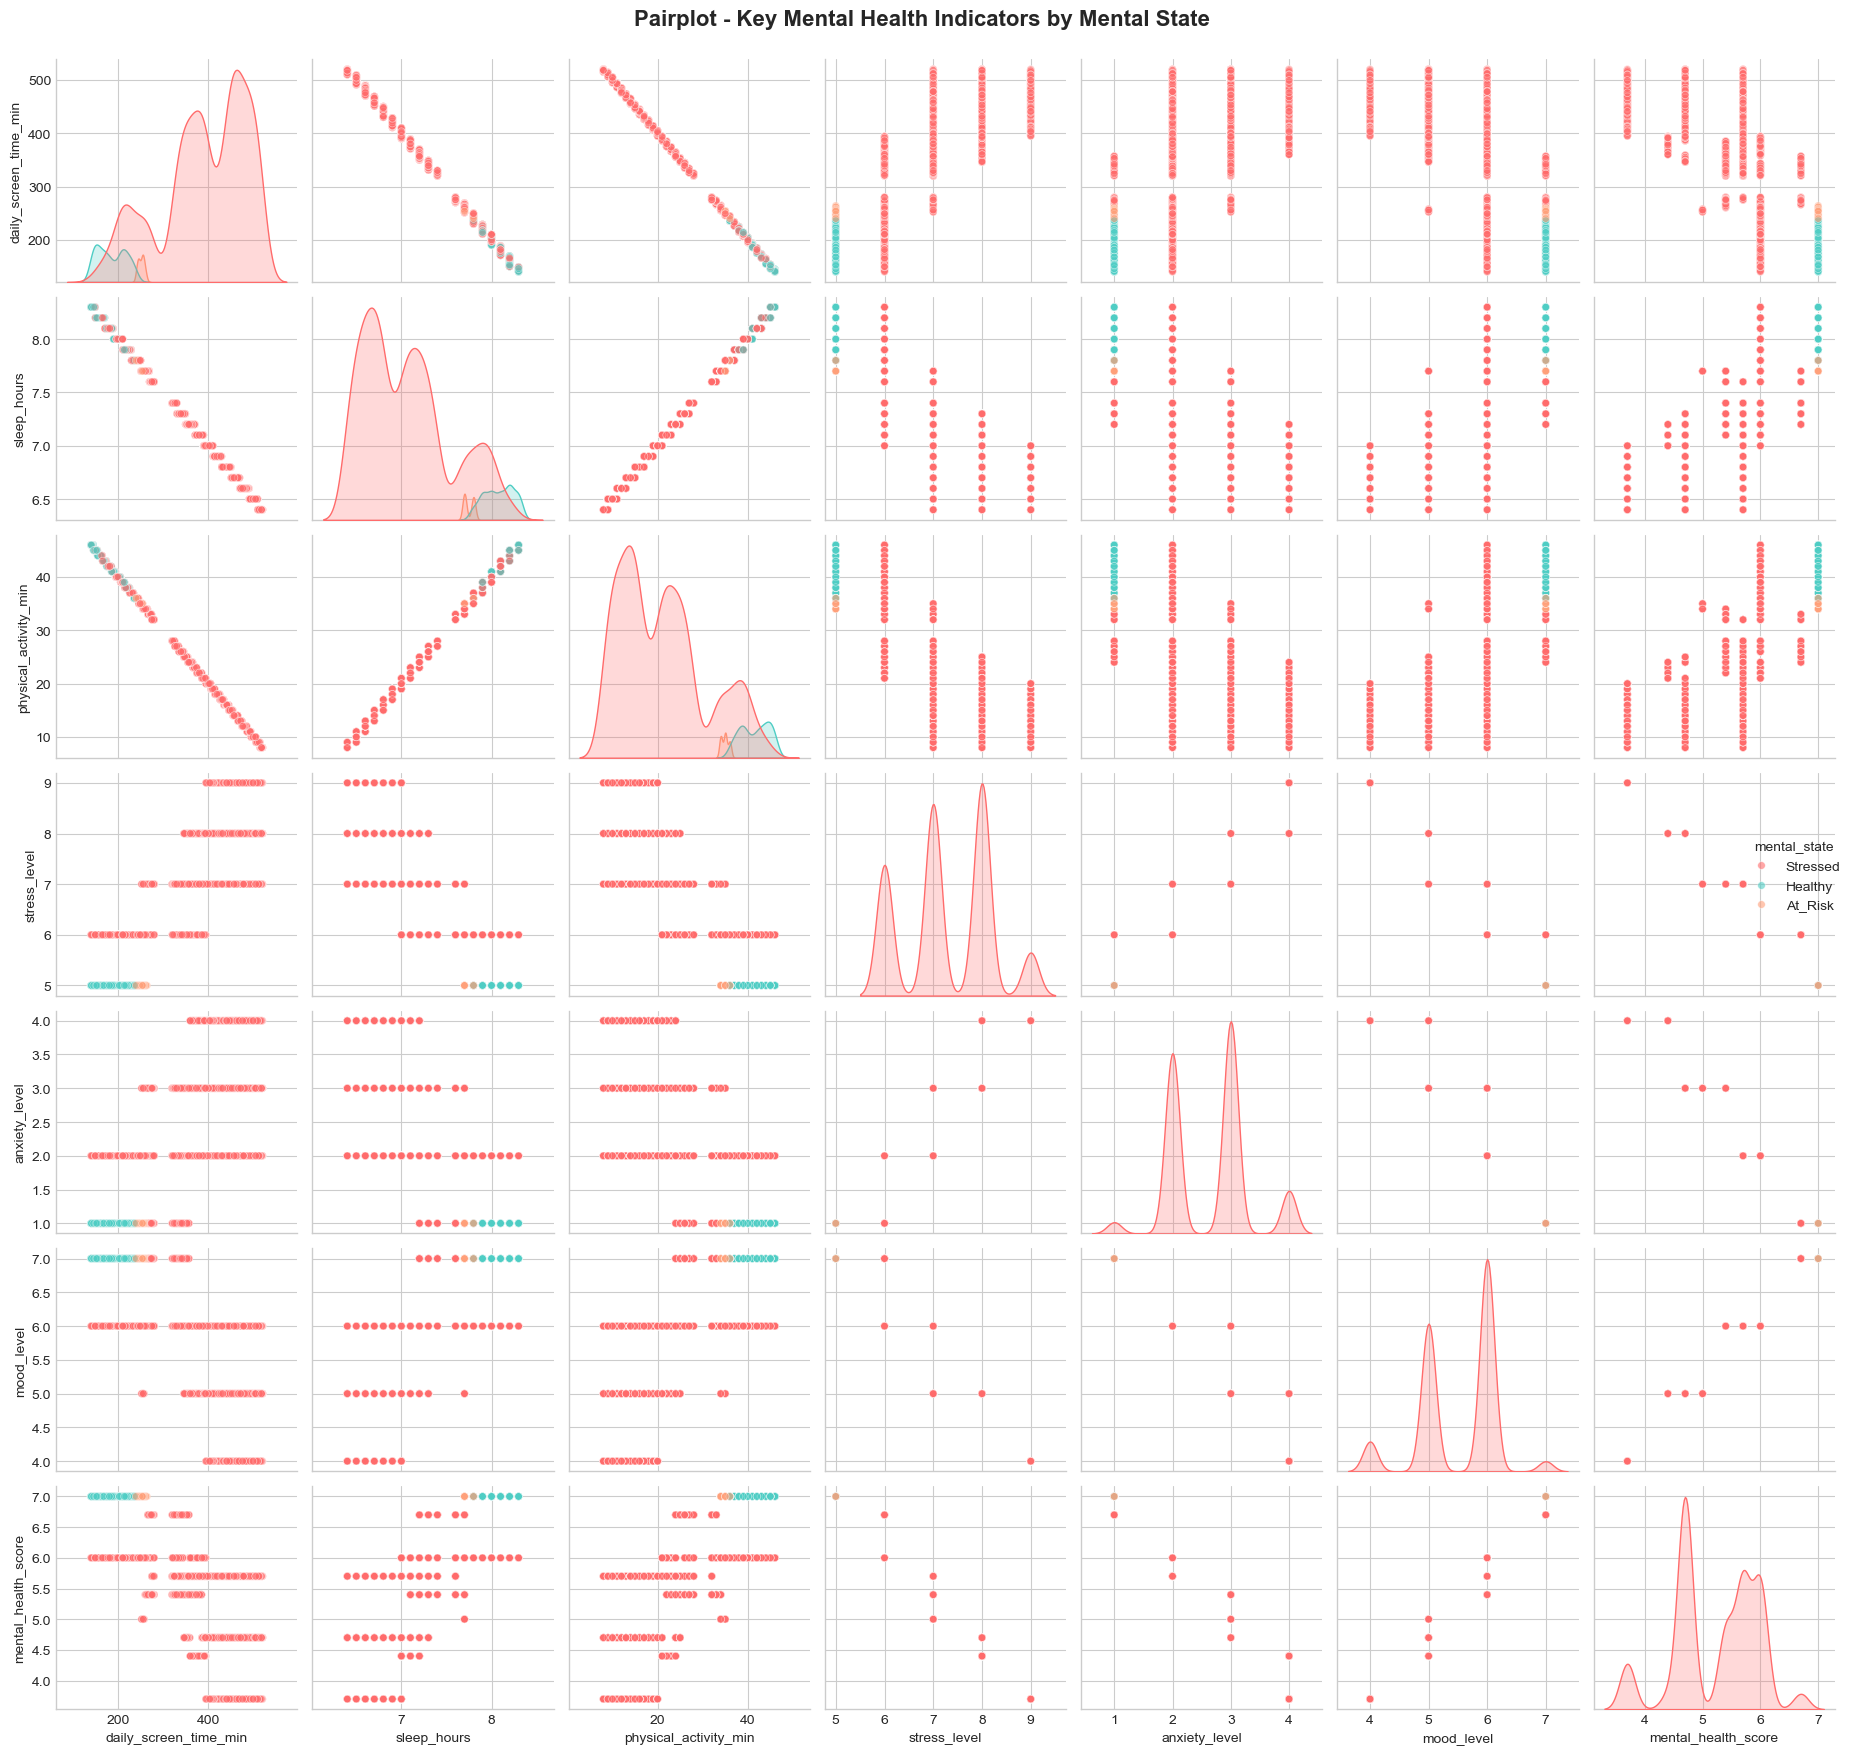


✅ Pairplot generated successfully!


In [58]:
# Pairplot for key variables with dynamic palette
print("\nCreating pairplot for key mental health indicators...")
print("This may take a moment...")

key_features = ['daily_screen_time_min', 'sleep_hours', 'physical_activity_min',
                'stress_level', 'anxiety_level', 'mood_level', 'mental_health_score']

# Get unique mental states and create a dynamic palette
unique_states = New_Social['mental_state'].unique()
color_map = {
    'Stressed': '#FF6B6B',
    'Healthy': '#4ECDC4',
    'At_Risk': '#FFA07A',
    'Moderate': '#F7DC6F',
    'Good': '#98D8C8'
}

# Create palette based on available states
palette = {state: color_map.get(state, '#95A5A6') for state in unique_states}

print(f"Mental states found: {unique_states}")
print(f"Using palette: {palette}")

# Create pairplot
pairplot = sns.pairplot(New_Social[key_features + ['mental_state']], 
                        hue='mental_state', 
                        palette=palette,
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 30},
                        height=2.5)

pairplot.fig.suptitle('Pairplot - Key Mental Health Indicators by Mental State', 
                      fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n✅ Pairplot generated successfully!")

## 5. Platform Analysis

Examining how different social media platforms affect mental health indicators.

### 5.1 Usage Statistics by Platform

In [59]:
# Platform-wise analysis
print("=" * 100)
print("PLATFORM-WISE STATISTICS")
print("=" * 100)

platform_stats = New_Social.groupby('platform').agg({
    'daily_screen_time_min': 'mean',
    'social_media_time_min': 'mean',
    'stress_level': 'mean',
    'anxiety_level': 'mean',
    'mood_level': 'mean',
    'mental_health_score': 'mean',
    'risk_score': 'mean',
    'person_name': 'count'
}).rename(columns={'person_name': 'user_count'}).round(2)

platform_stats = platform_stats.sort_values('user_count', ascending=False)

print("\n📊 Platform Statistics:")
display(platform_stats)

PLATFORM-WISE STATISTICS

📊 Platform Statistics:


daily_screen_time_min  social_media_time_min  stress_level  \
platform                                                                
Facebook                  376.72                 131.85          6.74   
TikTok                    372.82                 242.33          7.93   
YouTube                   369.95                 221.97          7.24   
WhatsApp                  382.48                  95.64          6.31   
Snapchat                  366.14                 201.38          7.20   
Instagram                 372.72                 186.36          7.24   
Twitter                   370.34                 148.13          7.10   

           anxiety_level  mood_level  mental_health_score  risk_score  \
platform                                                                
Facebook            2.06        5.94                 5.73        3.31   
TikTok              3.41        4.85                 4.54        4.17   
YouTube             2.73        5.52                 5.21        3.68   
WhatsApp            1.64        6.36                 6.16        3.00   
Snapchat            2.70        5.54                 5.24        3.65   
Instagram           2.68        5.52                 5.23        3.67   
Twitter             2.35        5.65                 5.43        3.52   

           user_count  
platform               
Facebook          744  
TikTok            723  
YouTube           716  
WhatsApp          710  
Snapchat          705  
Instagram         703  
Twitter           699

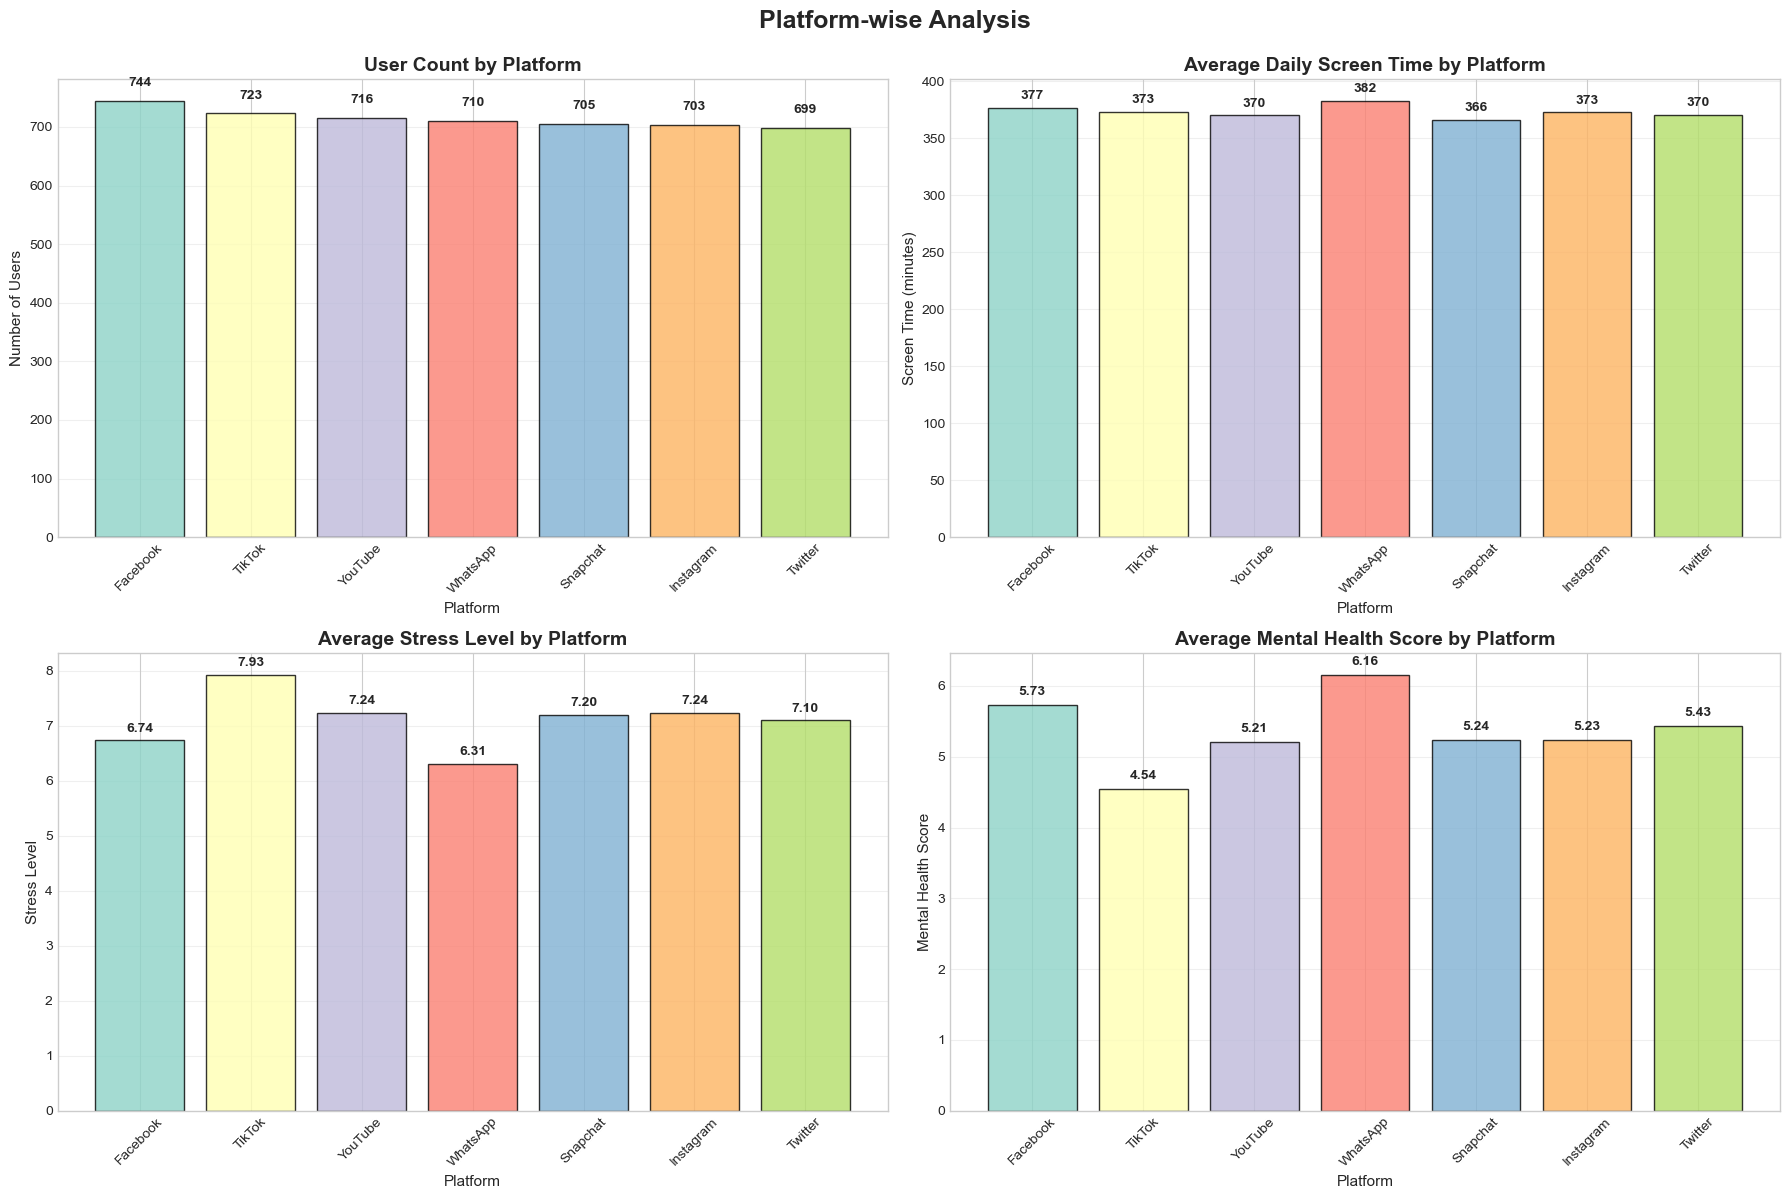

In [60]:
# Visualize platform statistics
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Platform-wise Analysis', fontsize=18, fontweight='bold', y=0.995)

platforms = platform_stats.index
user_counts = platform_stats['user_count']
colors_platform = sns.color_palette('Set3', len(platforms))

# User count by platform
axes[0, 0].bar(platforms, user_counts, color=colors_platform, edgecolor='black', alpha=0.8)
axes[0, 0].set_title('User Count by Platform', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Platform', fontsize=11)
axes[0, 0].set_ylabel('Number of Users', fontsize=11)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(user_counts):
    axes[0, 0].text(i, v + 20, str(int(v)), ha='center', va='bottom', fontweight='bold')

# Average screen time by platform
axes[0, 1].bar(platforms, platform_stats['daily_screen_time_min'], 
               color=colors_platform, edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Average Daily Screen Time by Platform', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Platform', fontsize=11)
axes[0, 1].set_ylabel('Screen Time (minutes)', fontsize=11)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(platform_stats['daily_screen_time_min']):
    axes[0, 1].text(i, v + 5, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

# Stress level by platform
axes[1, 0].bar(platforms, platform_stats['stress_level'], 
               color=colors_platform, edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Average Stress Level by Platform', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Platform', fontsize=11)
axes[1, 0].set_ylabel('Stress Level', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(platform_stats['stress_level']):
    axes[1, 0].text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Mental Health Score by platform
axes[1, 1].bar(platforms, platform_stats['mental_health_score'], 
               color=colors_platform, edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Average Mental Health Score by Platform', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Platform', fontsize=11)
axes[1, 1].set_ylabel('Mental Health Score', fontsize=11)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(platform_stats['mental_health_score']):
    axes[1, 1].text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 5.2 Mental State Distribution by Platform

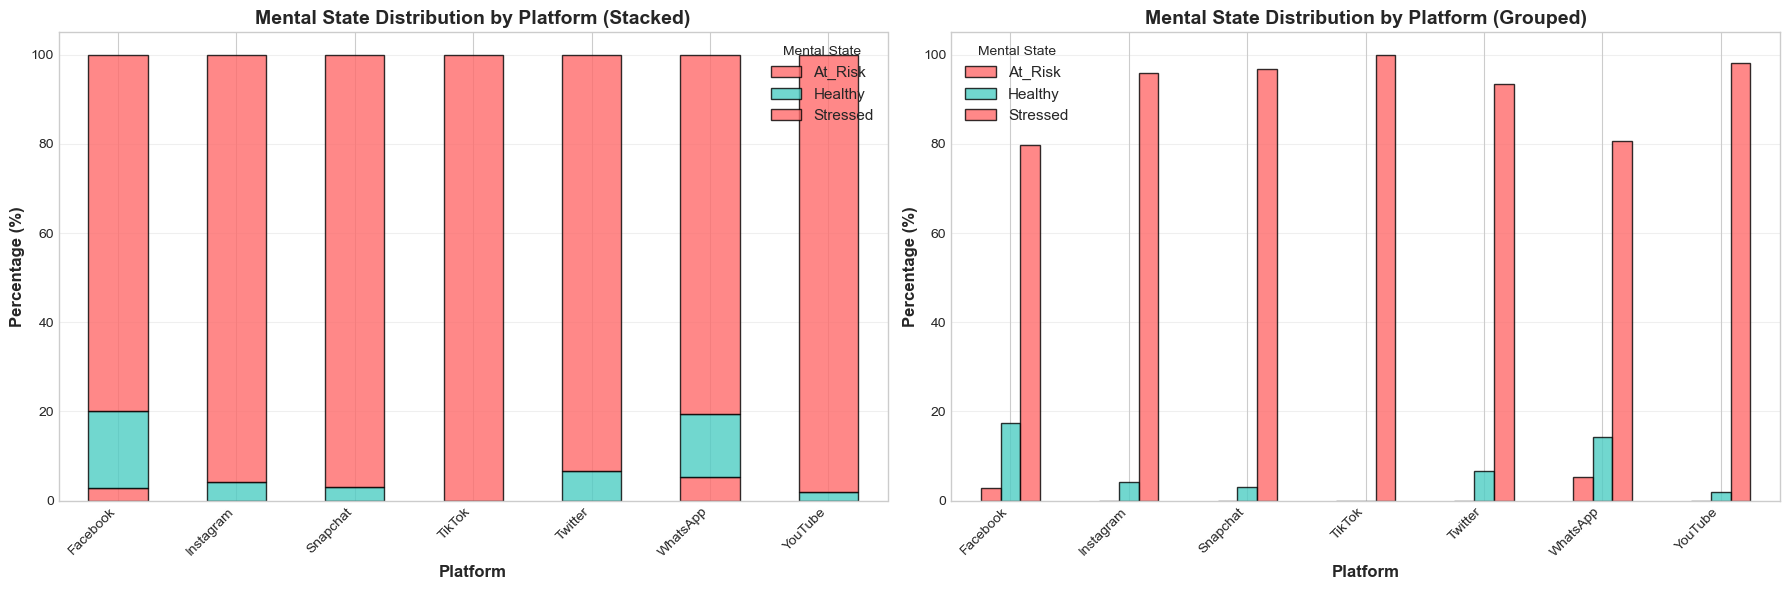

MENTAL STATE DISTRIBUTION BY PLATFORM (%)
mental_state  At_Risk  Healthy  Stressed
platform                                
Facebook         2.82    17.34     79.84
Instagram        0.00     4.13     95.87
Snapchat         0.00     3.12     96.88
TikTok           0.00     0.00    100.00
Twitter          0.00     6.58     93.42
WhatsApp         5.21    14.23     80.56
YouTube          0.00     1.96     98.04


In [61]:
# Mental state distribution by platform
platform_mental = pd.crosstab(New_Social['platform'], New_Social['mental_state'], normalize='index') * 100

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Stacked bar chart
platform_mental.plot(kind='bar', stacked=True, ax=axes[0], 
                     color=['#FF6B6B', '#4ECDC4'], 
                     edgecolor='black', alpha=0.8)
axes[0].set_title('Mental State Distribution by Platform (Stacked)', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Platform', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[0].legend(title='Mental State', fontsize=11)
axes[0].set_xticklabels(platform_mental.index, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Grouped bar chart
platform_mental.plot(kind='bar', ax=axes[1], 
                     color=['#FF6B6B', '#4ECDC4'], 
                     edgecolor='black', alpha=0.8)
axes[1].set_title('Mental State Distribution by Platform (Grouped)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Platform', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[1].legend(title='Mental State', fontsize=11)
axes[1].set_xticklabels(platform_mental.index, rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("=" * 100)
print("MENTAL STATE DISTRIBUTION BY PLATFORM (%)")
print("=" * 100)
print(platform_mental.round(2))

### 5.3 Platform Comparison - Multiple Metrics

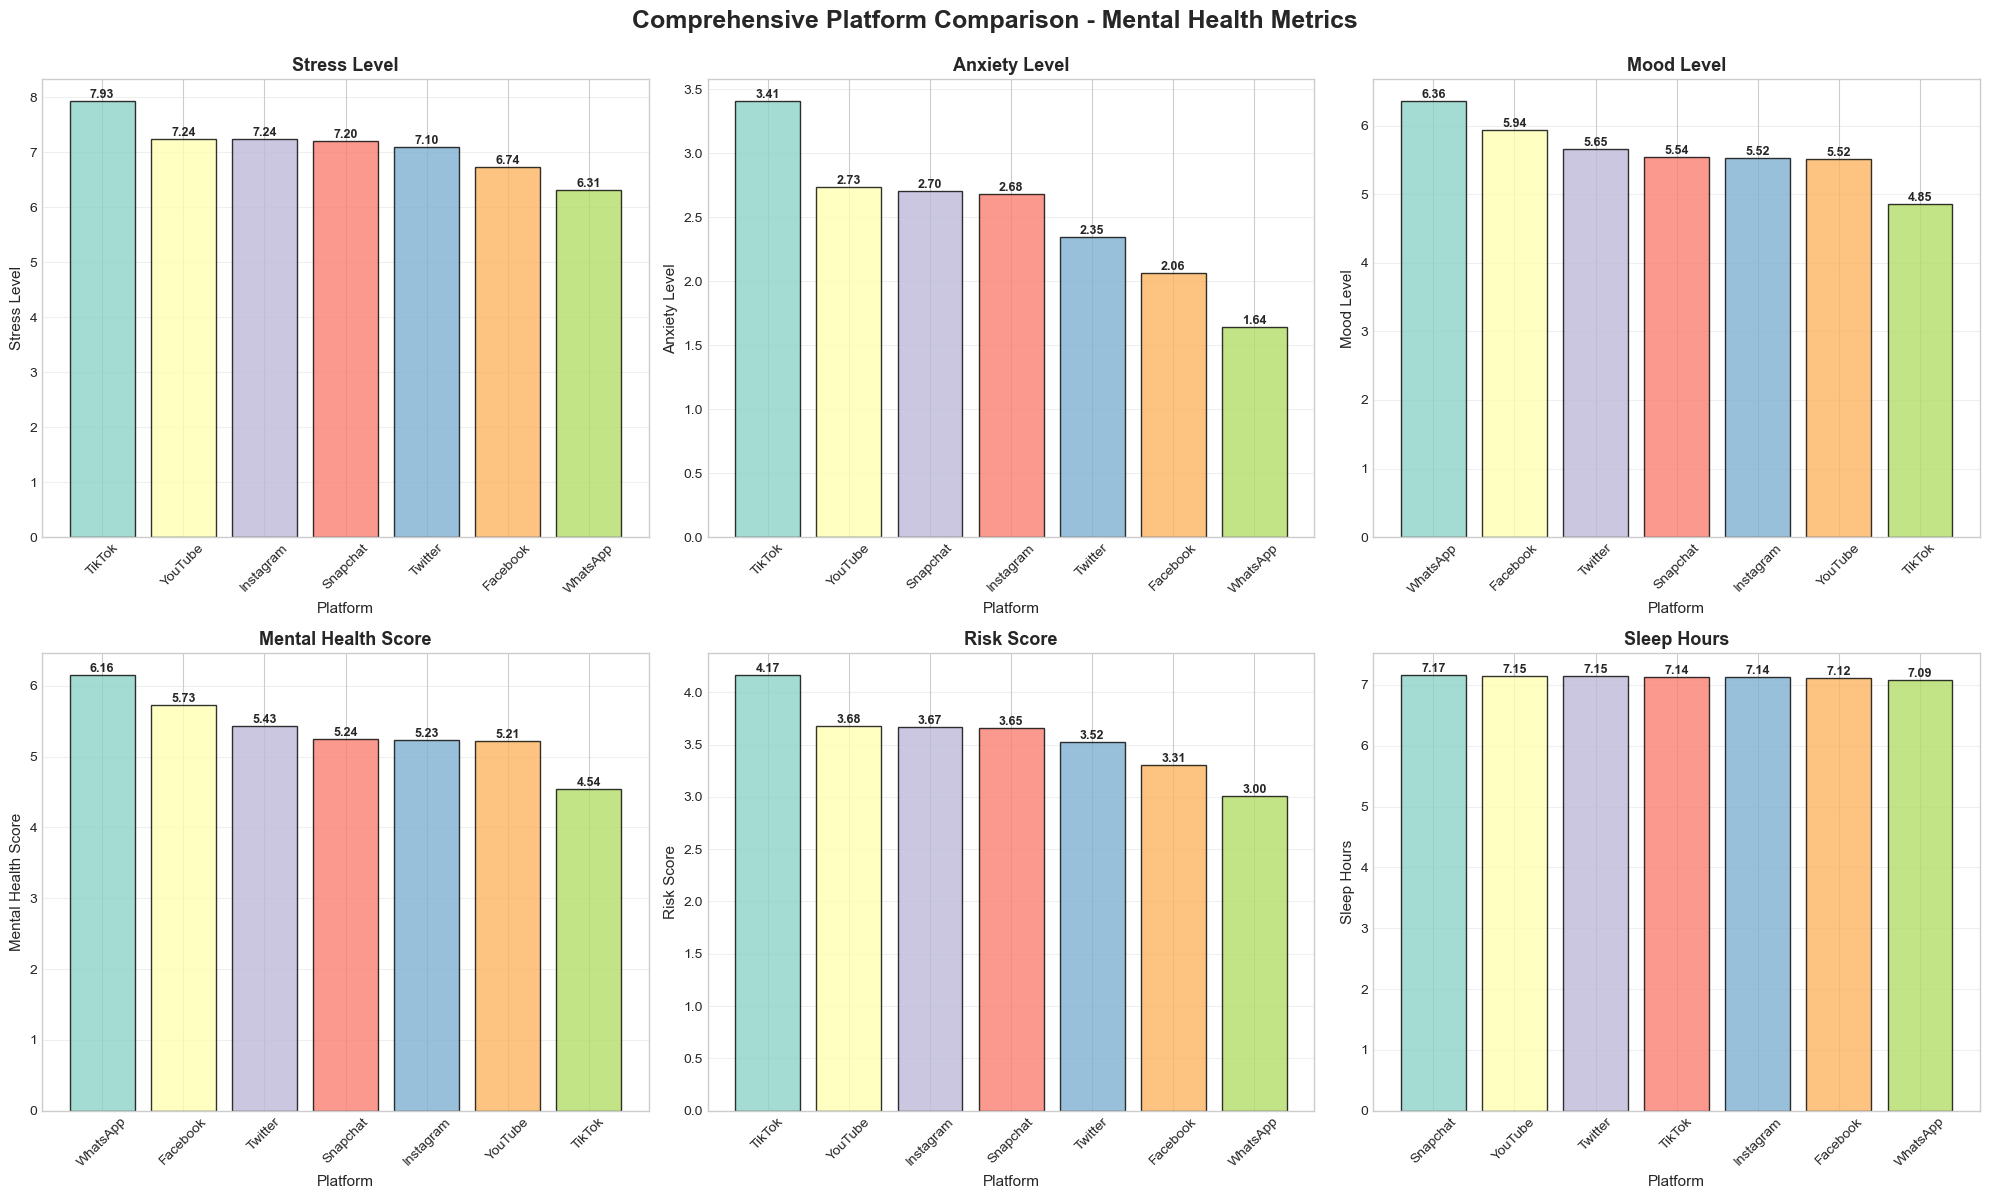

In [62]:
# Comprehensive platform comparison
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Comprehensive Platform Comparison - Mental Health Metrics', 
             fontsize=18, fontweight='bold', y=0.995)

metrics = ['stress_level', 'anxiety_level', 'mood_level', 
           'mental_health_score', 'risk_score', 'sleep_hours']
titles = ['Stress Level', 'Anxiety Level', 'Mood Level', 
          'Mental Health Score', 'Risk Score', 'Sleep Hours']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    row = idx // 3
    col = idx % 3
    
    platform_metric = New_Social.groupby('platform')[metric].mean().sort_values(ascending=False)
    
    bars = axes[row, col].bar(platform_metric.index, platform_metric.values, 
                               color=colors_platform, edgecolor='black', alpha=0.8)
    axes[row, col].set_title(title, fontsize=13, fontweight='bold')
    axes[row, col].set_xlabel('Platform', fontsize=11)
    axes[row, col].set_ylabel(title, fontsize=11)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                            f'{height:.2f}',
                            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.4 Platform Statistical Testing (ANOVA)

Testing if there are significant differences in mental health indicators across platforms.

In [63]:
# ANOVA test for platform differences
print("=" * 100)
print("ANOVA TEST - PLATFORM DIFFERENCES")
print("=" * 100)

platforms = New_Social['platform'].unique()
mental_health_metrics = ['stress_level', 'anxiety_level', 'mood_level', 
                         'mental_health_score', 'risk_score', 'daily_screen_time_min']

print("\nTesting if platforms have significantly different metrics:\n")
print(f"{'Metric':<35} | {'F-statistic':>12} | {'P-value':>12} | {'Result':>20}")
print("-" * 85)

for metric in mental_health_metrics:
    # Prepare data for each platform
    groups = [New_Social[New_Social['platform'] == platform][metric].values 
              for platform in platforms]
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(*groups)
    
    significance = "Significant ✓" if p_value < 0.05 else "Not Significant ✗"
    
    print(f"{metric.replace('_', ' ').title():<35} | {f_stat:12.4f} | {p_value:12.4e} | {significance:>20}")

print("\n" + "=" * 100)
print("Note: Significant results (p < 0.05) indicate meaningful differences across platforms.")
print("=" * 100)

ANOVA TEST - PLATFORM DIFFERENCES

Testing if platforms have significantly different metrics:

Metric                              |  F-statistic |      P-value |               Result
-------------------------------------------------------------------------------------
Stress Level                        |     196.1945 |  3.4679e-225 |        Significant ✓
Anxiety Level                       |     633.7745 |   0.0000e+00 |        Significant ✓
Mood Level                          |     380.3868 |   0.0000e+00 |        Significant ✓
Mental Health Score                 |     372.2887 |   0.0000e+00 |        Significant ✓
Risk Score                          |     280.0114 |  6.7304e-310 |        Significant ✓
Daily Screen Time Min               |       1.7662 |   1.0190e-01 |    Not Significant ✗

Note: Significant results (p < 0.05) indicate meaningful differences across platforms.


## 6. Demographic Analysis

Analyzing mental health patterns across different demographic groups.

### 6.1 Age Group Analysis

In [64]:
# Age group analysis
print("=" * 100)
print("AGE GROUP STATISTICS")
print("=" * 100)

age_stats = New_Social.groupby('age_group').agg({
    'stress_level': 'mean',
    'anxiety_level': 'mean',
    'mood_level': 'mean',
    'mental_health_score': 'mean',
    'risk_score': 'mean',
    'daily_screen_time_min': 'mean',
    'sleep_hours': 'mean',
    'person_name': 'count'
}).rename(columns={'person_name': 'user_count'}).round(2)

# Reorder age groups
age_order = ['Teen', 'Young Adult', 'Adult', 'Senior']
age_stats = age_stats.reindex(age_order)

print("\n📊 Age Group Statistics:")
display(age_stats)

AGE GROUP STATISTICS

📊 Age Group Statistics:


stress_level  anxiety_level  mood_level  mental_health_score  \
age_group                                                                   
Teen                 7.80           2.85        5.19                 4.88   
Young Adult          7.50           2.76        5.45                 5.10   
Adult                5.81           1.76        6.28                 6.24   
Senior               5.50           1.50        6.50                 6.50   

             risk_score  daily_screen_time_min  sleep_hours  user_count  
age_group                                                                
Teen               3.97                 438.98         6.80         865  
Young Adult        3.80                 421.39         6.89        2885  
Adult              2.81                 227.08         7.87         958  
Senior             2.59                 179.21         8.10         292

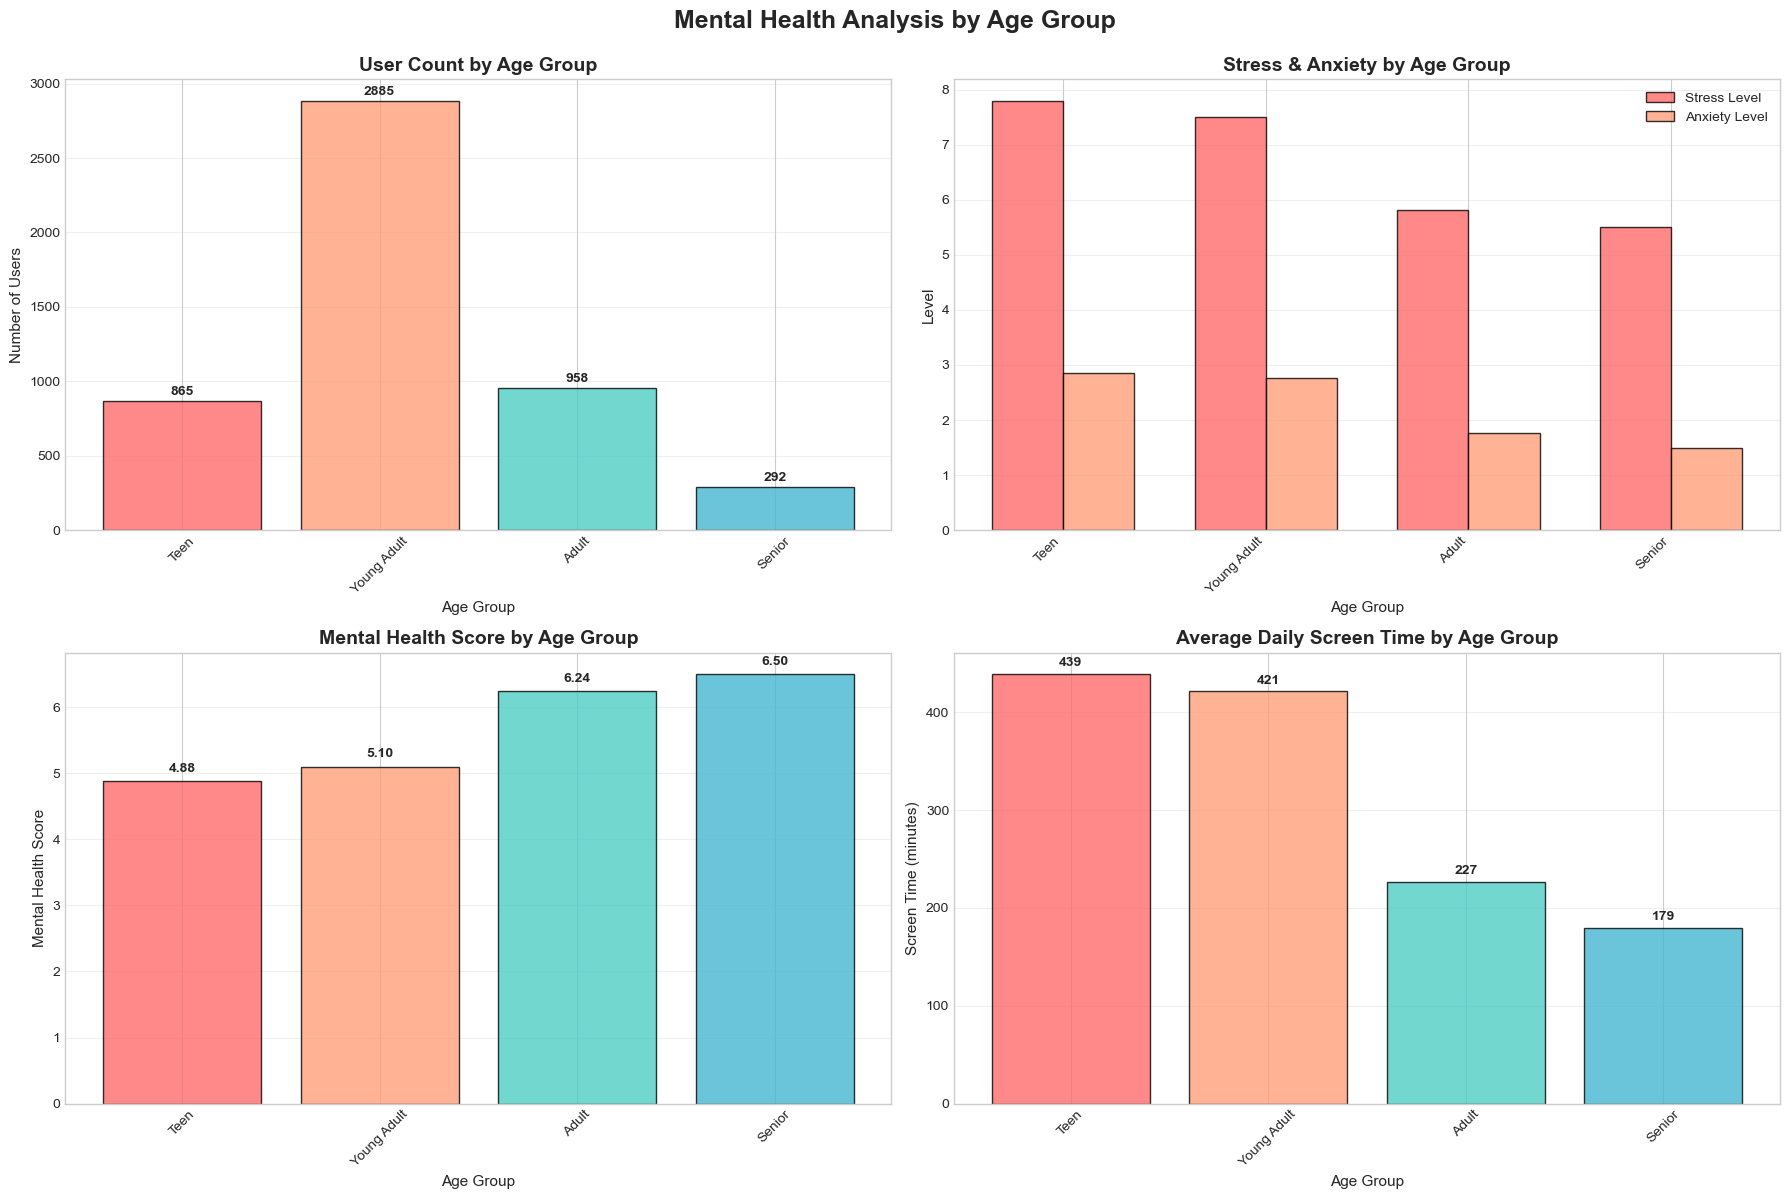

In [65]:
# Visualize age group analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Mental Health Analysis by Age Group', fontsize=18, fontweight='bold', y=0.995)

age_groups = age_stats.index
colors_age = ['#FF6B6B', '#FFA07A', '#4ECDC4', '#45B7D1']

# User count by age group
axes[0, 0].bar(age_groups, age_stats['user_count'], color=colors_age, 
               edgecolor='black', alpha=0.8)
axes[0, 0].set_title('User Count by Age Group', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age Group', fontsize=11)
axes[0, 0].set_ylabel('Number of Users', fontsize=11)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(age_stats['user_count']):
    axes[0, 0].text(i, v + 20, str(int(v)), ha='center', va='bottom', fontweight='bold')

# Stress and Anxiety by age group
x_pos = np.arange(len(age_groups))
width = 0.35

bars1 = axes[0, 1].bar(x_pos - width/2, age_stats['stress_level'], width, 
                        label='Stress Level', color='#FF6B6B', edgecolor='black', alpha=0.8)
bars2 = axes[0, 1].bar(x_pos + width/2, age_stats['anxiety_level'], width, 
                        label='Anxiety Level', color='#FFA07A', edgecolor='black', alpha=0.8)

axes[0, 1].set_title('Stress & Anxiety by Age Group', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age Group', fontsize=11)
axes[0, 1].set_ylabel('Level', fontsize=11)
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(age_groups, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Mental Health Score by age group
axes[1, 0].bar(age_groups, age_stats['mental_health_score'], color=colors_age, 
               edgecolor='black', alpha=0.8)
axes[1, 0].set_title('Mental Health Score by Age Group', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Age Group', fontsize=11)
axes[1, 0].set_ylabel('Mental Health Score', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(age_stats['mental_health_score']):
    axes[1, 0].text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Screen time by age group
axes[1, 1].bar(age_groups, age_stats['daily_screen_time_min'], color=colors_age, 
               edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Average Daily Screen Time by Age Group', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Age Group', fontsize=11)
axes[1, 1].set_ylabel('Screen Time (minutes)', fontsize=11)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(age_stats['daily_screen_time_min']):
    axes[1, 1].text(i, v + 5, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 6.2 Gender Analysis

In [66]:
# Gender analysis
print("=" * 100)
print("GENDER STATISTICS")
print("=" * 100)

gender_stats = New_Social.groupby('gender').agg({
    'stress_level': 'mean',
    'anxiety_level': 'mean',
    'mood_level': 'mean',
    'mental_health_score': 'mean',
    'risk_score': 'mean',
    'daily_screen_time_min': 'mean',
    'sleep_hours': 'mean',
    'person_name': 'count'
}).rename(columns={'person_name': 'user_count'}).round(2)

print("\n📊 Gender Statistics:")
display(gender_stats)

GENDER STATISTICS

📊 Gender Statistics:


stress_level  anxiety_level  mood_level  mental_health_score  \
gender                                                                 
Female          7.10           2.51        5.63                 5.37   
Male            7.12           2.51        5.62                 5.36   
Other           7.06           2.49        5.67                 5.40   

        risk_score  daily_screen_time_min  sleep_hours  user_count  
gender                                                              
Female        3.57                 373.63         7.13        2474  
Male          3.58                 372.64         7.14        2427  
Other         3.55                 368.98         7.15          99

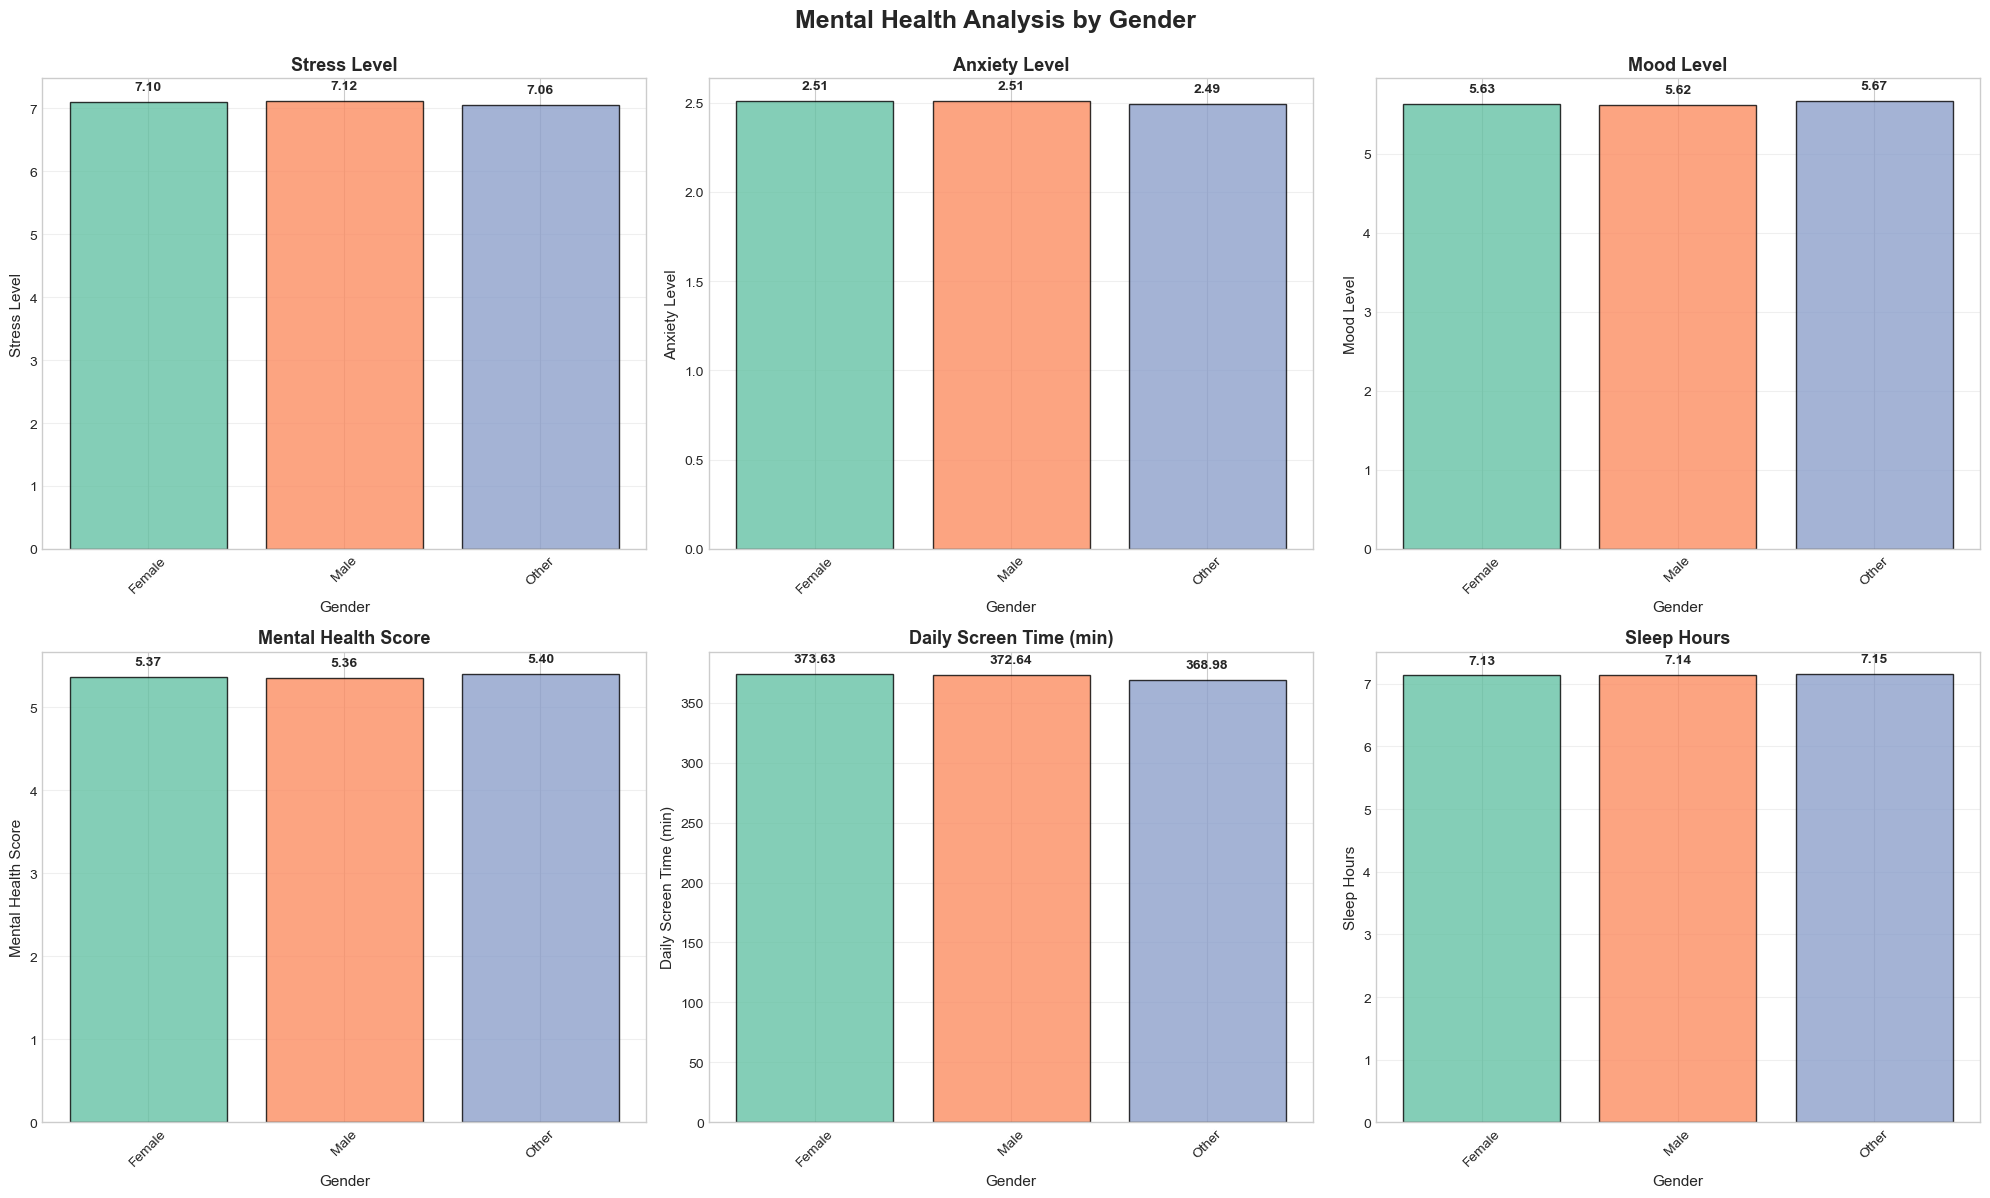

In [67]:
# Visualize gender analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Mental Health Analysis by Gender', fontsize=18, fontweight='bold', y=0.995)

genders = gender_stats.index
colors_gender = sns.color_palette('Set2', len(genders))

metrics_gender = ['stress_level', 'anxiety_level', 'mood_level', 
                  'mental_health_score', 'daily_screen_time_min', 'sleep_hours']
titles_gender = ['Stress Level', 'Anxiety Level', 'Mood Level', 
                 'Mental Health Score', 'Daily Screen Time (min)', 'Sleep Hours']

for idx, (metric, title) in enumerate(zip(metrics_gender, titles_gender)):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].bar(genders, gender_stats[metric], color=colors_gender, 
                       edgecolor='black', alpha=0.8)
    axes[row, col].set_title(title, fontsize=13, fontweight='bold')
    axes[row, col].set_xlabel('Gender', fontsize=11)
    axes[row, col].set_ylabel(title, fontsize=11)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(gender_stats[metric]):
        axes[row, col].text(i, v + v*0.02, f'{v:.2f}', 
                            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

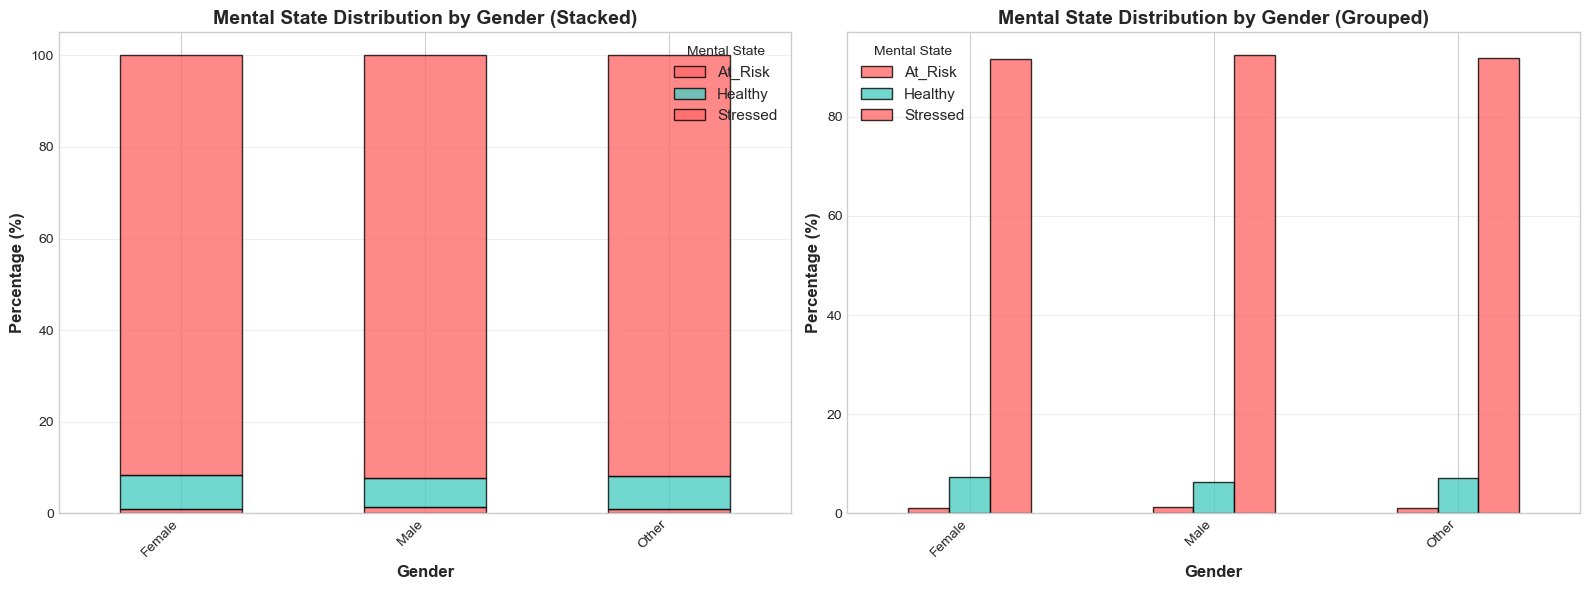


MENTAL STATE DISTRIBUTION BY GENDER (%)
mental_state  At_Risk  Healthy  Stressed
gender                                  
Female           1.01     7.32     91.67
Male             1.32     6.30     92.38
Other            1.01     7.07     91.92


In [68]:
# Mental state distribution by gender
gender_mental = pd.crosstab(New_Social['gender'], New_Social['mental_state'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar
gender_mental.plot(kind='bar', stacked=True, ax=axes[0], 
                   color=['#FF6B6B', '#4ECDC4'], 
                   edgecolor='black', alpha=0.8)
axes[0].set_title('Mental State Distribution by Gender (Stacked)', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Gender', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[0].legend(title='Mental State', fontsize=11)
axes[0].set_xticklabels(gender_mental.index, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Grouped bar
gender_mental.plot(kind='bar', ax=axes[1], 
                   color=['#FF6B6B', '#4ECDC4'], 
                   edgecolor='black', alpha=0.8)
axes[1].set_title('Mental State Distribution by Gender (Grouped)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[1].legend(title='Mental State', fontsize=11)
axes[1].set_xticklabels(gender_mental.index, rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("MENTAL STATE DISTRIBUTION BY GENDER (%)")
print("=" * 100)
print(gender_mental.round(2))

## 7. Behavioral Pattern Analysis

Identifying and analyzing specific behavioral patterns that influence mental health.

### 7.1 Combined Risk Factors Analysis

Examining how multiple risk factors combine to affect mental health.

In [69]:
# Create risk profile based on multiple factors
def create_risk_profile(row):
    risk_factors = 0
    
    # High screen time (>6 hours)
    if row['daily_screen_time_min'] > 360:
        risk_factors += 1
    
    # Poor sleep (<6 hours)
    if row['sleep_hours'] < 6:
        risk_factors += 1
    
    # Low physical activity (<20 min)
    if row['physical_activity_min'] < 20:
        risk_factors += 1
    
    # High negative interactions
    if row['negative_interactions_count'] > row['positive_interactions_count']:
        risk_factors += 1
    
    # High stress or anxiety
    if row['stress_level'] > 7 or row['anxiety_level'] > 7:
        risk_factors += 1
    
    return risk_factors

New_Social['risk_factors_count'] = New_Social.apply(create_risk_profile, axis=1)

print("=" * 100)
print("RISK FACTORS ANALYSIS")
print("=" * 100)

risk_distribution = New_Social['risk_factors_count'].value_counts().sort_index()
print("\n📊 Distribution of Risk Factors:")
for count, freq in risk_distribution.items():
    print(f"   {count} risk factors: {freq:4d} users ({freq/len(New_Social)*100:5.2f}%)")

RISK FACTORS ANALYSIS

📊 Distribution of Risk Factors:
   0 risk factors: 1936 users (38.72%)
   1 risk factors:  594 users (11.88%)
   2 risk factors:  776 users (15.52%)
   3 risk factors: 1694 users (33.88%)


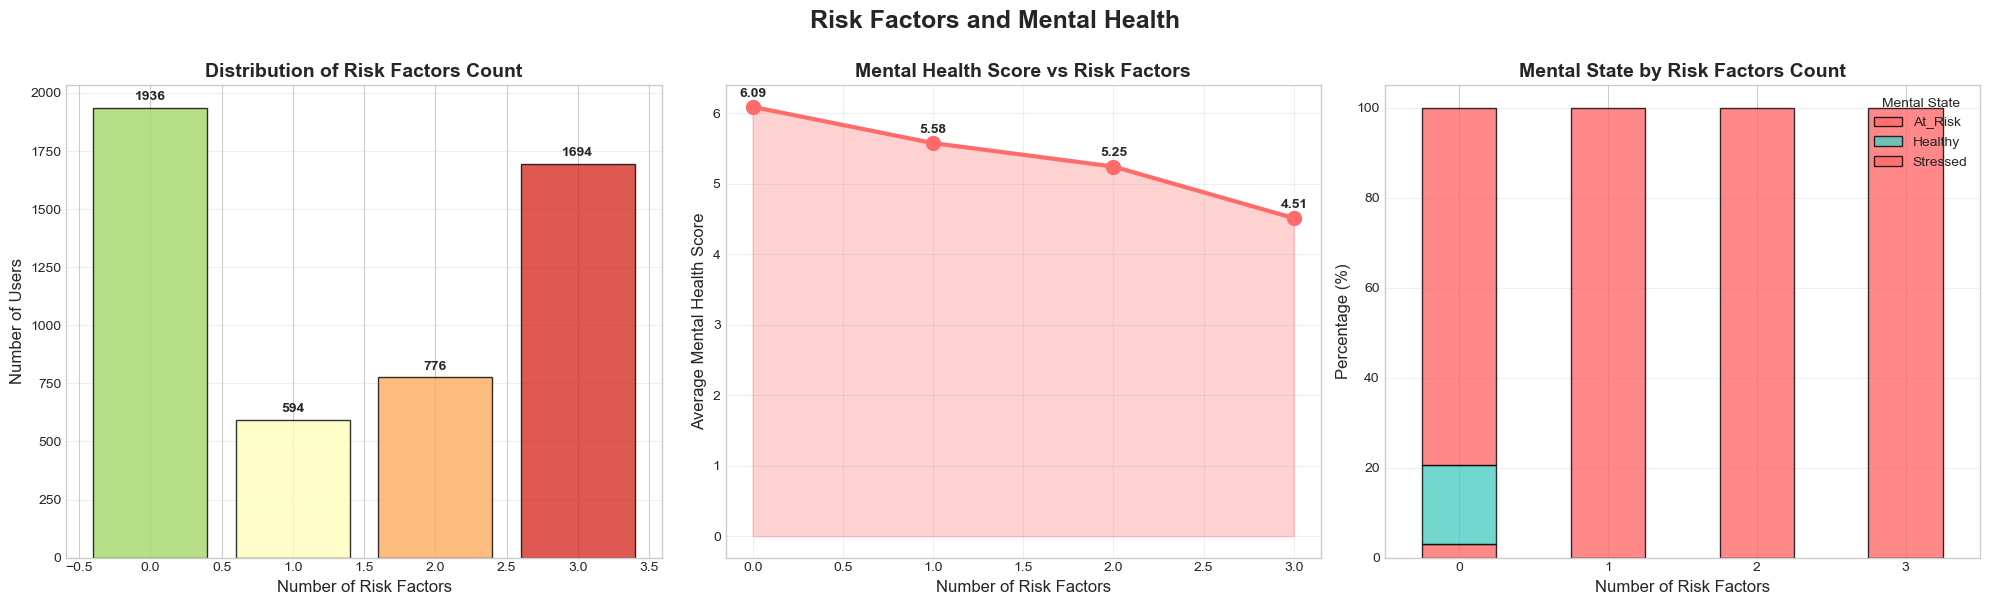

In [70]:
# Visualize risk factors
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Risk Factors and Mental Health', fontsize=18, fontweight='bold', y=1.00)

# Risk factors distribution
risk_counts = New_Social['risk_factors_count'].value_counts().sort_index()
colors_risk = plt.cm.RdYlGn_r(np.linspace(0.3, 0.9, len(risk_counts)))

axes[0].bar(risk_counts.index, risk_counts.values, color=colors_risk, 
            edgecolor='black', alpha=0.8)
axes[0].set_title('Distribution of Risk Factors Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Risk Factors', fontsize=12)
axes[0].set_ylabel('Number of Users', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(risk_counts.values):
    axes[0].text(risk_counts.index[i], v + 20, str(v), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Mental health score by risk factors
risk_mental_health = New_Social.groupby('risk_factors_count')['mental_health_score'].mean()

axes[1].plot(risk_mental_health.index, risk_mental_health.values, 
             marker='o', linewidth=3, markersize=10, color='#FF6B6B')
axes[1].fill_between(risk_mental_health.index, risk_mental_health.values, 
                      alpha=0.3, color='#FF6B6B')
axes[1].set_title('Mental Health Score vs Risk Factors', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Risk Factors', fontsize=12)
axes[1].set_ylabel('Average Mental Health Score', fontsize=12)
axes[1].grid(alpha=0.3)

for i, v in enumerate(risk_mental_health.values):
    axes[1].text(risk_mental_health.index[i], v + 0.1, f'{v:.2f}', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Mental state by risk factors
risk_mental_state = pd.crosstab(New_Social['risk_factors_count'], 
                                New_Social['mental_state'], normalize='index') * 100

risk_mental_state.plot(kind='bar', stacked=True, ax=axes[2], 
                       color=['#FF6B6B', '#4ECDC4'], 
                       edgecolor='black', alpha=0.8)
axes[2].set_title('Mental State by Risk Factors Count', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Number of Risk Factors', fontsize=12)
axes[2].set_ylabel('Percentage (%)', fontsize=12)
axes[2].legend(title='Mental State', fontsize=10)
axes[2].set_xticklabels(risk_mental_state.index, rotation=0)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 7.2 Usage Patterns and Sleep Quality

MENTAL STATE BY USAGE CATEGORY AND SLEEP CATEGORY (%)
mental_state                   At_Risk  Healthy  Stressed
usage_category sleep_category                            
Heavy          Good               0.00     0.00    100.00
               Moderate           0.00     0.00    100.00
Light          Good               0.00    65.99     34.01
Moderate       Good               3.38    10.39     86.23


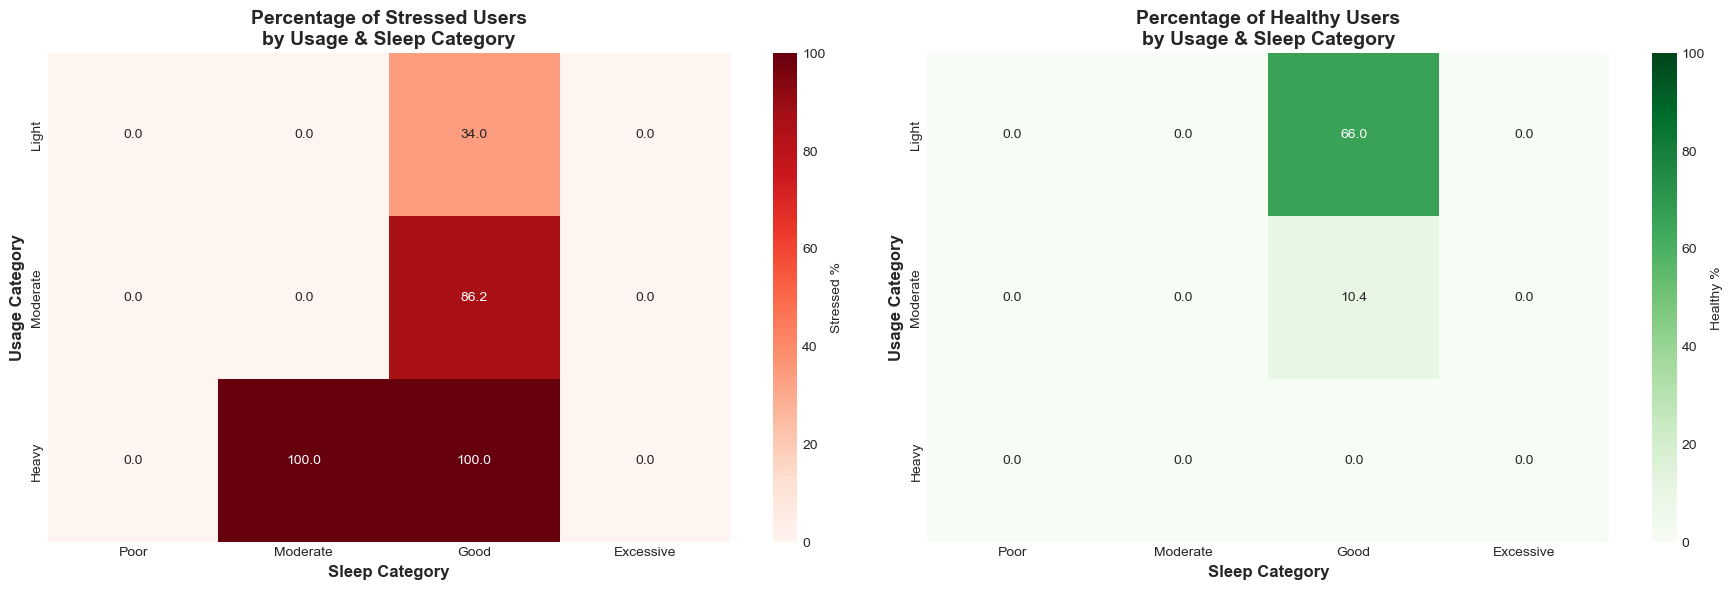

In [71]:
# Combined analysis: Usage category and Sleep category
usage_sleep_mental = pd.crosstab([New_Social['usage_category'], New_Social['sleep_category']], 
                                  New_Social['mental_state'], normalize='index') * 100

print("=" * 100)
print("MENTAL STATE BY USAGE CATEGORY AND SLEEP CATEGORY (%)")
print("=" * 100)
print(usage_sleep_mental.round(2))

# Heatmap visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Stressed percentage
stressed_data = usage_sleep_mental['Stressed'].unstack(fill_value=0)
usage_order = ['Light', 'Moderate', 'Heavy']
sleep_order = ['Poor', 'Moderate', 'Good', 'Excessive']

try:
    stressed_data = stressed_data.reindex(index=usage_order, columns=sleep_order, fill_value=0)
except:
    pass

sns.heatmap(stressed_data, annot=True, fmt='.1f', cmap='Reds', 
            ax=axes[0], cbar_kws={'label': 'Stressed %'}, vmin=0, vmax=100)
axes[0].set_title('Percentage of Stressed Users\nby Usage & Sleep Category', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sleep Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Usage Category', fontsize=12, fontweight='bold')

# Healthy percentage
healthy_data = usage_sleep_mental['Healthy'].unstack(fill_value=0)

try:
    healthy_data = healthy_data.reindex(index=usage_order, columns=sleep_order, fill_value=0)
except:
    pass

sns.heatmap(healthy_data, annot=True, fmt='.1f', cmap='Greens', 
            ax=axes[1], cbar_kws={'label': 'Healthy %'}, vmin=0, vmax=100)
axes[1].set_title('Percentage of Healthy Users\nby Usage & Sleep Category', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sleep Category', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Usage Category', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 7.3 Protective Factors Analysis

Identifying factors that promote better mental health.

In [72]:
# Create protective factors profile
def create_protective_profile(row):
    protective_factors = 0
    
    # Good sleep (7-9 hours)
    if 7 <= row['sleep_hours'] <= 9:
        protective_factors += 1
    
    # Moderate/Low screen time (<6 hours)
    if row['daily_screen_time_min'] < 360:
        protective_factors += 1
    
    # Active lifestyle (>20 min)
    if row['physical_activity_min'] >= 20:
        protective_factors += 1
    
    # Positive interactions > Negative
    if row['positive_interactions_count'] > row['negative_interactions_count']:
        protective_factors += 1
    
    # High positive interaction rate
    if row['positive_interaction_rate'] > 0.6:
        protective_factors += 1
    
    return protective_factors

New_Social['protective_factors_count'] = New_Social.apply(create_protective_profile, axis=1)

print("=" * 100)
print("PROTECTIVE FACTORS ANALYSIS")
print("=" * 100)

protective_distribution = New_Social['protective_factors_count'].value_counts().sort_index()
print("\n📊 Distribution of Protective Factors:")
for count, freq in protective_distribution.items():
    print(f"   {count} protective factors: {freq:4d} users ({freq/len(New_Social)*100:5.2f}%)")

PROTECTIVE FACTORS ANALYSIS

📊 Distribution of Protective Factors:
   0 protective factors:  355 users ( 7.10%)
   1 protective factors:  298 users ( 5.96%)
   2 protective factors: 1871 users (37.42%)
   3 protective factors:  677 users (13.54%)
   4 protective factors:  494 users ( 9.88%)
   5 protective factors: 1305 users (26.10%)


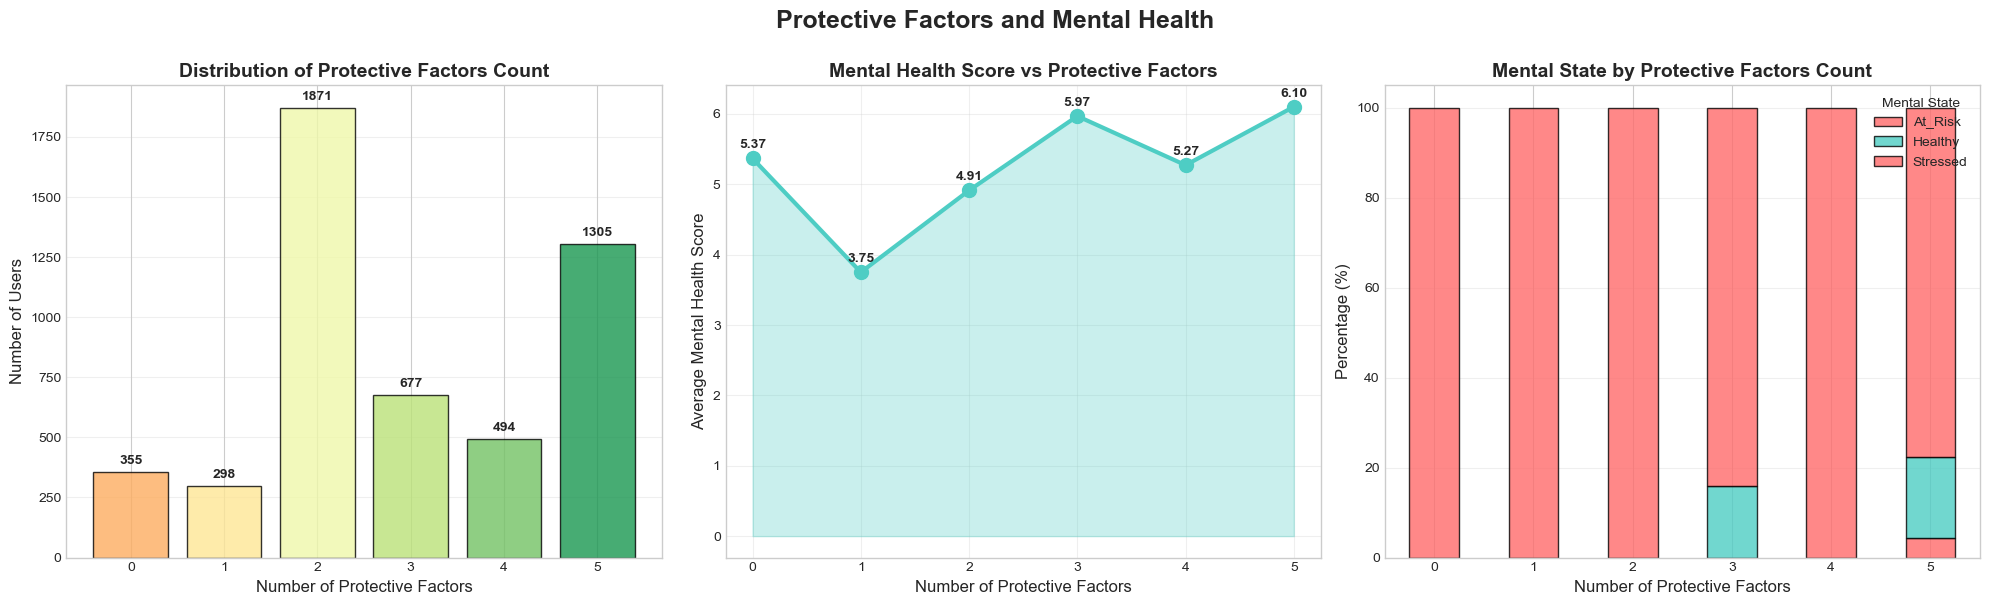

In [73]:
# Visualize protective factors
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Protective Factors and Mental Health', fontsize=18, fontweight='bold', y=1.00)

# Protective factors distribution
protective_counts = New_Social['protective_factors_count'].value_counts().sort_index()
colors_protective = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(protective_counts)))

axes[0].bar(protective_counts.index, protective_counts.values, color=colors_protective, 
            edgecolor='black', alpha=0.8)
axes[0].set_title('Distribution of Protective Factors Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Protective Factors', fontsize=12)
axes[0].set_ylabel('Number of Users', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(protective_counts.values):
    axes[0].text(protective_counts.index[i], v + 20, str(v), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Mental health score by protective factors
protective_mental_health = New_Social.groupby('protective_factors_count')['mental_health_score'].mean()

axes[1].plot(protective_mental_health.index, protective_mental_health.values, 
             marker='o', linewidth=3, markersize=10, color='#4ECDC4')
axes[1].fill_between(protective_mental_health.index, protective_mental_health.values, 
                      alpha=0.3, color='#4ECDC4')
axes[1].set_title('Mental Health Score vs Protective Factors', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Protective Factors', fontsize=12)
axes[1].set_ylabel('Average Mental Health Score', fontsize=12)
axes[1].grid(alpha=0.3)

for i, v in enumerate(protective_mental_health.values):
    axes[1].text(protective_mental_health.index[i], v + 0.1, f'{v:.2f}', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Mental state by protective factors
protective_mental_state = pd.crosstab(New_Social['protective_factors_count'], 
                                      New_Social['mental_state'], normalize='index') * 100

protective_mental_state.plot(kind='bar', stacked=True, ax=axes[2], 
                             color=['#FF6B6B', '#4ECDC4'], 
                             edgecolor='black', alpha=0.8)
axes[2].set_title('Mental State by Protective Factors Count', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Number of Protective Factors', fontsize=12)
axes[2].set_ylabel('Percentage (%)', fontsize=12)
axes[2].legend(title='Mental State', fontsize=10)
axes[2].set_xticklabels(protective_mental_state.index, rotation=0)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 7.4 Risk vs Protective Factors Comparison

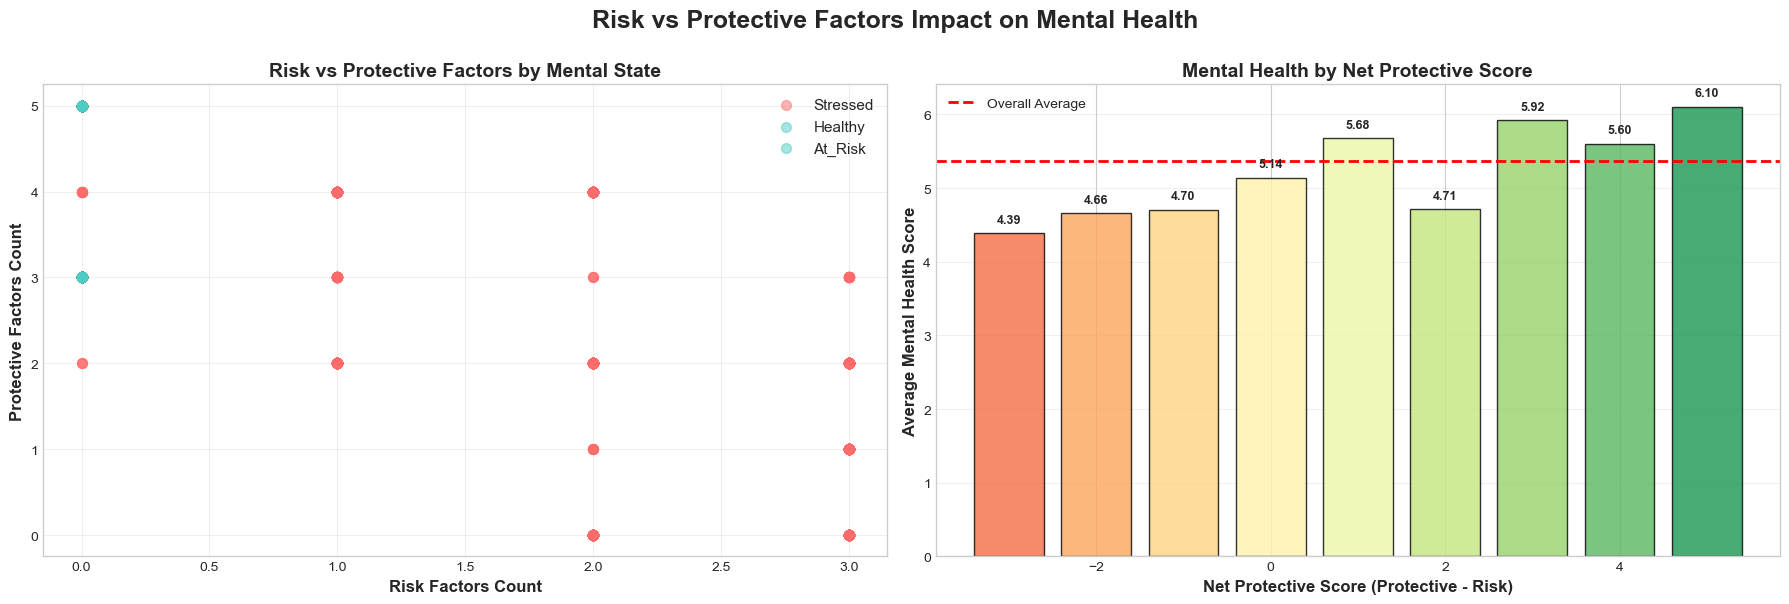


NET PROTECTIVE SCORE ANALYSIS

Net Protective Score = Protective Factors - Risk Factors

Average Mental Health Score by Net Score:
   Score -3: 4.39
   Score -2: 4.66
   Score -1: 4.70
   Score +0: 5.14
   Score +1: 5.68
   Score +2: 4.71
   Score +3: 5.92
   Score +4: 5.60
   Score +5: 6.10


In [74]:
# Compare risk and protective factors
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Risk vs Protective Factors Impact on Mental Health', 
             fontsize=18, fontweight='bold', y=1.00)

# Scatter plot: Risk vs Protective factors colored by mental state
for mental_state in New_Social['mental_state'].unique():
    subset = New_Social[New_Social['mental_state'] == mental_state]
    color = '#FF6B6B' if mental_state == 'Stressed' else '#4ECDC4'
    axes[0].scatter(subset['risk_factors_count'], subset['protective_factors_count'], 
                    alpha=0.5, s=50, label=mental_state, color=color)

axes[0].set_xlabel('Risk Factors Count', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Protective Factors Count', fontsize=12, fontweight='bold')
axes[0].set_title('Risk vs Protective Factors by Mental State', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Net protective score (protective - risk)
New_Social['net_protective_score'] = New_Social['protective_factors_count'] - New_Social['risk_factors_count']

net_mental_health = New_Social.groupby('net_protective_score')['mental_health_score'].mean().sort_index()

axes[1].bar(net_mental_health.index, net_mental_health.values, 
            color=plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(net_mental_health))),
            edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Net Protective Score (Protective - Risk)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Mental Health Score', fontsize=12, fontweight='bold')
axes[1].set_title('Mental Health by Net Protective Score', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].axhline(y=New_Social['mental_health_score'].mean(), color='red', 
                linestyle='--', linewidth=2, label='Overall Average')
axes[1].legend()

for i, (idx, val) in enumerate(net_mental_health.items()):
    axes[1].text(idx, val + 0.1, f'{val:.2f}', ha='center', va='bottom', 
                 fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("NET PROTECTIVE SCORE ANALYSIS")
print("=" * 100)
print(f"\nNet Protective Score = Protective Factors - Risk Factors")
print(f"\nAverage Mental Health Score by Net Score:")
for score, mh in net_mental_health.items():
    print(f"   Score {score:+2d}: {mh:.2f}")

## 8. Key Insights and Findings Summary

Comprehensive summary of all discoveries from the exploratory data analysis.

In [75]:
print("=" * 100)
print("KEY INSIGHTS & FINDINGS - PHASE 2 EDA SUMMARY")
print("=" * 100)

print("\n" + "🔍 " + "="*95)
print("1. SCREEN TIME IMPACT")
print("="*95)
corr_screen_stress = pearsonr(New_Social['daily_screen_time_min'], New_Social['stress_level'])[0]
corr_screen_mh = pearsonr(New_Social['daily_screen_time_min'], New_Social['mental_health_score'])[0]
heavy_stressed = New_Social[New_Social['usage_category'] == 'Heavy']['mental_state'].value_counts(normalize=True).get('Stressed', 0) * 100

print(f"   • Screen time correlates with stress (r = {corr_screen_stress:.3f})")
print(f"   • Screen time negatively correlates with mental health (r = {corr_screen_mh:.3f})")
print(f"   • {heavy_stressed:.1f}% of heavy users (>6h/day) report being stressed")
print(f"   • Average screen time: {New_Social['daily_screen_time_min'].mean():.0f} minutes/day (~{New_Social['daily_screen_time_min'].mean()/60:.1f} hours)")

print("\n" + "💤 " + "="*95)
print("2. SLEEP QUALITY IMPACT")
print("="*95)
corr_sleep_stress = pearsonr(New_Social['sleep_hours'], New_Social['stress_level'])[0]
poor_sleep_stressed = New_Social[New_Social['sleep_category'] == 'Poor']['mental_state'].value_counts(normalize=True).get('Stressed', 0) * 100
good_sleep_healthy = New_Social[New_Social['sleep_category'] == 'Good']['mental_state'].value_counts(normalize=True).get('Healthy', 0) * 100

print(f"   • Sleep hours negatively correlate with stress (r = {corr_sleep_stress:.3f})")
print(f"   • {poor_sleep_stressed:.1f}% of users with poor sleep (<6h) are stressed")
print(f"   • {good_sleep_healthy:.1f}% of users with good sleep (7-9h) are healthy")
print(f"   • Average sleep: {New_Social['sleep_hours'].mean():.2f} hours/night")

print("\n" + "👥 " + "="*95)
print("3. SOCIAL INTERACTIONS IMPACT")
print("="*95)
corr_pos_mh = pearsonr(New_Social['positive_interactions_count'], New_Social['mental_health_score'])[0]
corr_neg_stress = pearsonr(New_Social['negative_interactions_count'], New_Social['stress_level'])[0]

print(f"   • Positive interactions boost mental health (r = {corr_pos_mh:.3f})")
print(f"   • Negative interactions increase stress (r = {corr_neg_stress:.3f})")
print(f"   • Average positive interaction rate: {New_Social['positive_interaction_rate'].mean():.2%}")

print("\n" + "🏃 " + "="*95)
print("4. PHYSICAL ACTIVITY IMPACT")
print("="*95)
corr_activity_stress = pearsonr(New_Social['physical_activity_min'], New_Social['stress_level'])[0]
sedentary_stressed = New_Social[New_Social['activity_level'] == 'Sedentary']['mental_state'].value_counts(normalize=True).get('Stressed', 0) * 100
active_healthy = New_Social[New_Social['activity_level'] == 'Active']['mental_state'].value_counts(normalize=True).get('Healthy', 0) * 100

print(f"   • Physical activity reduces stress (r = {corr_activity_stress:.3f})")
print(f"   • {sedentary_stressed:.1f}% of sedentary users (<20 min) are stressed")
print(f"   • {active_healthy:.1f}% of active users (>40 min) are healthy")
print(f"   • Average activity: {New_Social['physical_activity_min'].mean():.0f} minutes/day")

print("\n" + "📱 " + "="*95)
print("5. PLATFORM DIFFERENCES")
print("="*95)
platform_stress = New_Social.groupby('platform')['stress_level'].mean().sort_values(ascending=False)
print(f"   • Highest stress platform: {platform_stress.index[0]} (avg stress: {platform_stress.values[0]:.2f})")
print(f"   • Lowest stress platform: {platform_stress.index[-1]} (avg stress: {platform_stress.values[-1]:.2f})")

platform_users = New_Social['platform'].value_counts()
print(f"   • Most popular platform: {platform_users.index[0]} ({platform_users.values[0]} users)")

print("\n" + "👤 " + "="*95)
print("6. DEMOGRAPHIC PATTERNS")
print("="*95)
age_stress = New_Social.groupby('age_group')['stress_level'].mean()
print(f"   • Age group patterns identified across {len(New_Social['age_group'].unique())} groups")

if 'gender' in New_Social.columns and len(New_Social['gender'].unique()) > 1:
    gender_stats = New_Social.groupby('gender')['mental_health_score'].mean()
    print(f"   • Mental health scores vary by gender (range: {gender_stats.min():.2f} - {gender_stats.max():.2f})")

print("\n" + "⚠️ " + "="*95)
print("7. RISK & PROTECTIVE FACTORS")
print("="*95)
high_risk = (New_Social['risk_factors_count'] >= 3).sum()
high_protective = (New_Social['protective_factors_count'] >= 3).sum()

print(f"   • {high_risk} users ({high_risk/len(New_Social)*100:.1f}%) have 3+ risk factors")
print(f"   • {high_protective} users ({high_protective/len(New_Social)*100:.1f}%) have 3+ protective factors")

avg_mh_low_risk = New_Social[New_Social['risk_factors_count'] <= 1]['mental_health_score'].mean()
avg_mh_high_risk = New_Social[New_Social['risk_factors_count'] >= 4]['mental_health_score'].mean()
print(f"   • Mental health score difference: Low risk ({avg_mh_low_risk:.2f}) vs High risk ({avg_mh_high_risk:.2f})")

print("\n" + "📊 " + "="*95)
print("8. OVERALL MENTAL HEALTH STATUS")
print("="*95)
stressed_pct = (New_Social['mental_state'] == 'Stressed').sum() / len(New_Social) * 100
print(f"   • {stressed_pct:.1f}% of users report being stressed")
print(f"   • {100-stressed_pct:.1f}% of users report being healthy")
print(f"   • Average Mental Health Score: {New_Social['mental_health_score'].mean():.2f}/10")
print(f"   • Average Risk Score: {New_Social['risk_score'].mean():.2f}/10")

print("\n" + "=" * 100)
print("✅ PHASE 2: EXPLORATORY DATA ANALYSIS COMPLETE!")
print("=" * 100)

KEY INSIGHTS & FINDINGS - PHASE 2 EDA SUMMARY

🔍 ===============================================================================================
1. SCREEN TIME IMPACT
   • Screen time correlates with stress (r = 0.836)
   • Screen time negatively correlates with mental health (r = -0.750)
   • 100.0% of heavy users (>6h/day) report being stressed
   • Average screen time: 373 minutes/day (~6.2 hours)

💤 ===============================================================================================
2. SLEEP QUALITY IMPACT
   • Sleep hours negatively correlate with stress (r = -0.835)
   • 0.0% of users with poor sleep (<6h) are stressed
   • 11.9% of users with good sleep (7-9h) are healthy
   • Average sleep: 7.13 hours/night

👥 ===============================================================================================
3. SOCIAL INTERACTIONS IMPACT
   • Positive interactions boost mental health (r = -0.722)
   • Negative interactions increase stress (r = 0.753)
   • Average positiv

---

## Phase 2 Summary

### 📊 What We Accomplished:

**Univariate Analysis:**
✅ Analyzed distribution of all numerical and categorical features
✅ Identified outliers and data patterns
✅ Examined mental health indicators in detail

**Bivariate Analysis:**
✅ Explored screen time vs mental health relationships
✅ Analyzed sleep duration impact on wellbeing
✅ Investigated social interactions effects
✅ Examined physical activity correlations

**Multivariate Analysis:**
✅ Created comprehensive correlation matrix
✅ Identified top positive and negative correlations
✅ Generated pairplots for key variables

**Platform Analysis:**
✅ Compared mental health metrics across platforms
✅ Identified platform-specific patterns
✅ Conducted ANOVA testing for statistical significance

**Demographic Analysis:**
✅ Analyzed age group differences
✅ Examined gender-based patterns
✅ Identified demographic risk factors

**Behavioral Pattern Analysis:**
✅ Created risk and protective factor profiles
✅ Analyzed combined factor effects
✅ Identified high-risk and low-risk patterns

---

### 🎯 Key Takeaways:

1. **Screen time** has a measurable negative impact on mental health
2. **Sleep quality** is crucial for mental wellbeing
3. **Positive social interactions** significantly boost mental health
4. **Physical activity** serves as a protective factor
5. **Multiple risk factors** compound to severely impact mental health
6. **Protective behaviors** can effectively counter risk factors

---

### 📈 Next Steps: Phase 3 - Predictive Modeling

We'll build machine learning models to:
- Predict mental state (Stressed/Healthy)
- Forecast risk scores
- Identify key predictive features
- Create intervention recommendations

---